# 라이브러리 불러오기

In [1]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

# 데이터 불러오기

In [2]:
unames = ["user_id", "gender", "age", "occupation", "zip"]
users = pd.read_table(
    "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/users.dat",
    sep="::",
    header=None,
    names=unames,
    engine="python",
)
users

user_id gender  age  occupation    zip
0           1      F    1          10  48067
1           2      M   56          16  70072
2           3      M   25          15  55117
...       ...    ...  ...         ...    ...
6037     6038      F   56           1  14706
6038     6039      F   45           0  01060
6039     6040      M   25           6  11106

[6040 rows x 5 columns]

In [3]:
rnames = ["user_id", "movie_id", "rating", "timestamp"]
ratings = pd.read_table(
    "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/ratings.dat",
    sep="::",
    header=None,
    names=rnames,
    engine="python",
)
ratings

user_id  movie_id  rating  timestamp
0              1      1193       5  978300760
1              1       661       3  978302109
2              1       914       3  978301968
...          ...       ...     ...        ...
1000206     6040       562       5  956704746
1000207     6040      1096       4  956715648
1000208     6040      1097       4  956715569

[1000209 rows x 4 columns]

In [4]:
mnames = ["movie_id", "title", "genres"]
movies = pd.read_table(
    "https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/movielens/movies.dat",
    sep="::",
    header=None,
    names=mnames,
    engine="python",
)
movies.head(6)

movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy
5         6                         Heat (1995)         Action|Crime|Thriller

# 연습문제

## 연습문제 1
### ratings과 users 데이터를 merge한 후 다음과 같은 user_rating 데이터셋을 만드세요.

In [5]:
user_rating = users.merge(ratings, on="user_id")
user_rating

user_id gender  age  occupation    zip  movie_id  rating  timestamp
0              1      F    1          10  48067      1193       5  978300760
1              1      F    1          10  48067       661       3  978302109
2              1      F    1          10  48067       914       3  978301968
...          ...    ...  ...         ...    ...       ...     ...        ...
1000206     6040      M   25           6  11106       562       5  956704746
1000207     6040      M   25           6  11106      1096       4  956715648
1000208     6040      M   25           6  11106      1097       4  956715569

[1000209 rows x 8 columns]

## 연습문제 2
### 다음과 같이 영화(movie_id)별로 남녀(gender)에 따른 rating의 평균과 그 개수(count)을 구해보세요.

In [6]:
user_rating = user_rating.groupby(["movie_id", "gender"]).agg(mean=('rating', 'mean'), count=('rating', 'count')).reset_index()

user_rating

movie_id gender  mean  count
0            1      F  4.19    591
1            1      M  4.13   1486
2            2      F  3.28    176
...        ...    ...   ...    ...
7149      3951      M  4.04     23
7150      3952      F  3.76    105
7151      3952      M  3.79    283

[7152 rows x 4 columns]

## 연습문제 3
### 다음과 같은 플랏을 그려보고 평가의 수가 적을수록 그 편차가 커지는 현상을 확인해보세요.

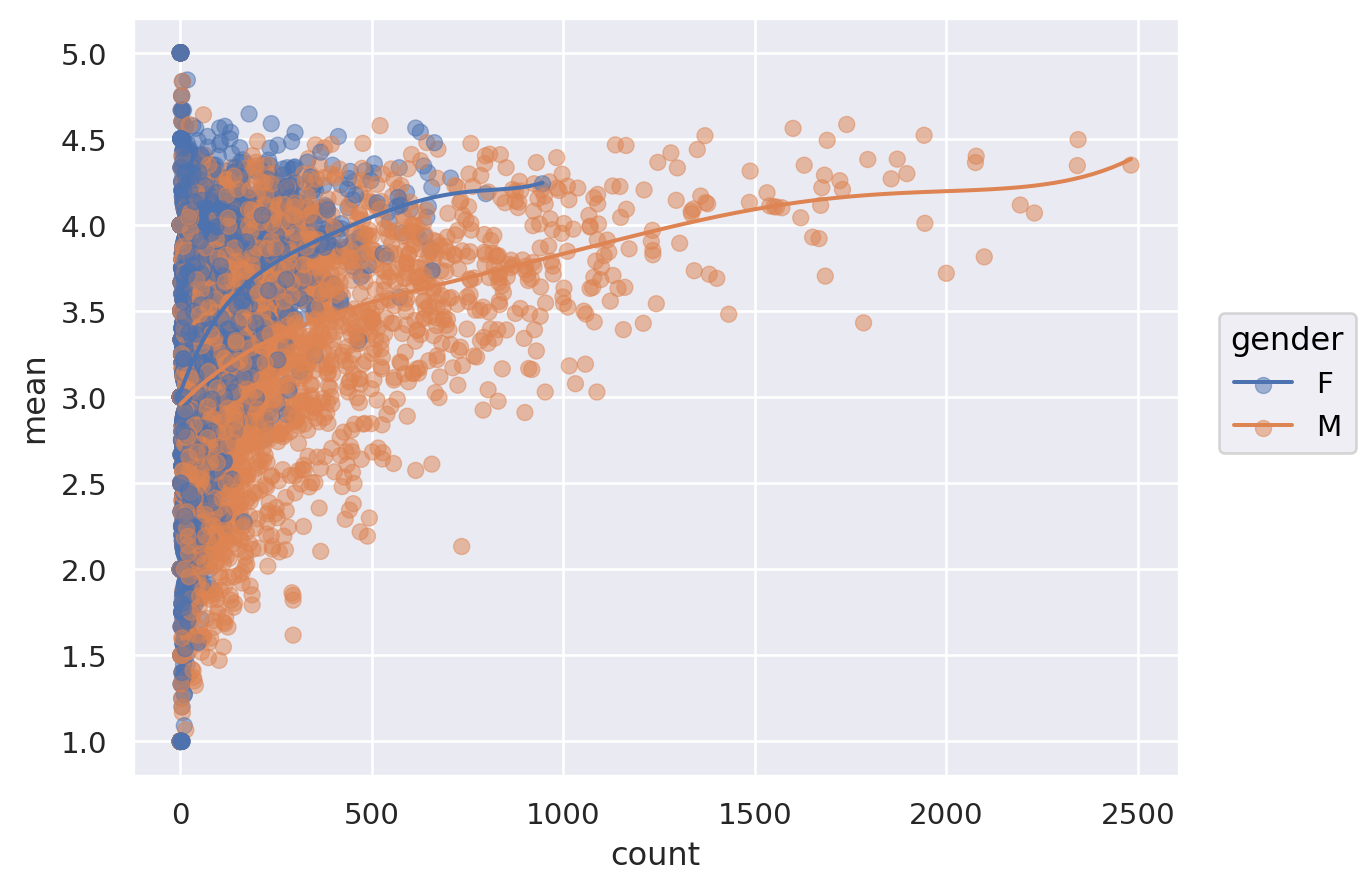

In [7]:
(
    so.Plot(user_rating, x="count", y="mean", color="gender")  # color mapping이 이후 모든 layer에 적용
    .add(so.Dot(alpha=.5))
    .add(so.Line(), so.PolyFit(5))
)

### 평가의 수가 적을수록 그 편차가 커지는 현상
#### 평가의 수가 적을수록 평균이 극단적인 값으로 쉽게 왜곡될 수 있기 때문입니다.
#### 예를 들어, 평가가 1개인 영화의 평균 평점이 5점인 경우, 새로운 평가가 1점이면 평균 평점이 3점으로 떨어집니다.
#### 반면, 평가가 100개인 영화의 평균 평점이 5점인 경우, 새로운 평가가 1점이면 평균 평점은 4.98점으로 거의 변하지 않습니다.

### 평가의 수가 많은 영화일수록 평가가 높아지는 현상
#### 평가의 수가 많을수록 평균이 전체 평가를 더 잘 반영하기 때문입니다.
#### 예를 들어, 100명이 평가한 영화의 평균 평점이 4점인 경우, 새로운 평가가 1점이더라도 평균 평점은 3.98점으로 거의 변하지 않습니다.
#### 반면, 평가가 10명인 영화의 평균 평점이 4점인 경우, 새로운 평가가 1점이면 평균 평점이 3점으로 떨어집니다.

### 남녀의 평가에 차이가 벌어지는 현상
#### 영화의 장르, 주제, 연출 스타일 등에 따라 남성과 여성의 선호도가 다르기 때문입니다.
#### 예를 들어, 액션 영화는 남성이 선호하는 경향이 있고, 로맨스 영화는 여성이 선호하는 경향이 있습니다.
#### 또한, 남성과 여성이 영화를 평가하는 기준이 다를 수도 있습니다.


## 연습문제 4
### 3번에서 플랏에 .limit(x=(0, 500), y=(2.5, 4.5))을 추가하여 평가 개수(count)가 0에서 500사이이고, 평균 rating이 2.5에서 4.5 사이인 것으로 확대해서 보고, 평가 개수가 몇 개 정도부터 남녀의 평가의 차이가 대략 일정하게 되는지 살펴보세요.

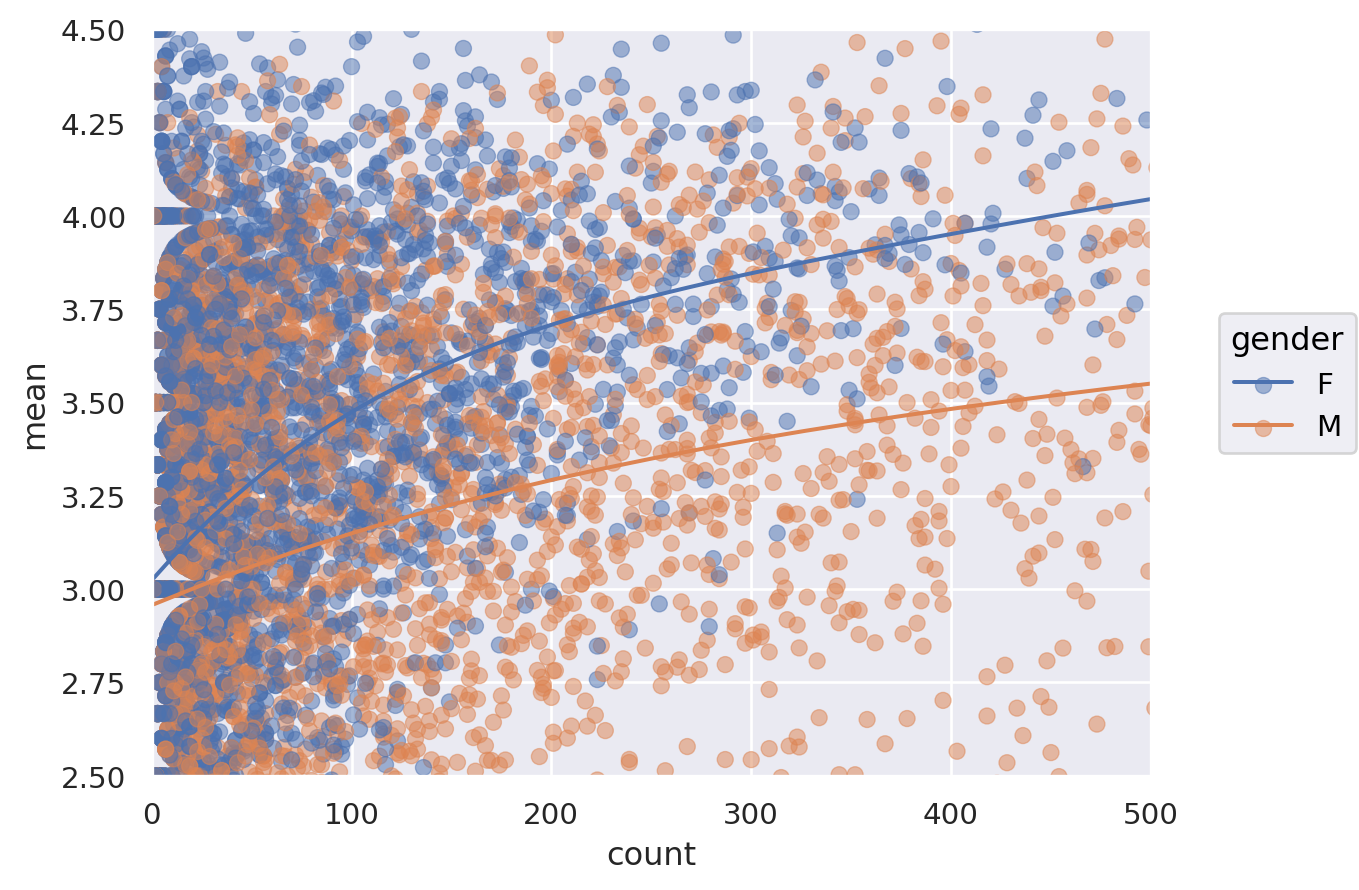

In [8]:
(
    so.Plot(user_rating, x="count", y="mean", color="gender")
    .add(so.Dot(alpha = .5))
    .add(so.Line(), so.PolyFit(5))
    .limit(x=(0, 500), y=(2.5, 4.5))
)


## 연습문제 5
### 영화별로 남녀의 평가가 크게 갈리는 영화들을 찾기 위해

### 5.1
#### 2번에서 구한 데이터에서 남녀 모두 rating이 300개 이상 있는 영화로만 간추려보세요.

In [9]:
popular_movies = user_rating[user_rating['count'] >= 300]

popular_movies = popular_movies[
    (popular_movies.groupby("movie_id")["gender"].transform(lambda x: x.nunique()) == 2) &
    (popular_movies['count'] >= 300)]
popular_movies

movie_id gender  mean  count
0            1      F  4.19    591
1            1      M  4.13   1486
20          11      F  3.92    379
...        ...    ...   ...    ...
6452      3578      M  4.11   1539
6773      3751      F  3.89    367
6774      3751      M  3.88    962

[262 rows x 4 columns]

### 5.2
#### 이 데이터를 popular_movies라고 명명하고,
#### 이 데이터를 gender에 관해 wide format으로 변환한 후; pivot()을 이용
#### 여자의 평균 rating에서 남자의 평균 rating을 뺀 그 차이를 데이터에 추가한 후; assign()을 이용
#### 그 차이로 sort한 후,

In [10]:
popular_movies_wide = popular_movies.pivot(index="movie_id", columns="gender", values="mean")
popular_movies_wide["diff"] = popular_movies_wide["F"] - popular_movies_wide["M"]
popular_movies_wide = popular_movies_wide.sort_values(by="diff", ascending=False)

popular_movies_wide

gender      F    M  diff
movie_id                
2657     3.67 3.16  0.51
1028     4.20 3.73  0.47
920      4.27 3.83  0.44
...       ...  ...   ...
589      3.79 4.12 -0.33
1221     4.04 4.44 -0.40
2791     3.66 4.06 -0.41

[131 rows x 3 columns]

### 5.3
#### 여자의 선호가 더 높은 영화 5편과 남자의 선호가 더 높은 영화 5편 (선호 차이의 크기 순서로)을 구해보세요.
#### 이를 위해서 movies 테이블 안의 영화제목(title)을 merge()를 이용해 추가하세요.

In [11]:
movies_title = movies[["movie_id", "title"]]
popular_movies_wide_title = popular_movies_wide.merge(movies_title, on="movie_id")

In [12]:
print("여자 선호도가 더 높은 영화 Top 5:")
popular_movies_wide_title.head()

여자 선호도가 더 높은 영화 Top 5:


movie_id    F    M  diff                                  title
0      2657 3.67 3.16  0.51  Rocky Horror Picture Show, The (1975)
1      1028 4.20 3.73  0.47                    Mary Poppins (1964)
2       920 4.27 3.83  0.44              Gone with the Wind (1939)
3        17 4.23 3.82  0.41           Sense and Sensibility (1995)
4      1188 4.17 3.77  0.41               Strictly Ballroom (1992)

In [54]:
print("남자 선호도가 더 높은 영화 Top 5:")
popular_movies_wide_title.tail()[::-1]

남자 선호도가 더 높은 영화 Top 5:


movie_id    F    M  diff                              title
130      2791 3.66 4.06 -0.41                   Airplane! (1980)
129      1221 4.04 4.44 -0.40     Godfather: Part II, The (1974)
128       589 3.79 4.12 -0.33  Terminator 2: Judgment Day (1991)
127      1214 3.89 4.22 -0.33                       Alien (1979)
126      1240 3.90 4.21 -0.31             Terminator, The (1984)

## 연습문제 6
### 3번 플랏에서 유추되듯이 평가의 개수가 영화의 완성도 혹은 인기도를 파악할 수 있는 대략적인 지표가 될 수 있습니다. 즉, 평가수가 많을 수록 평점도 높습니다. 따라서 평가 개수를 바탕으로 인기도(popularity)를 수치화 하려고 합니다.
### 다음과 같은 count를 20개의 구간으로 discretize해주는 함수를 성별로 grouping된 user_rating 데이터에 apply() 하세요.
### 이제, 다음과 같이 popularity에 따라 평점이 높아지는 현상을 성별을 고려한 후 본 결과를 아래와 같이 플랏을 통해 확인해봅니다.

In [14]:
def popular(g):
    g["popularity"] = pd.qcut(g["count"], q=20, labels=False)
    return g

user_rating = user_rating.groupby("gender").apply(popular)
user_rating

movie_id gender  mean  count  popularity
gender                                               
F      0            1      F  4.19    591          19
       2            2      F  3.28    176          17
       4            3      F  3.07    136          16
...               ...    ...   ...    ...         ...
M      7147      3950      M  3.68     44           7
       7149      3951      M  4.04     23           4
       7151      3952      M  3.79    283          15

[7152 rows x 5 columns]

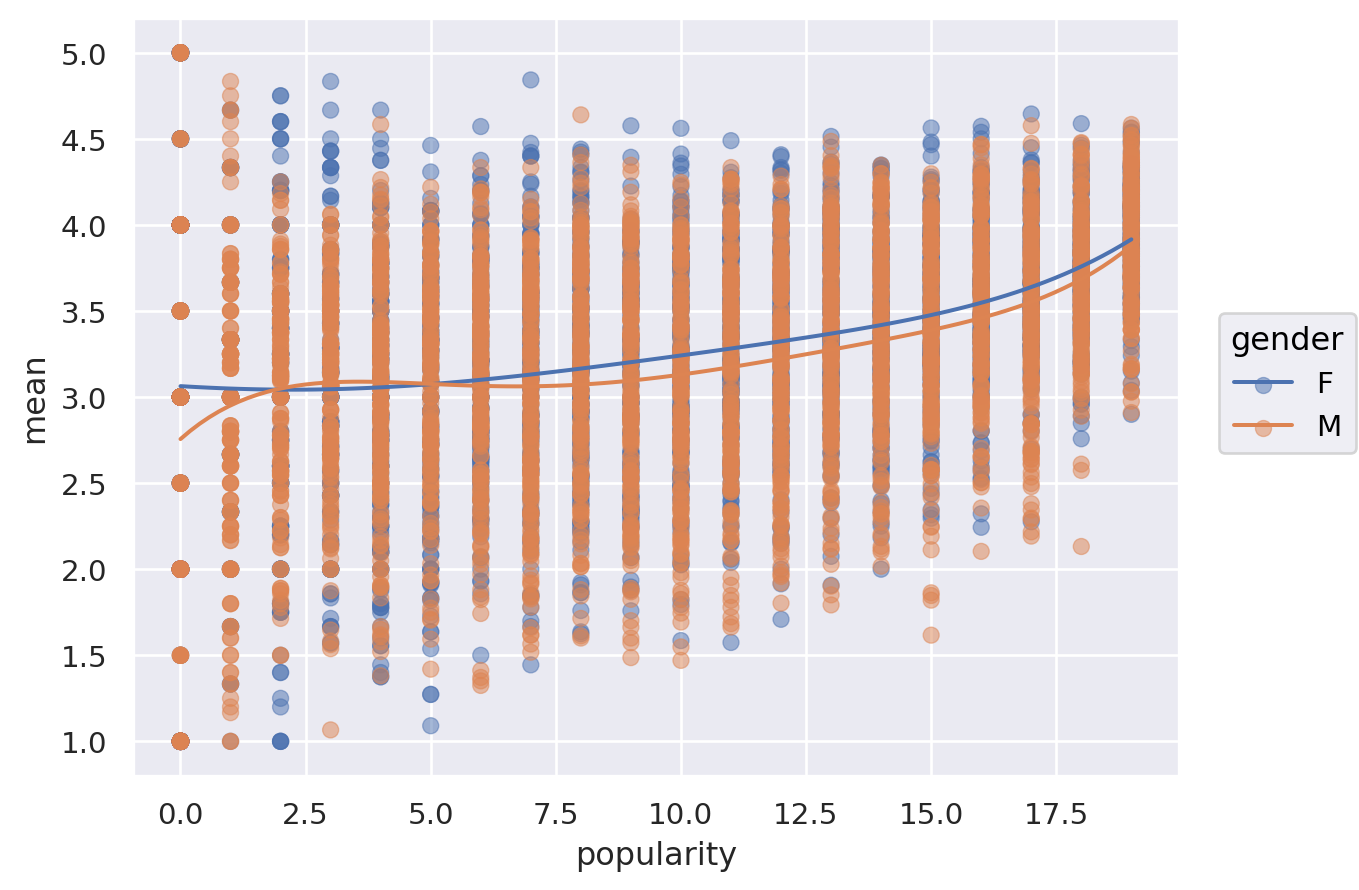

In [15]:
(
    so.Plot(user_rating, x="popularity", y="mean", color="gender")  # color mapping이 이후 모든 layer에 적용
    .add(so.Dot(alpha=.5))
    .add(so.Line(), so.PolyFit(5))
)

### 남성 유저와 여성 유저의 비율에 큰 차이 (4331:1709)가 있는 것을 고려했을 때, 어떻게 이 현상을 설명할 수 있을까요?

#### 남성 유저와 여성 유저의 비율이 크게 차이나는 것을 고려했을 때, 남성 유저와 여성 유저의 평점에 차이가 있을 수 있습니다. 이는 남성과 여성이 영화를 보는 취향이 다르기 때문일 수 있습니다. 예를 들어, 남성은 액션 영화를 선호하는 경향이 있고, 여성은 로맨스 영화를 선호하는 경향이 있습니다. 또한, 남성과 여성이 영화를 평가하는 기준이 다를 수도 있습니다.

#### 따라서 남성 유저와 여성 유저의 비율이 크게 차이나는 것을 고려했을 때, 인기도에 따른 평점의 차이를 분석할 때는 남성 유저와 여성 유저의 비율을 고려하여 분석해야 합니다.

## 연습문제 7
### 남녀별로 평점의 편차가 큰, 즉 의견이 분분한 영화들을 구해봅니다.
### 5번에서 구한 popular_movies에 한해 남녀 각각에 대해 영화별로 평점의 편차를 표준편차로 구해보고,
### 다음 method를 이용하는 함수를 정의하고 apply()로 적용해 봅니다. df.nlargest(n, "variable name", keep="all")
### 영화제목을 movies 데이터와 merge하여 표시합니다.

In [16]:
user_rating = users.merge(ratings, on="user_id")
user_rating

popular_movies_id = user_rating[user_rating['movie_id'].isin(popular_movies['movie_id'].unique())]
popular_movies_id

user_id gender  age  occupation    zip  movie_id  rating  timestamp
0              1      F    1          10  48067      1193       5  978300760
2              1      F    1          10  48067       914       3  978301968
3              1      F    1          10  48067      3408       4  978300275
...          ...    ...  ...         ...    ...       ...     ...        ...
1000200     6040      M   25           6  11106      2028       5  956704519
1000205     6040      M   25           6  11106      1094       5  956704887
1000208     6040      M   25           6  11106      1097       4  956715569

[209020 rows x 8 columns]

In [17]:
def std_by_gender(df):
  std_m = df[df['gender'] == 'M']['rating'].std()
  std_f = df[df['gender'] == 'F']['rating'].std()
  return pd.Series({'std_m': std_m, 'std_f': std_f})

popular_movies_std = popular_movies_id.groupby('movie_id').apply(std_by_gender)
popular_movies_std = popular_movies_std.merge(movies, on='movie_id')

In [18]:
popular_movies_std.nlargest(2, 'std_m', keep='all')

movie_id  std_m  std_f                                  title  \
107      2657   1.26   1.19  Rocky Horror Picture Show, The (1975)   
83       1721   1.19   1.11                         Titanic (1997)   

                           genres  
107  Comedy|Horror|Musical|Sci-Fi  
83                  Drama|Romance

In [57]:
popular_movies_std.nlargest(2, 'std_f', keep='all')

movie_id  std_m  std_f                                         title  \
109      2683   1.13   1.21  Austin Powers: The Spy Who Shagged Me (1999)   
51       1183   1.17   1.21                   English Patient, The (1996)   

                genres  
109             Comedy  
51   Drama|Romance|War

## 연습문제 8
### 이제 초점을 유저들에게 돌려, 유저들의 특성을 고려해봅니다. 일반적으로 같은 소스(사람)에서 온 데이터는 비슷한 성향을 띄는데 이를 depenency의 문제라고 합니다. 한 가족 구성원으로부터 왔다든가, 같은 학교의 학생들과 같이 구체적으로 명시하기 어렵지만 데이터 상에서 비슷한 군집을 이룹니다. 이 데이터의 경우 동일한 유저들의 특성이 존재할 수 있는데, 예를 들어 후한 점수를 준다든가, 같은 유저라도 어떤 장르의 영화는 매우 낮은 평점을 준다든가 하는 현상이 있을 수 있는데 이를 알아봅니다.

### 8.1
#### 우선 개인별(성별로 나눠)로 몇 개정도나 평점을 주었는지 분포를 살펴봅니다.

In [20]:
user_rating.groupby(["gender", "user_id"])["rating"].count().to_frame().reset_index().rename(columns={"rating":"count"})

gender  user_id  count
0         F        1     53
1         F        6     71
2         F       10    401
...     ...      ...    ...
6037      M     6033     60
6038      M     6034     21
6039      M     6040    341

[6040 rows x 3 columns]

### 8.2
#### 개인별로 평점의 평균(mean)과 표준편차(std), 개수(count)를 구합니다; 성별 차는 없는 것으로 간주함

In [21]:
user_rating_agg = user_rating.groupby("user_id").agg(mean=('rating', 'mean'), std=('rating', 'std'), count=('rating', 'count'))
user_rating_agg

mean  std  count
user_id                  
1        4.19 0.68     53
2        3.71 1.00    129
3        3.90 0.98     51
...       ...  ...    ...
6038     3.80 1.11     20
6039     3.88 0.73    123
6040     3.58 1.18    341

[6040 rows x 3 columns]

### 8.3
#### 이 세 변수의 관계를 보기 위해, 평점 개수(count)를 10개의 구간으로 pd.cut을 이용해 discretize해서 살펴봅니다.
#### 8.1에서 분포를 살펴보았으면, 개수를 먼저 log 스케일로 변환해서 구간으로 쪼개는 것이 유리함을 알 것입니다. (np.log 이용)
#### 즉, 대다수는 2백개 이하의 평점을 남긴 반면, 소수의 유저들 중에는 수천개의 평점을 남긴 사람도 있습니다.
#### 10개 구간으로 discretized된 (log) count를 .facet을 이용해 아래와 같이 유저들 각자의 평점 평균과 표준편차의 관계를 살펴봅니다; (아래 플랏은 데이터를 적절히 필터링 한 결과입니다.)

In [22]:
user_rating_agg["log_count"] = np.log(user_rating_agg["count"])
user_rating_agg["count_level"] = pd.cut(user_rating_agg["log_count"], bins=10, labels=False)
user_rating_agg.reset_index(inplace=True)
user_rating_agg

user_id  mean  std  count  log_count  count_level
0           1  4.19 0.68     53       3.97            2
1           2  3.71 1.00    129       4.86            3
2           3  3.90 0.98     51       3.93            1
...       ...   ...  ...    ...        ...          ...
6037     6038  3.80 1.11     20       3.00            0
6038     6039  3.88 0.73    123       4.81            3
6039     6040  3.58 1.18    341       5.83            5

[6040 rows x 6 columns]

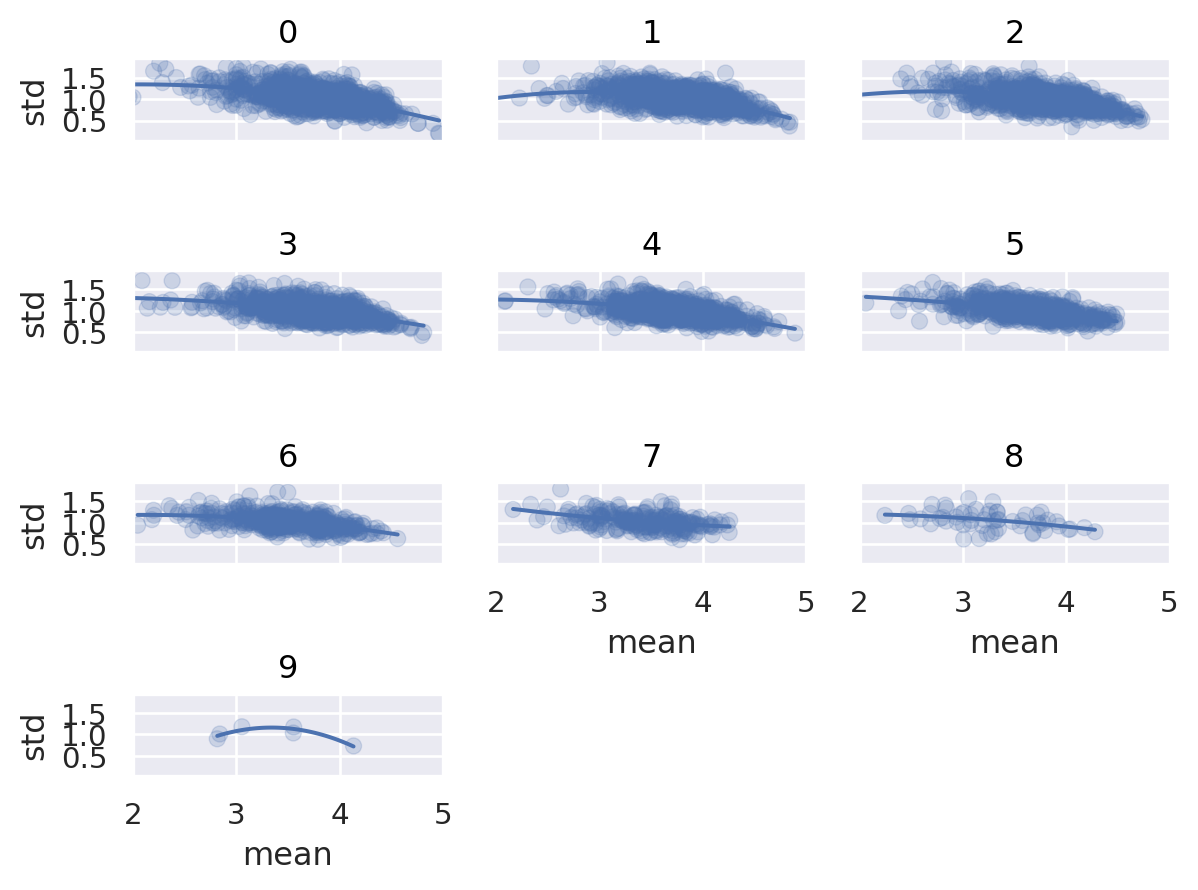

In [60]:
(
    so.Plot(user_rating_agg, x="mean", y="std")  # color mapping이 이후 모든 layer에 적용
    .facet(col="count_level", wrap = 2)
    .add(so.Dot(alpha=.2))
    .add(so.Line(), so.PolyFit(2))
    .limit(x=(2, 5))
)


### 위의 plot에서 평점을 얼마나 많이 남겼는지와 관계없이 비슷한 현상이 나타나는데 이 현상을 설명할 수 있을까요?
#### 평균이 높아지면 표준편차가 작아진다.

### 평균적으로 낮은 평점을 준 소위 짠 유저들이 더 비판적이고 고민끝에 평점을 준 것이라고 추측할 수 있을까요?

#### 평균적으로 낮은 평점을 준 소위 짠 유저들이 더 비판적이고 고민끝에 평점을 준 것이라고 추측할 수 없습니다. 왜냐하면 평점이 낮은 것은 단지 영화에 대한 개인의 취향과 기대가 맞지 않기 때문일 수 있기 때문입니다. 즉, 짠 유저들이 반드시 영화를 더 비판적으로 보고 고민끝에 평점을 준 것은 아니라고 볼 수 있습니다.

#### 또한, 평점이 낮은 것은 영화에 대한 개인의 취향과 기대가 맞지 않기 때문일 수 있습니다. 예를 들어, 어떤 사람은 액션 영화를 선호하는 반면, 다른 사람은 로맨스 영화를 선호할 수 있습니다. 따라서 액션 영화에 대해 평균적으로 낮은 평점을 준다고 해서 그 사람이 더 비판적이거나 고민끝에 평점을 준 것은 아닐 수 있습니다.

#### 따라서 평균적으로 낮은 평점을 준 소위 짠 유저들이 더 비판적이고 고민끝에 평점을 준 것이라고 추측하는 것은 타당하지 않습니다.

## 연습문제 9
### 장르별로 남녀의 선호 차이를 두 관점 1) 평점의 개수/비율, 2) 평점의 평균의 관점에서 따로 살펴봅니다.
#### movies 데이터에서 장르(genres)는 여러 장르에 포함되는 것을 | 기호로 나누어 표기되어 있고, 분석을 위해서 다음 코드를 이용해 long format으로 각 장르가 열에 한번씩만 나오도록 다음과 같이 바꾸세요.
#### 이 movie_long과 1번에서 만든 user_rating을 merge한 후 다음 문제를 이어가세요.

In [24]:
movies_long = movies.copy()

movies_long["genres"] = movies_long["genres"].str.split("|")
movies_long = movies_long.explode("genres")

movies_long.head(8)

movie_id                    title      genres
0          1         Toy Story (1995)   Animation
0          1         Toy Story (1995)  Children's
0          1         Toy Story (1995)      Comedy
..       ...                      ...         ...
1          2           Jumanji (1995)     Fantasy
2          3  Grumpier Old Men (1995)      Comedy
2          3  Grumpier Old Men (1995)     Romance

[8 rows x 3 columns]

In [25]:
user_rating_long = user_rating.merge(movies_long, on="movie_id")
user_rating_long

user_id gender  age  occupation    zip  movie_id  rating  timestamp  \
0              1      F    1          10  48067      1193       5  978300760   
1              2      M   56          16  70072      1193       5  978298413   
2             12      M   25          12  32793      1193       4  978220179   
...          ...    ...  ...         ...    ...       ...     ...        ...   
2101812     5851      F   18          20  55410      3607       5  957756608   
2101813     5851      F   18          20  55410      3607       5  957756608   
2101814     5938      M   25           1  35401      2909       4  957273353   

                                               title       genres  
0             One Flew Over the Cuckoo's Nest (1975)        Drama  
1             One Flew Over the Cuckoo's Nest (1975)        Drama  
2             One Flew Over the Cuckoo's Nest (1975)        Drama  
...                                              ...          ...  
2101812                     One Little Indian (1973)        Drama  
2101813                     One Little Indian (1973)      Western  
2101814  Five Wives, Three Secretaries and Me (1998)  Documentary  

[2101815 rows x 10 columns]

#### 9.1
#### 장르별로 평점의 개수를 간단히 플랏으로 살펴보는데 남녀 별로 따로 비율이 나오도록 해보세요.

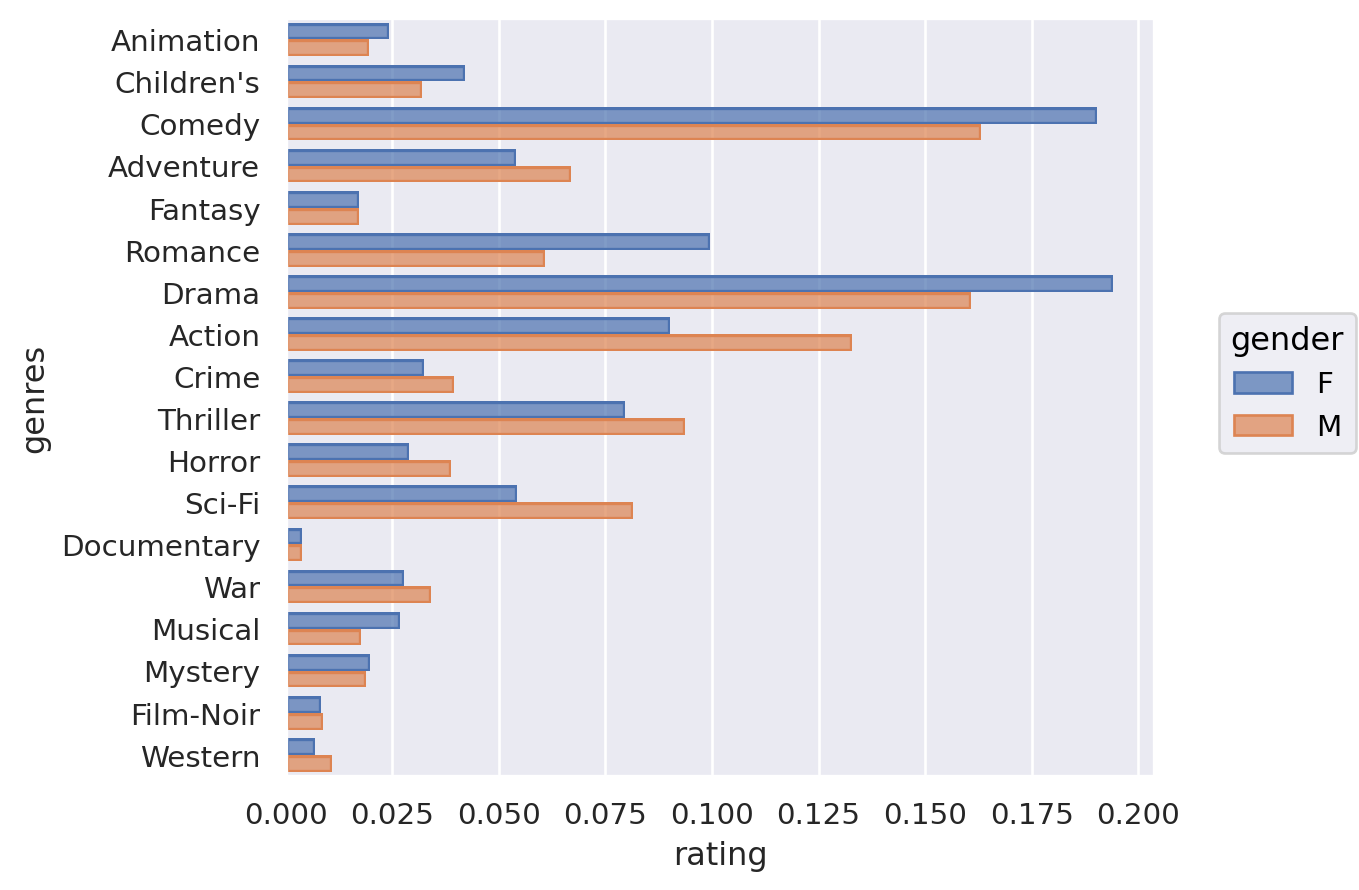

In [26]:
desired_order = ['Animation', "Children's", "Comedy", 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western']
user_rating_long['genres'] = pd.Categorical(user_rating_long['genres'], categories=desired_order, ordered=True)


(
    so.Plot(user_rating_long, x="rating", y="genres", color="gender")
    .add(so.Bar(),so.Hist("proportion", common_norm=False), so.Dodge())
)


### 9.2
#### 이번에는 장르별로 평점의 평균를 남녀별로 간단히 플랏으로 확인해보세요.

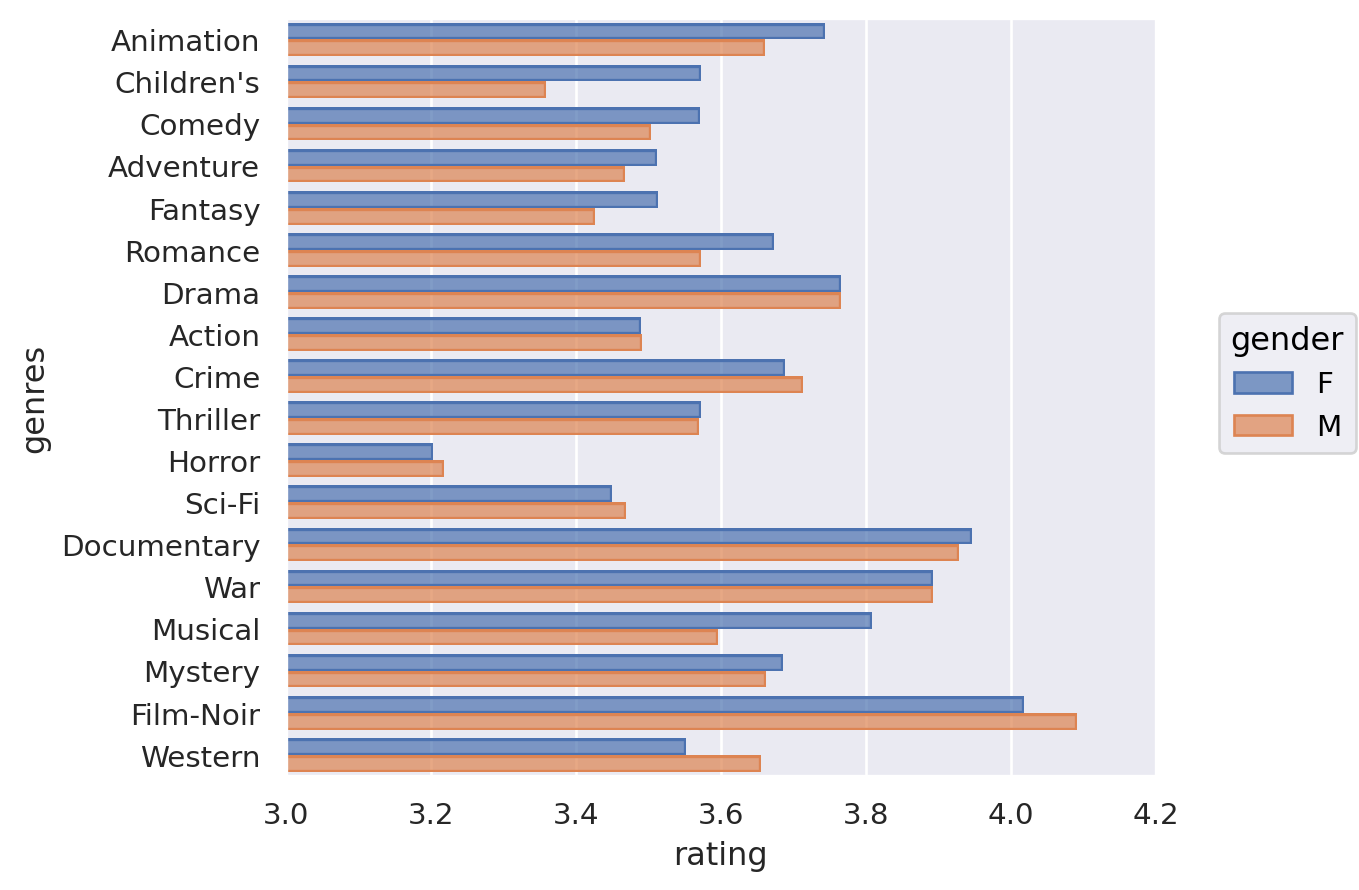

In [27]:
(
    so.Plot(user_rating_long, x="rating", y="genres", color="gender")
    .add(so.Bar(), so.Agg("mean"), so.Dodge())
    .limit(x=(3, 4.2))
)


### 9.3
#### 위의 플랏에서 살펴본 평균 평점의 값을 직접 구해봅니다. 장르별, 남녀로 그룹핑을 하여 평균 평점을 다음과 같이 나오도록 구해보세요.
#### unstack()을 활용해 보세요.

In [28]:
fm_mean = user_rating_long.groupby(["genres", "gender"])["rating"].mean().unstack().reset_index()
fm_mean

gender      genres    F    M
0        Animation 3.74 3.66
1       Children's 3.57 3.36
2           Comedy 3.57 3.50
..             ...  ...  ...
15         Mystery 3.69 3.66
16       Film-Noir 4.02 4.09
17         Western 3.55 3.66

[18 rows x 3 columns]

### 9.4
#### 영화별 남녀의 평균 평점의 차이(Female - Male) 순으로 정렬된 플랏을 대략적으로 다음과 같이 그려봅니다.
#### Customizing할 때, .limit(x=(3, 4.2))과 .scale(y=so.Nominal(order=[]))이 필요할 수 있습니다.

In [29]:
# Female - Male 계산
fm_mean["F-M"] = fm_mean["F"] - fm_mean["M"]
fm_mean_sorted = fm_mean.sort_values(by="F-M", ascending=True)

order_fm = fm_mean_sorted['genres'].tolist()
order_fm

['Western',
 'Film-Noir',
 'Crime',
 'Sci-Fi',
 'Horror',
 'Action',
 'Drama',
 'War',
 'Thriller',
 'Documentary',
 'Mystery',
 'Adventure',
 'Comedy',
 'Animation',
 'Fantasy',
 'Romance',
 'Musical',
 "Children's"]

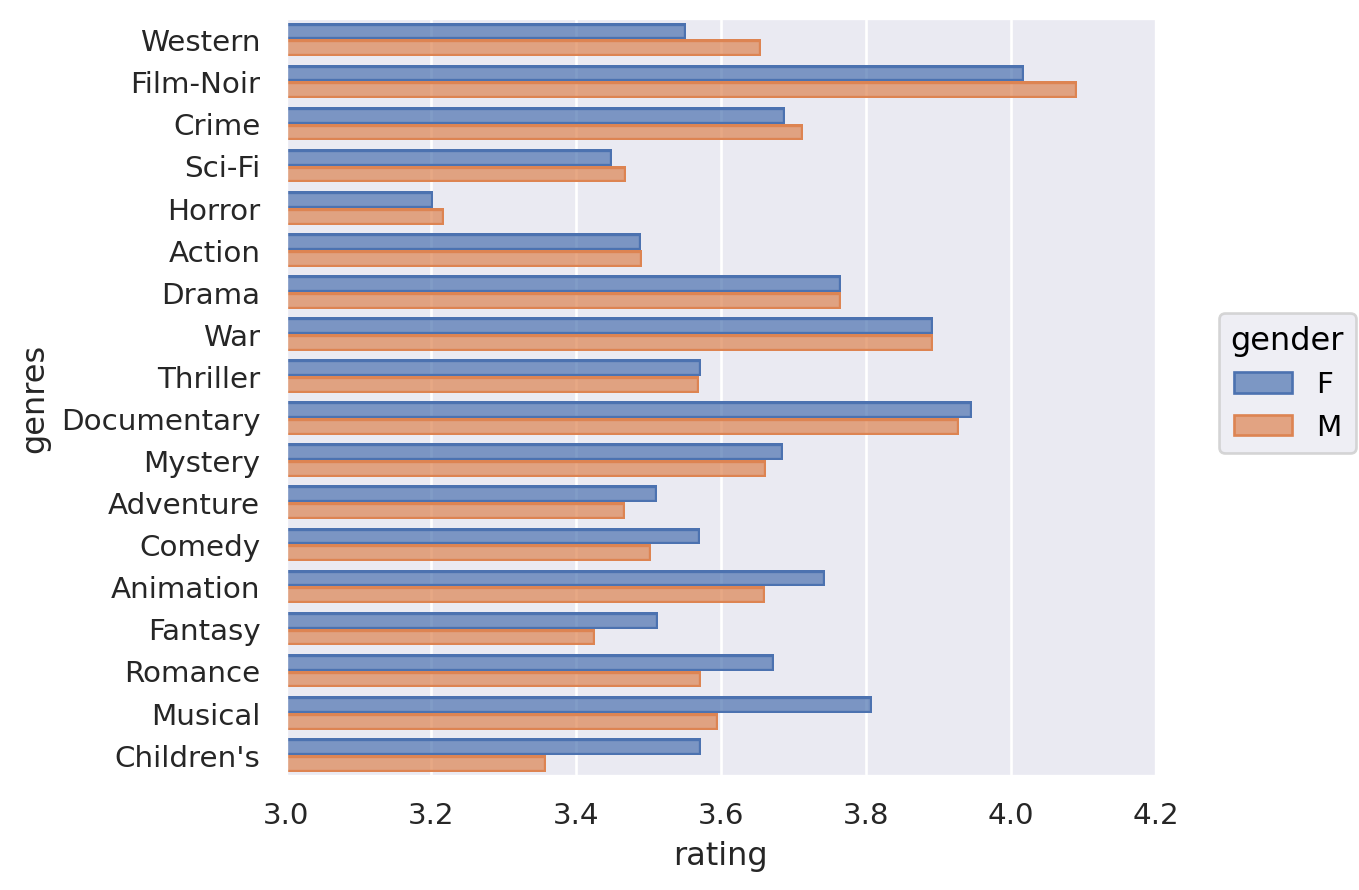

In [30]:
(
    so.Plot(user_rating_long, x="rating", y="genres", color="gender")
    .add(so.Bar(), so.Agg("mean"), so.Dodge())
    .scale(y=so.Nominal(order=order_fm))
    .limit(x=(3, 4.2))

)


### 9.5
#### 평점의 장르별 분포를 boxplot으로 볼 수도 있지만, 대신 seaborn.object의 Range()를 써서 평균과 표준편차를 다음과 같이 그려보세요.
#### range는 .add(so.Range(), so.Est("mean", errorbar="sd"))를 활용하고
#### 평균은 Agg()을 이용해 표시합니다

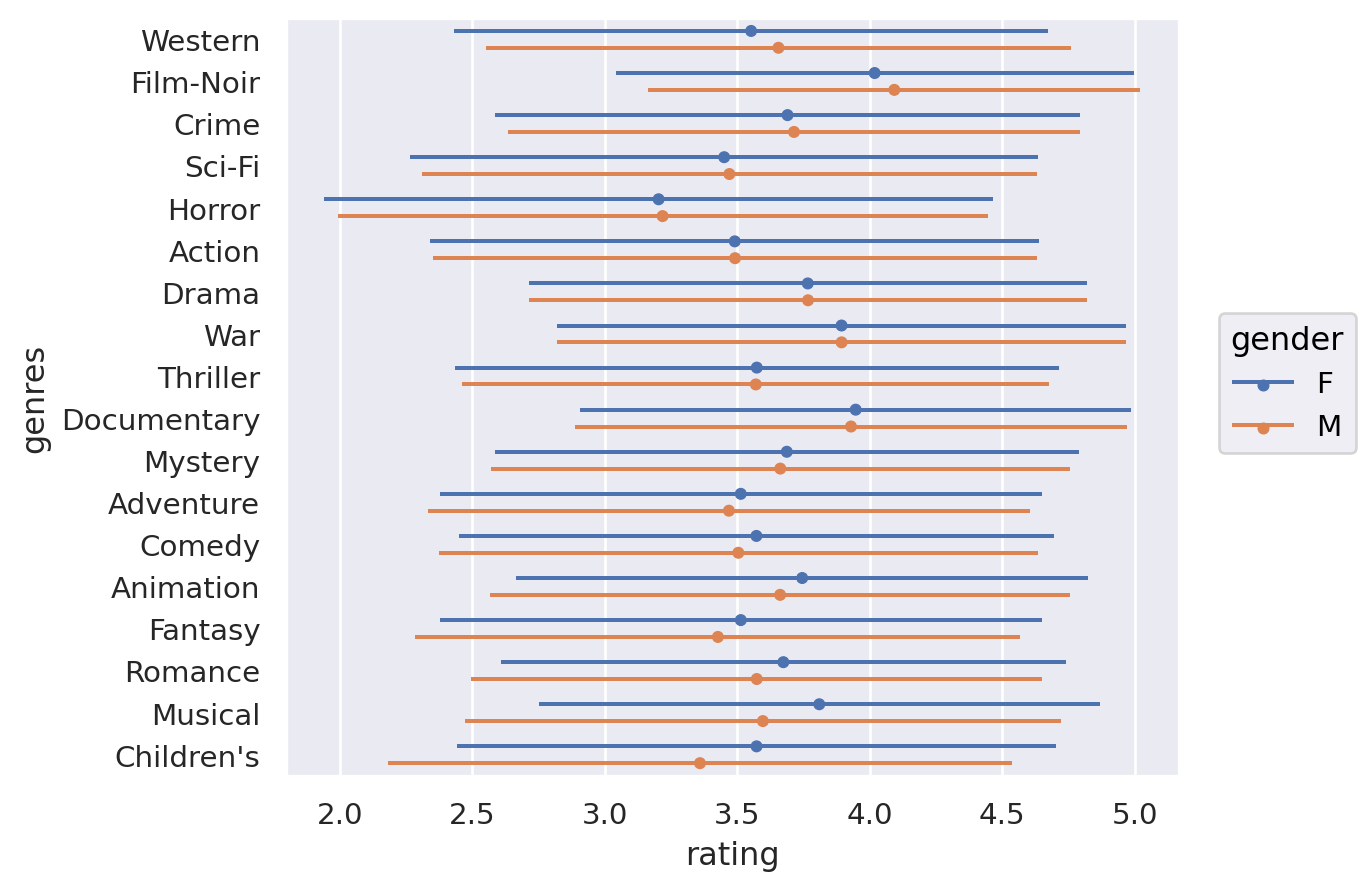

In [31]:
(
    so.Plot(user_rating_long, x="rating", y="genres", color="gender")
    .add(so.Dot(pointsize=4), so.Agg("mean"), so.Dodge())
    .add(so.Range(), so.Est("mean", errorbar="sd"), so.Dodge())
    .scale(y=so.Nominal(order=order_fm))
)

## 연습문제 10

### 10.1
#### 우선, 위에서 western 장르가 남녀의 평점 차이가 가장 크게 나타나 남성이 선호하는 것으로 보이는데 western 장르만 따로 떼어 나이대/남녀 별로 rating에 차이가 있는지 살펴봅니다.
#### 우선 scatterplot으로 살펴보는 것이 유용한지 체크해보세요.
#### 개선할 방법이 있을까요?
#### Fitted line만을 so.PolyFit(5)을 이용하여 다음과 같이 그려보세요.
#### x축 눈금은 .scale(x=so.Continuous().tick(at=[1, 18, 25, 35, 45, 50, 56]))

In [32]:
western_rating = user_rating_long[user_rating_long["genres"] == "Western"]
western_rating = western_rating.groupby(["gender", "age"]).agg(mean=('rating', 'mean'))
western_rating = western_rating.reset_index()
western_rating

gender  age  mean
0       F    1  3.60
1       F   18  3.24
2       F   25  3.45
..    ...  ...   ...
11      M   45  3.67
12      M   50  3.73
13      M   56  3.80

[14 rows x 3 columns]

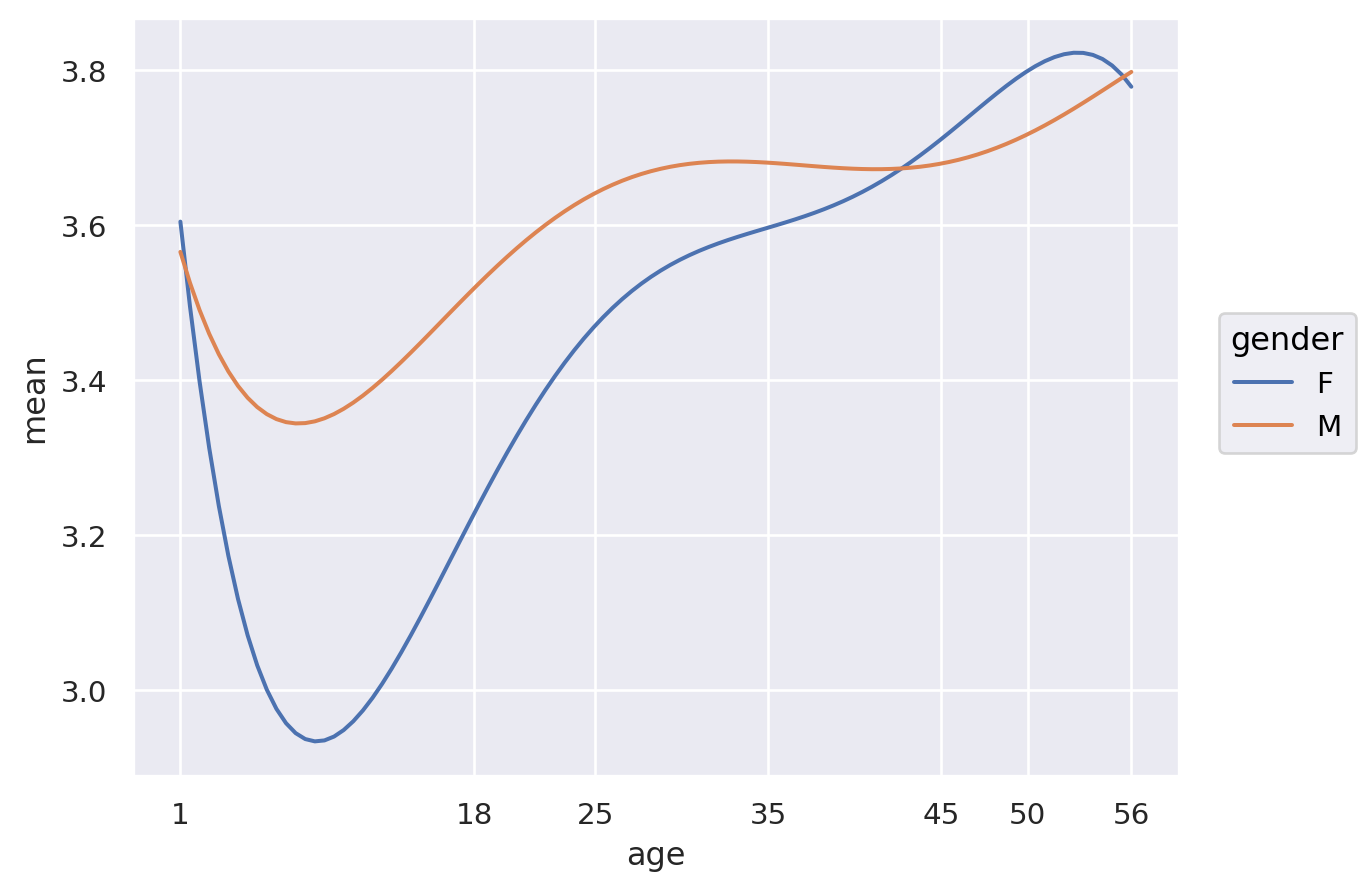

In [33]:
(
    so.Plot(western_rating, x="age", y="mean", color="gender")  # color mapping이 이후 모든 layer에 적용
    .add(so.Line(), so.PolyFit(5))
    .scale(x=so.Continuous().tick(at=[1, 18, 25, 35, 45, 50, 56]))
)

#### 어떤 점을 파악할 수 있나요?
##### western 장르의 남녀 차이는 18:18-24세 사이에 가장 커보이고 그 갭은 다른 연령대에서는 줄어드는 것으로 보입니다.

### 10.2
#### western 장르의 남녀 차이는 18:18-24세 사이에 가장 커보이고 그 갭은 다른 연령대에서는 줄어드는 것으로 보입니다.
#### 하지만, 만약 18-24세 대에서 남성이 여성에 비해 과하게 많은 평점을 내렸다면 적절한 결론이 아닐 수 있습니다. 즉, 18-24세 대에서 평점의 개수 비율이 남녀가 동일해야 좀 더 확신을 가질 수 있습니다.
#### 이를 확인하기 위해 다음과 같은 테이블을 구해보세요.
##### 예를 들어, 18:18-24세 남성의 14%와 여성의 14%가 평점을 남겼으며, 45:45-49세 남성의 15%와 여성의 9%가 평점을 남겼습니다.

In [35]:
western_rating = user_rating_long[user_rating_long["genres"] == "Western"]
western_rating_agg = western_rating.groupby(["age", "gender"]).agg(mean=('rating', 'mean'), size=('rating', 'count'))

western_rating_agg['total'] = western_rating_agg.groupby('gender')['size'].transform('sum')
western_rating_agg['ratio'] = western_rating_agg['size'] / western_rating_agg['total']

western_rating_agg.reset_index(inplace=True)
western_rating_agg


age gender  mean  size  total  ratio
0     1      F  3.60    91   3477   0.03
1     1      M  3.57   244  17206   0.01
2    18      F  3.24   503   3477   0.14
..  ...    ...   ...   ...    ...    ...
11   50      M  3.73  2090  17206   0.12
12   56      F  3.77   220   3477   0.06
13   56      M  3.80  1113  17206   0.06

[14 rows x 6 columns]

### 10.3
#### 이 테이블을 다음과 같이 비율을 pointsize에 mapping하여 시각화해보고, 동일한 나이대에서 남녀의 평점 개수 비율에 차이가 크게 나는지 살펴보세요.

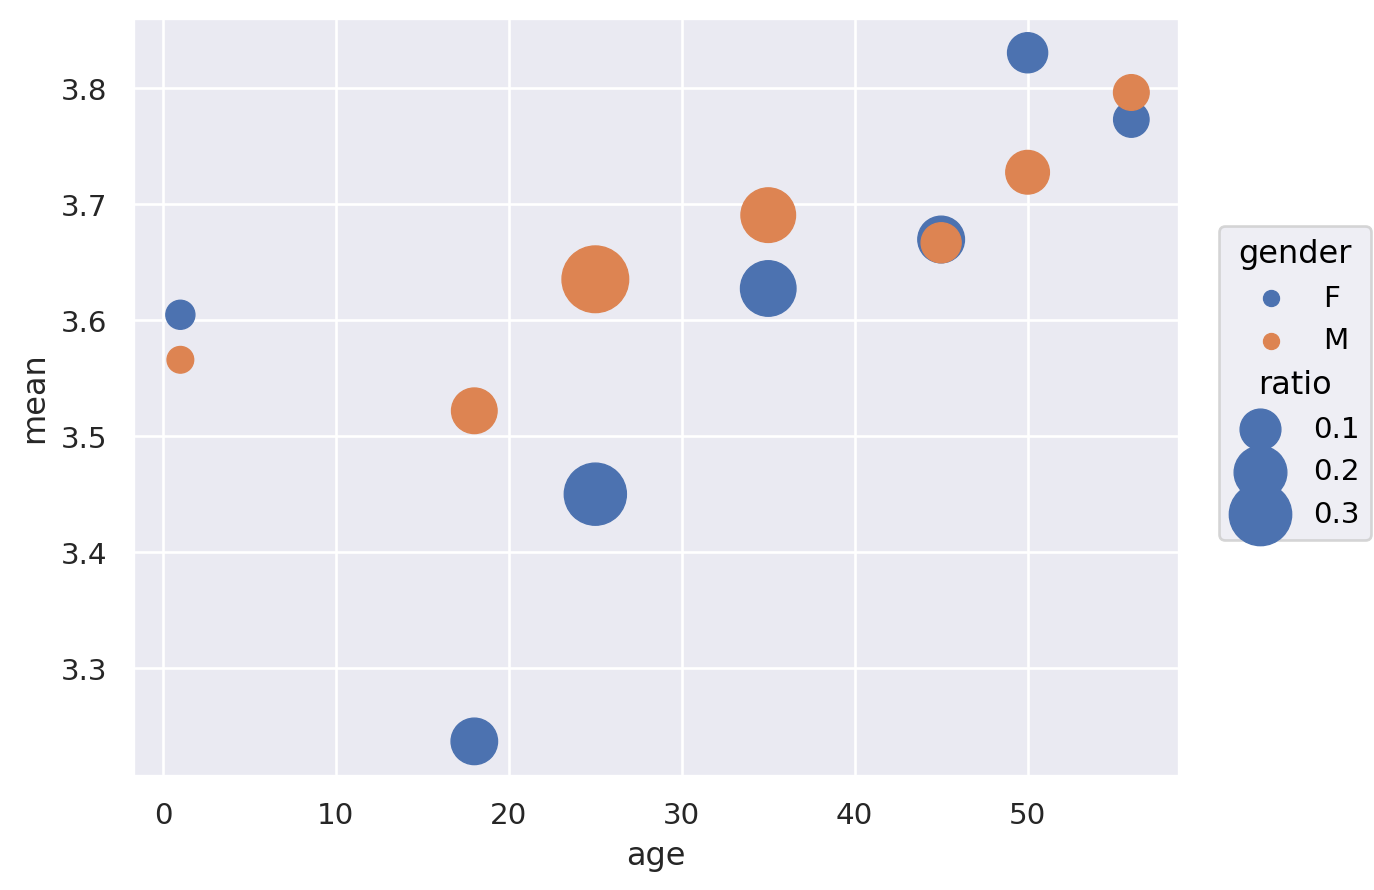

In [36]:
(
    so.Plot(western_rating_agg, x="age", y="mean", color="gender", pointsize="ratio")
    .add(so.Dot())
    .scale(pointsize=(10, 25))  # pointsize의 range설정
)

### 10.4
#### 이제 모든 장르를 한눈에 살펴보기 위해 facet을 이용해 다음과 같이 시각화해보세요.

In [37]:
rating_all = user_rating_long.groupby(["gender", "age", "genres"]).agg(mean=('rating', 'mean'))
rating_all = rating_all.reset_index()
rating_all

gender  age      genres  mean
0        F    1   Animation  3.73
1        F    1  Children's  3.53
2        F    1      Comedy  3.57
..     ...  ...         ...   ...
249      M   56     Mystery  3.84
250      M   56   Film-Noir  4.11
251      M   56     Western  3.80

[252 rows x 4 columns]

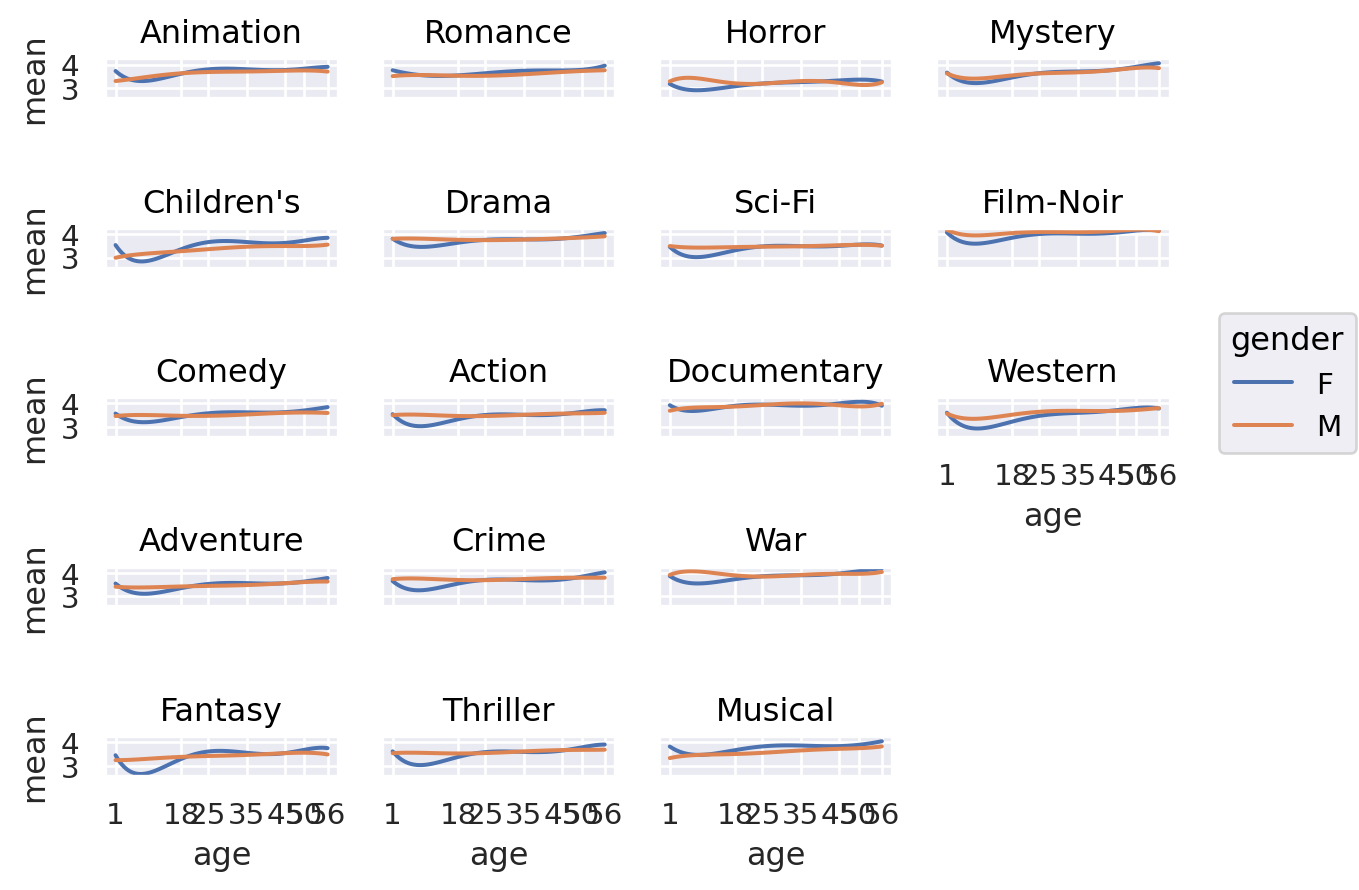

In [61]:
(
    so.Plot(rating_all, x="age", y="mean", color="gender")  # color mapping이 이후 모든 layer에 적용
    .add(so.Line(), so.PolyFit(5))
    .scale(x=so.Continuous().tick(at=[1, 18, 25, 35, 45, 50, 56]))
    .facet(row="genres", wrap=5)
)

Animation


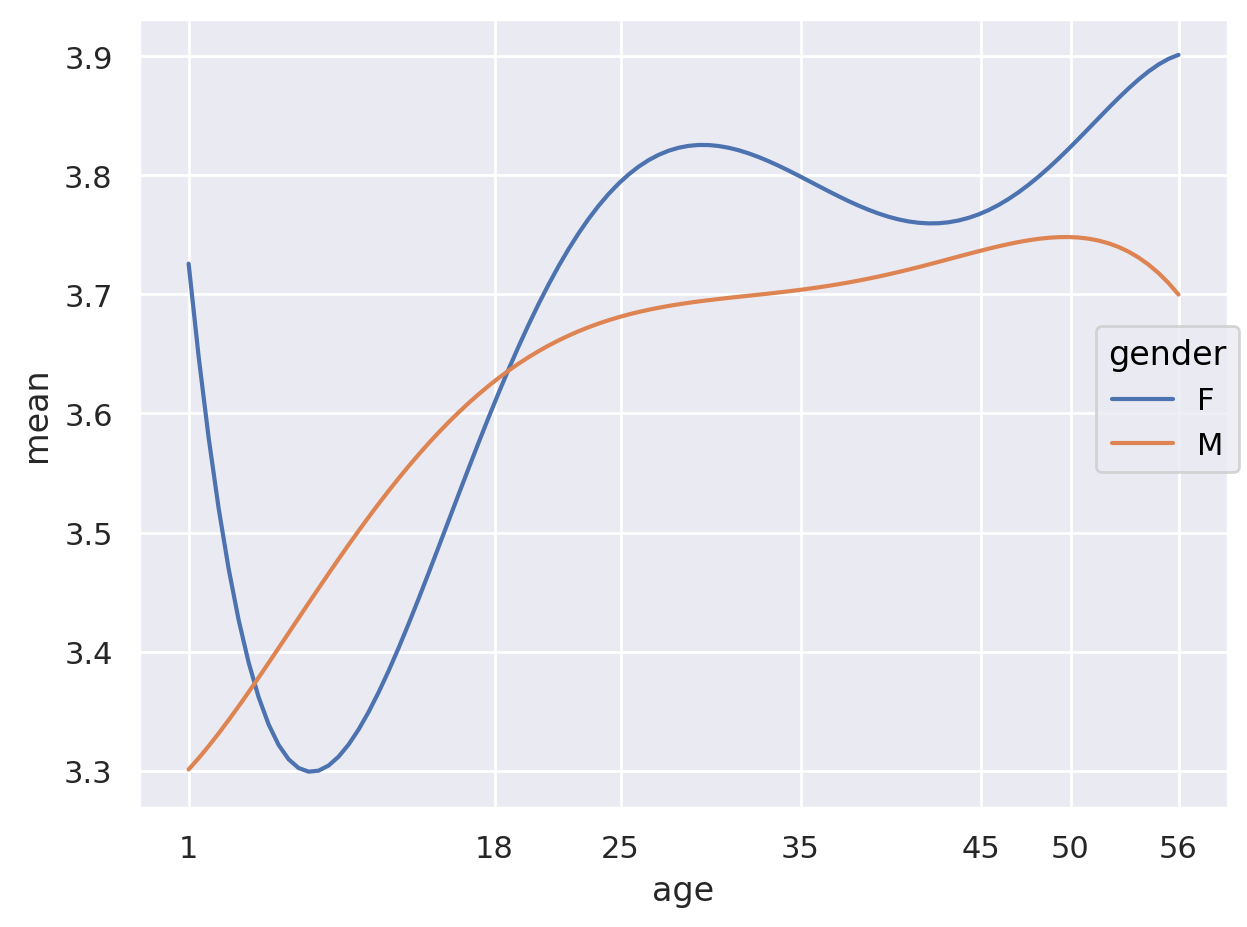

Children's


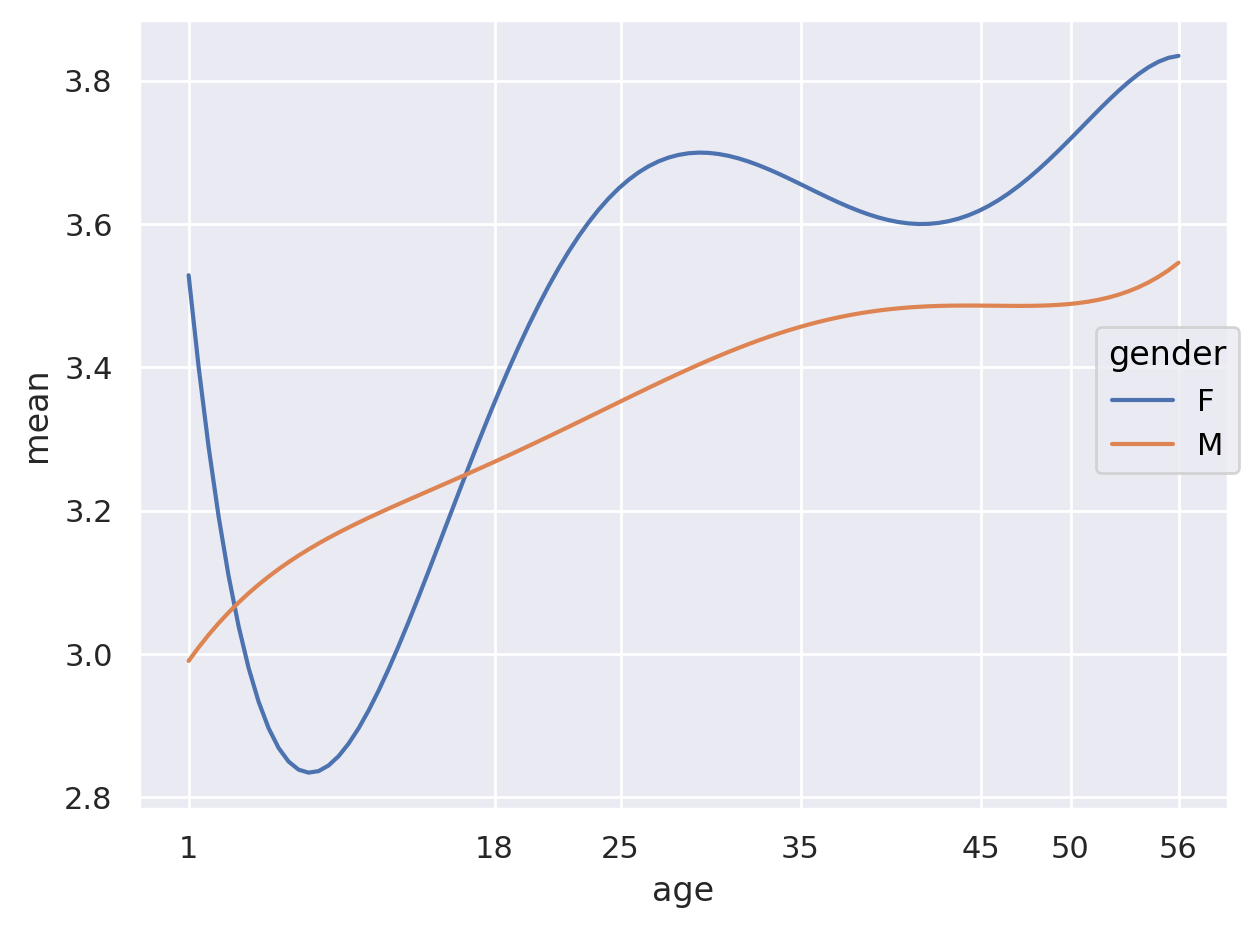

Comedy


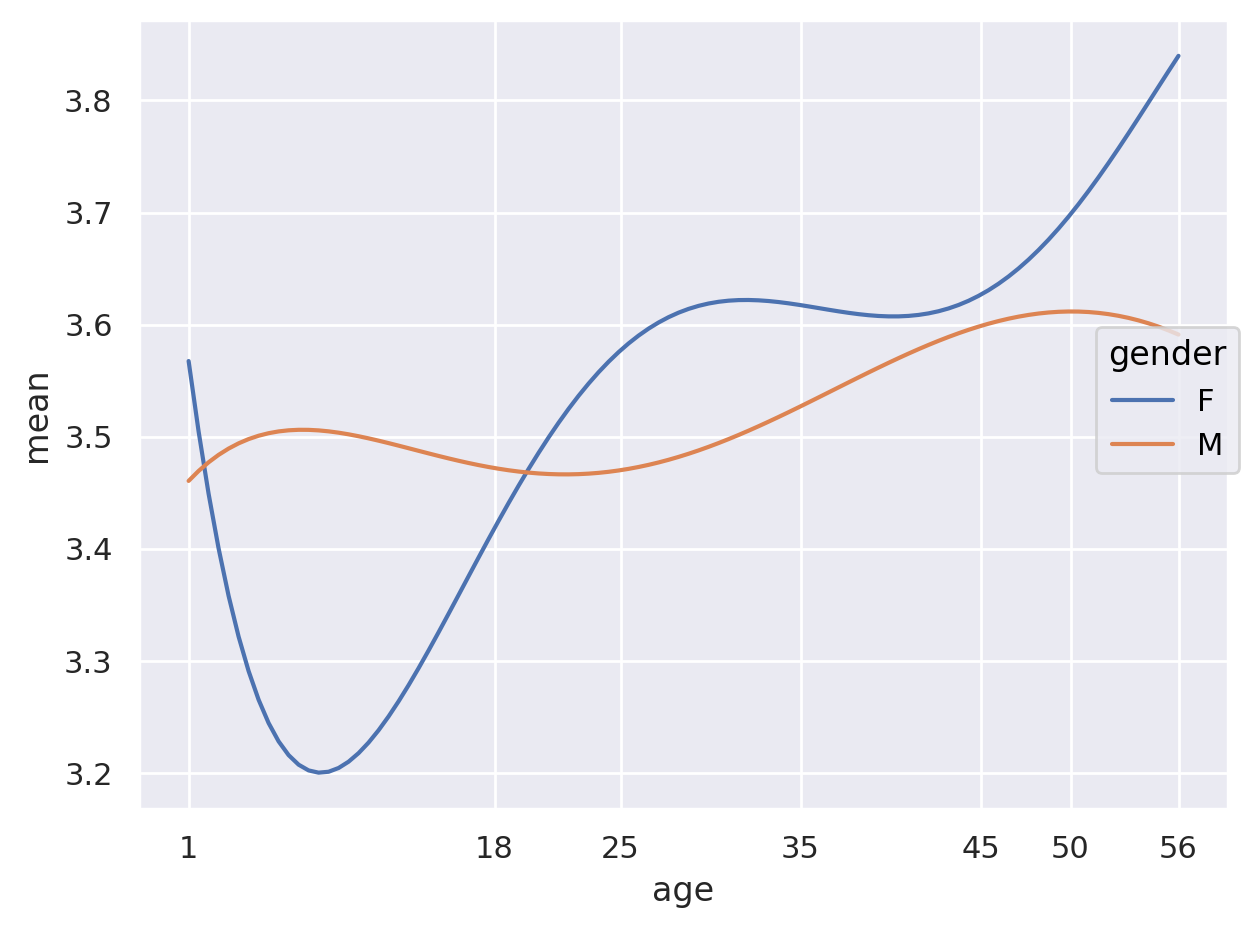

Adventure


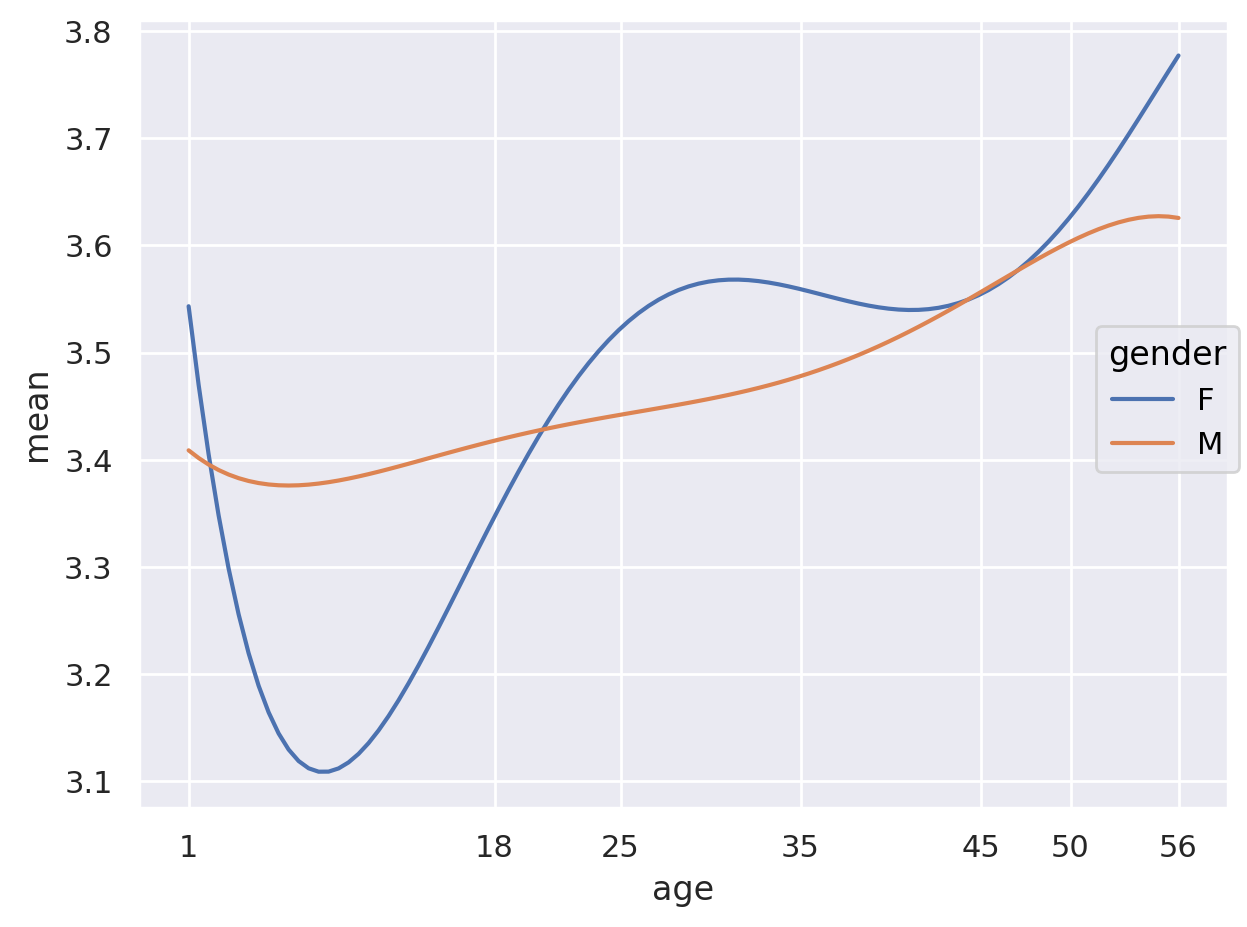

Fantasy


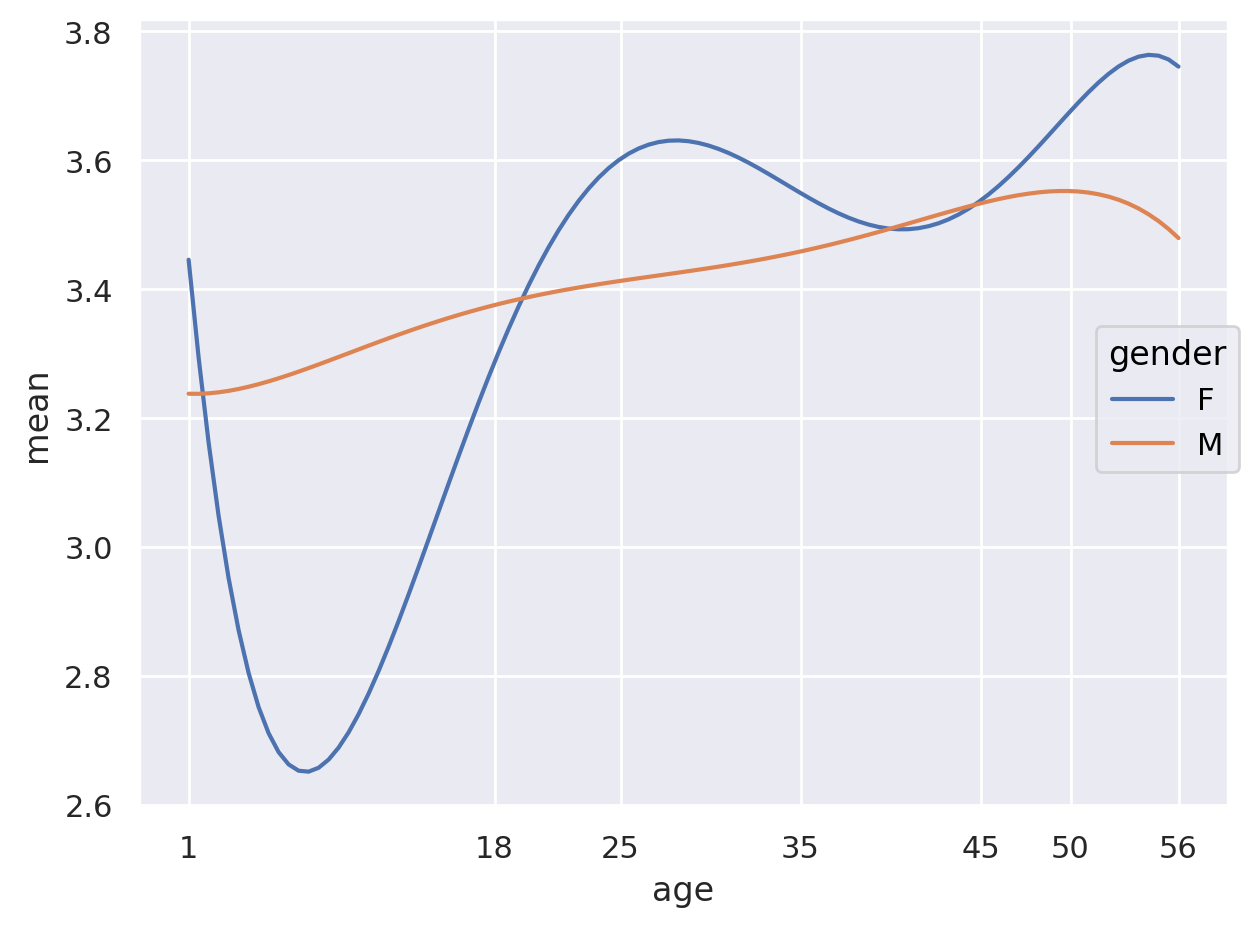

Romance


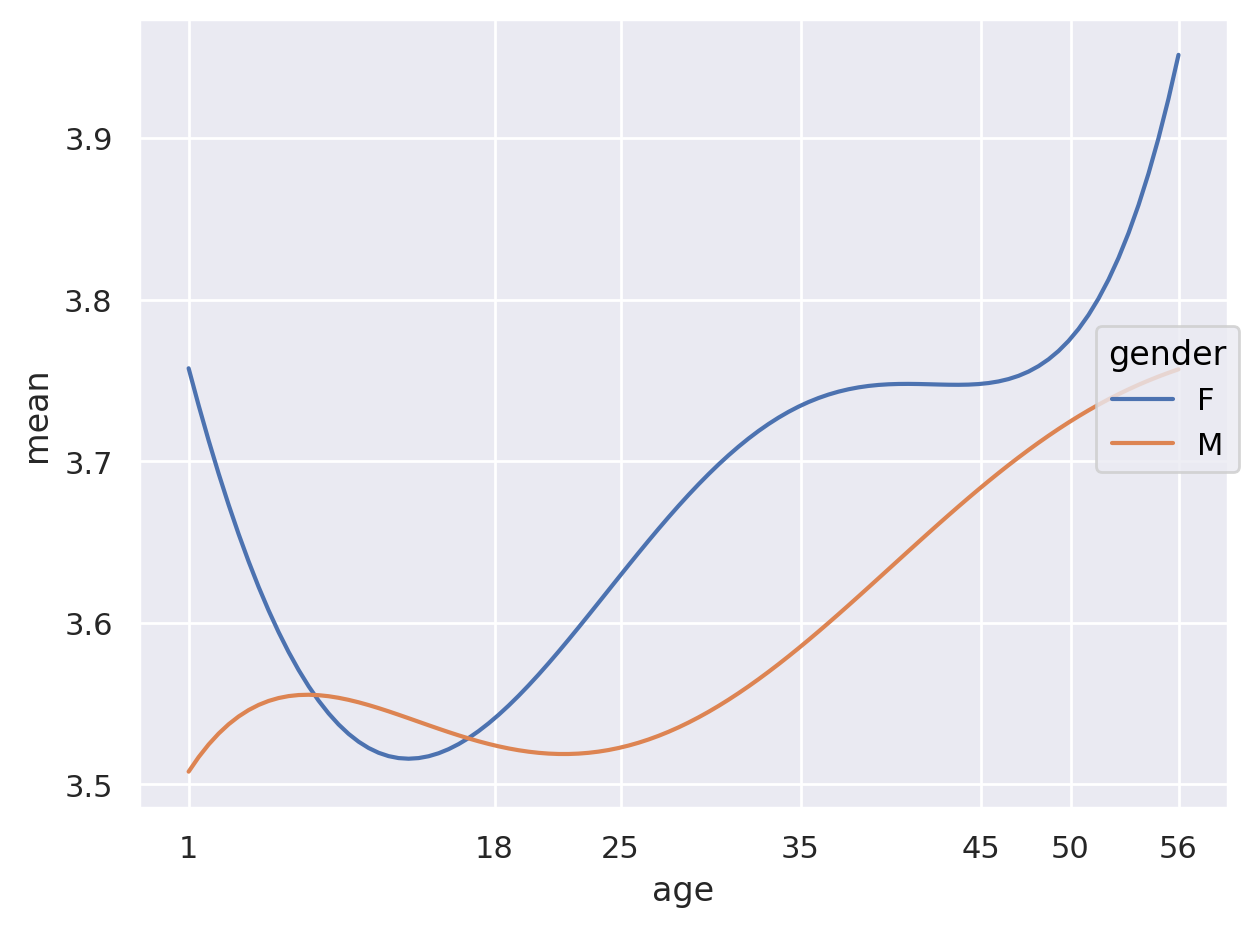

Drama


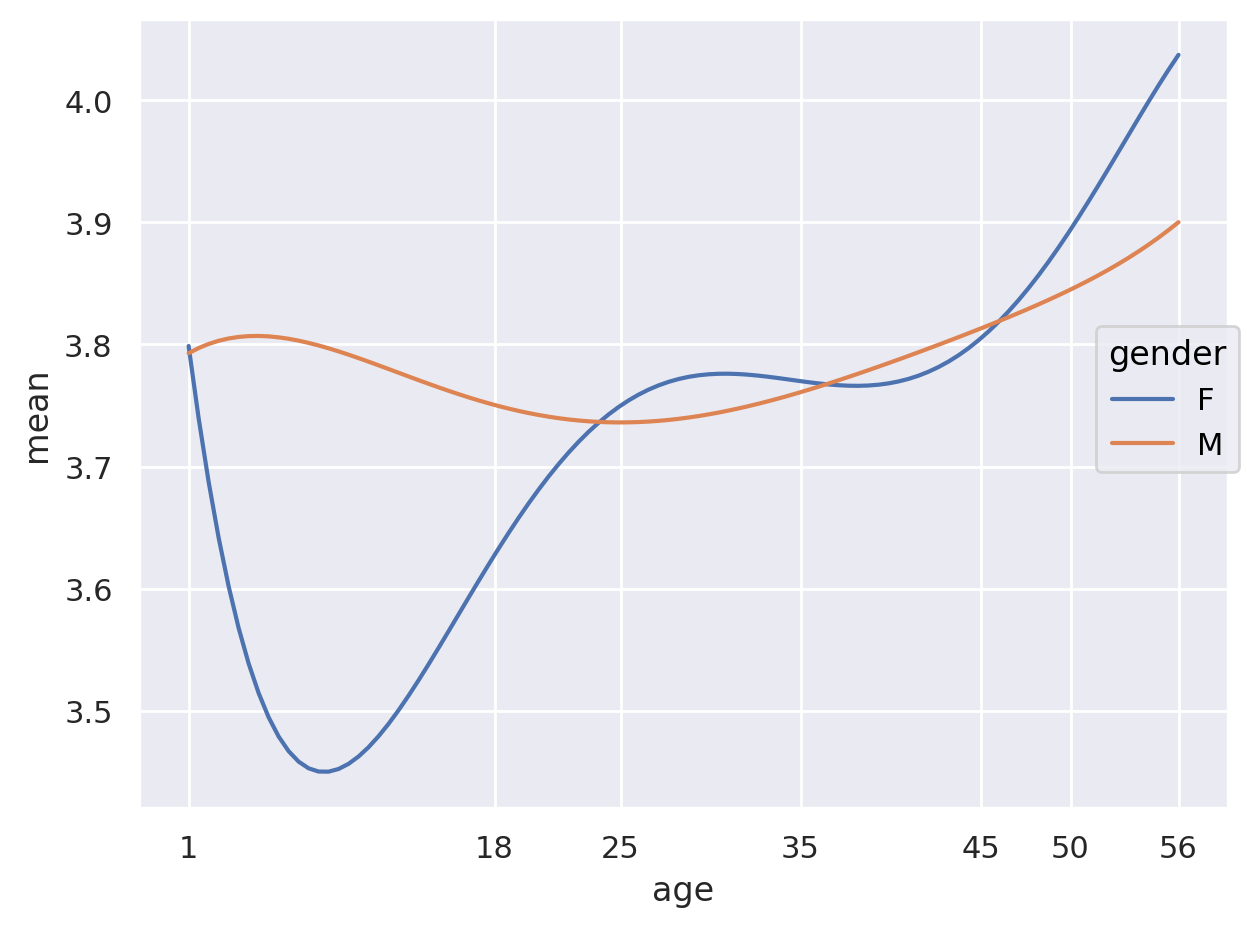

Action


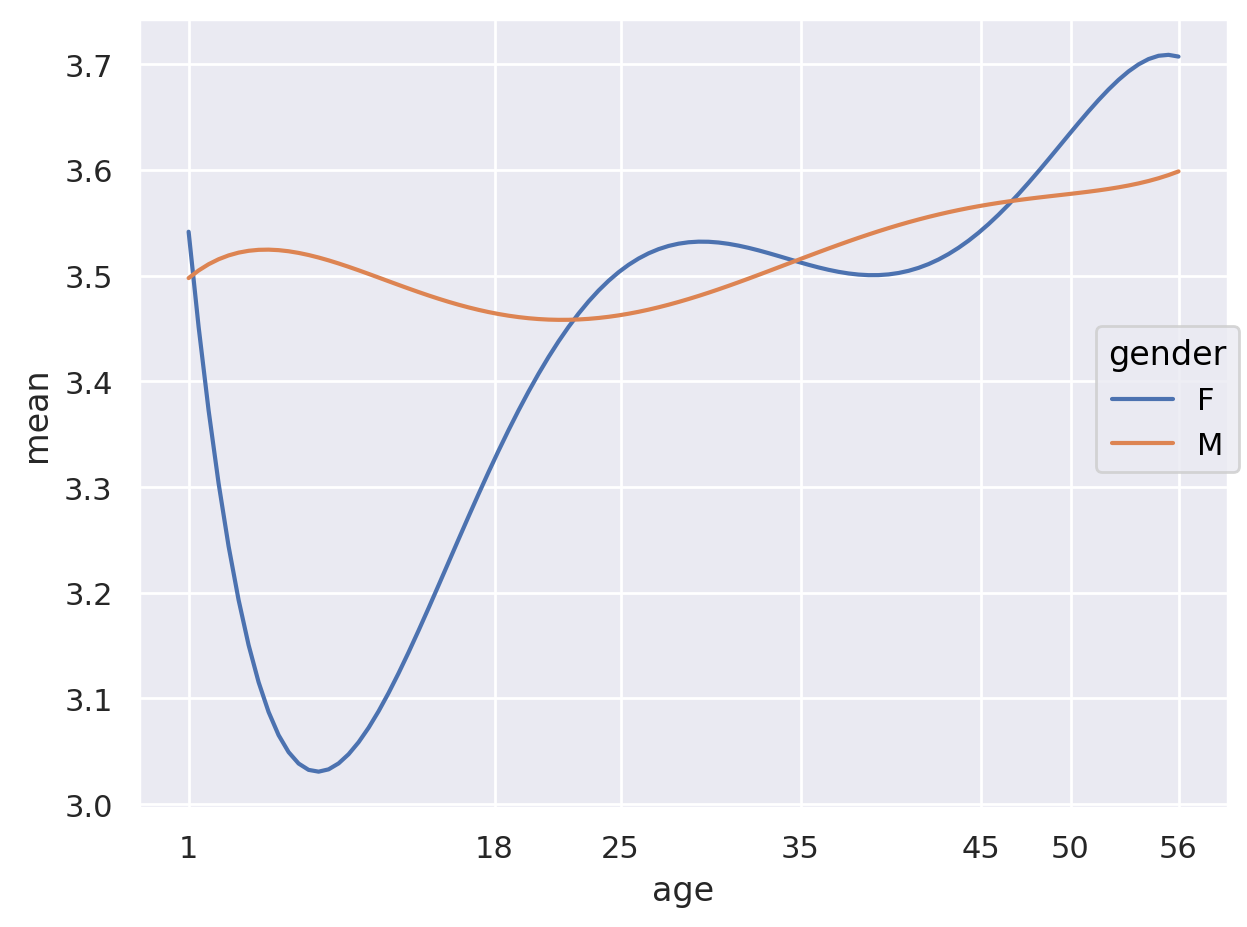

Crime


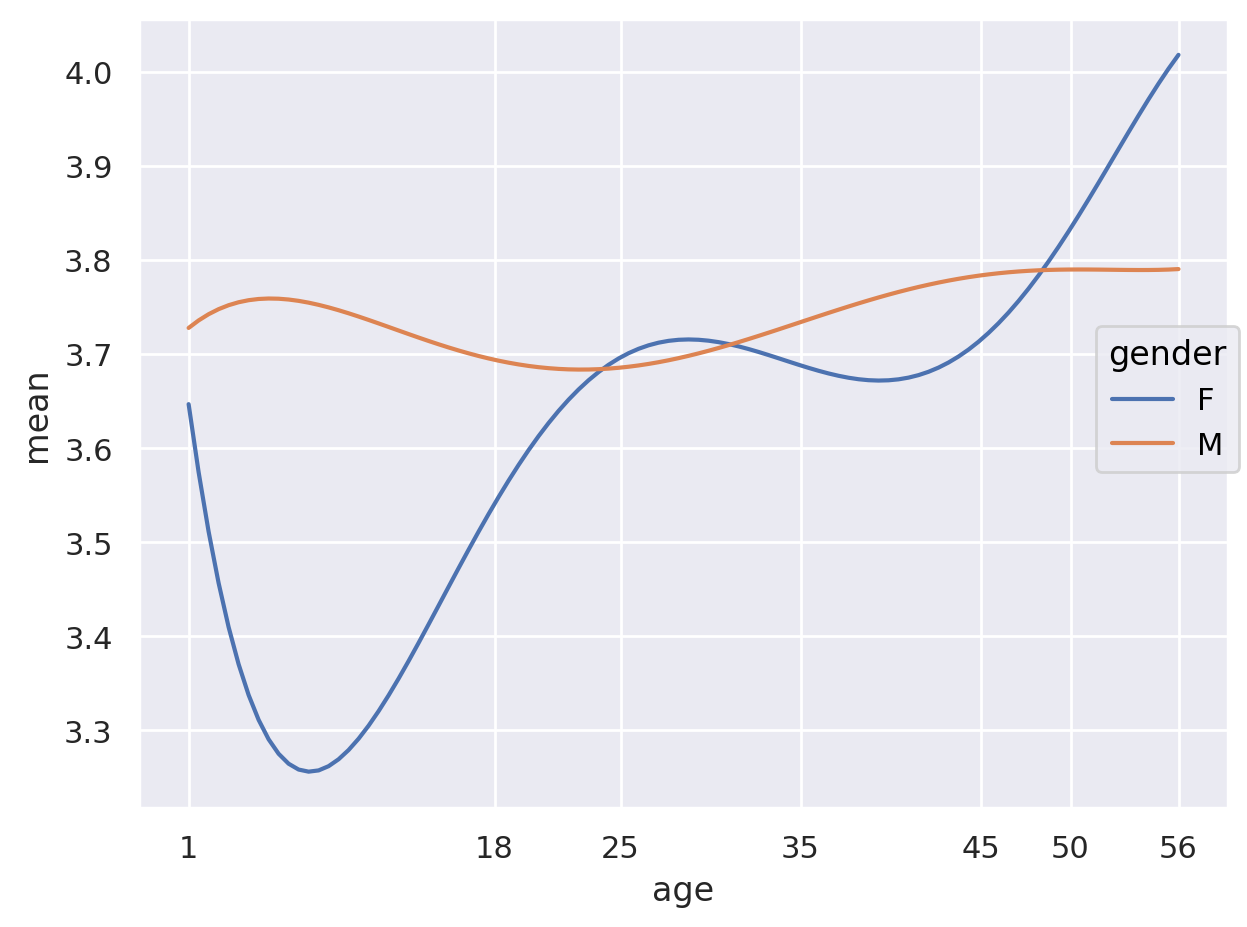

Thriller


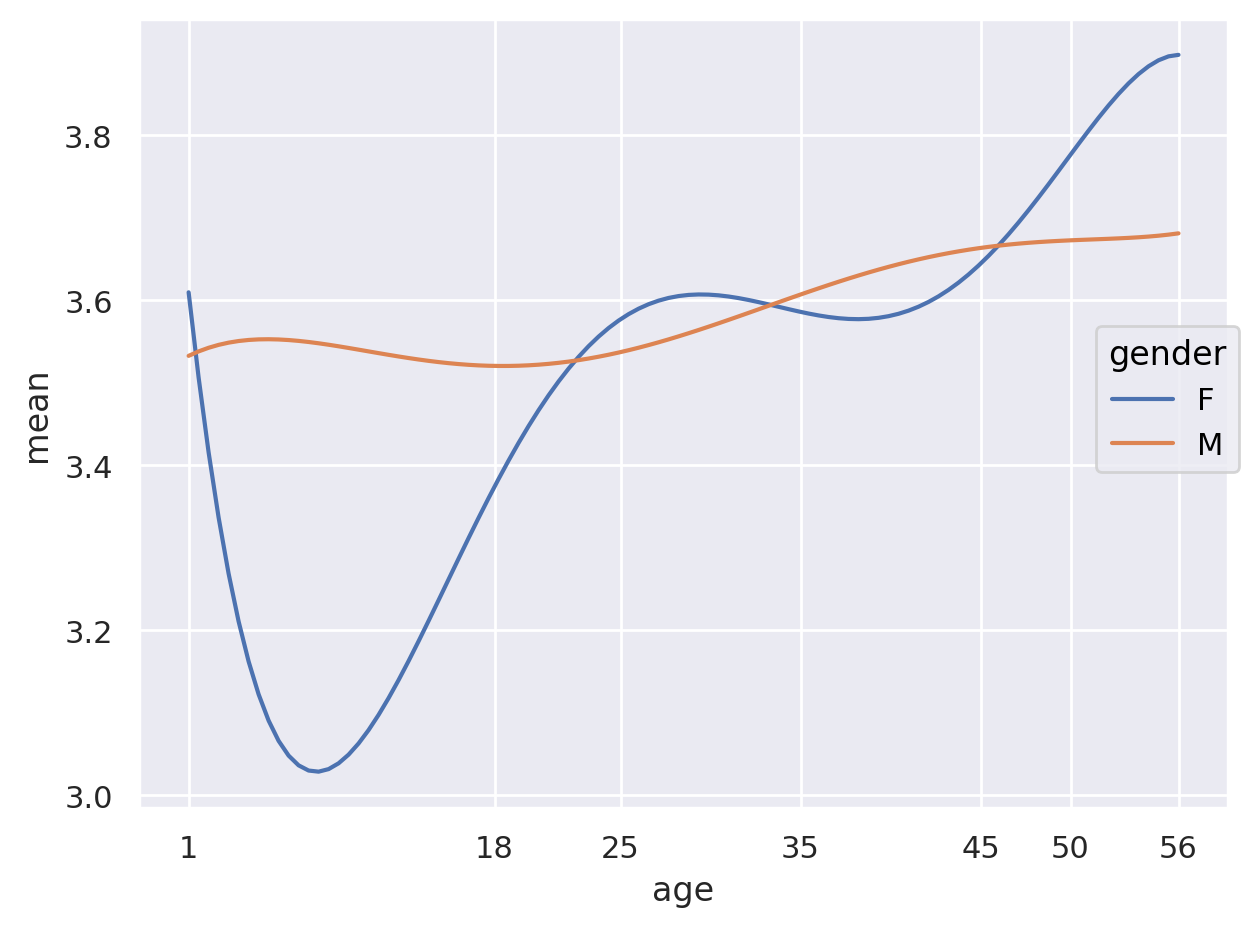

Horror


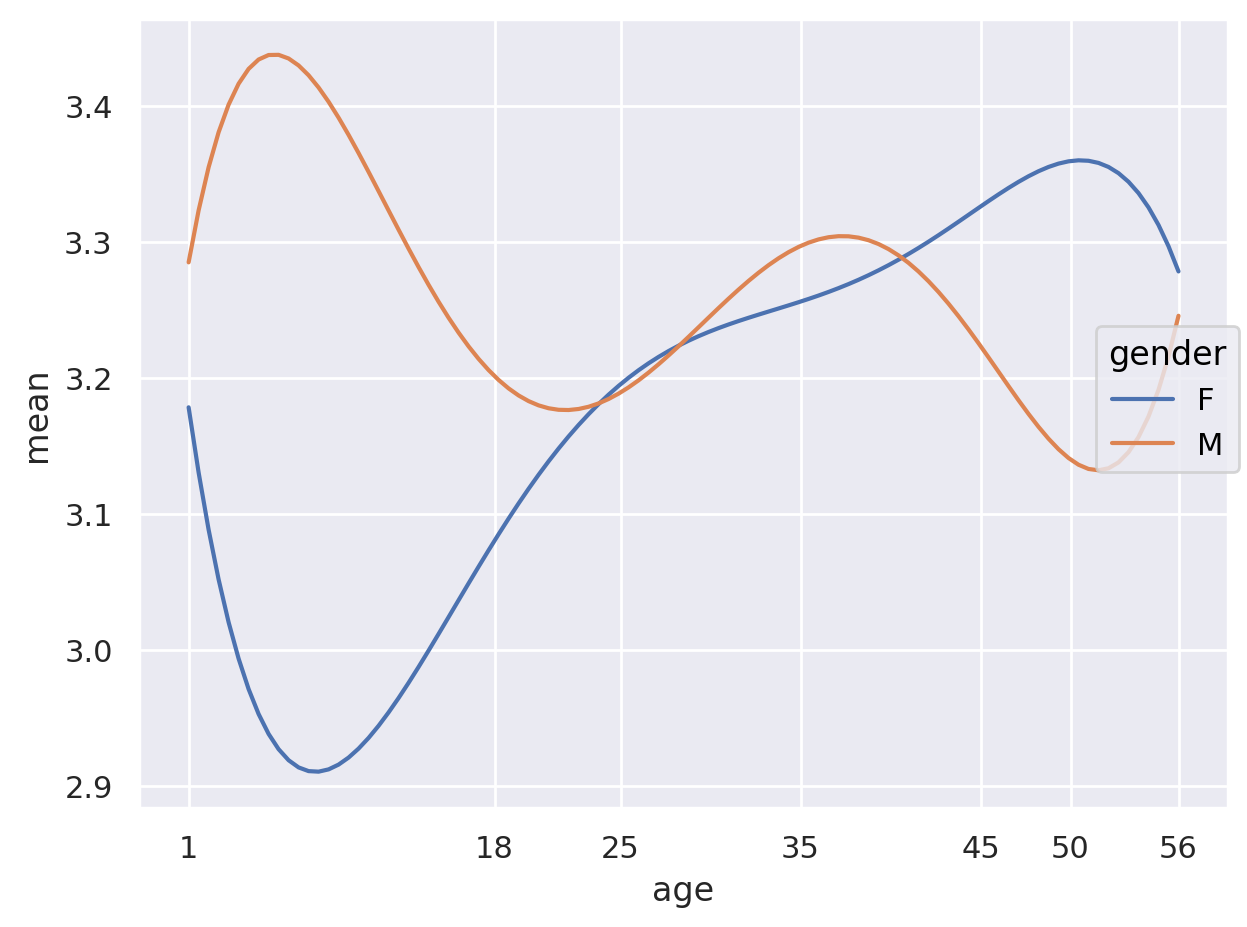

Sci-Fi


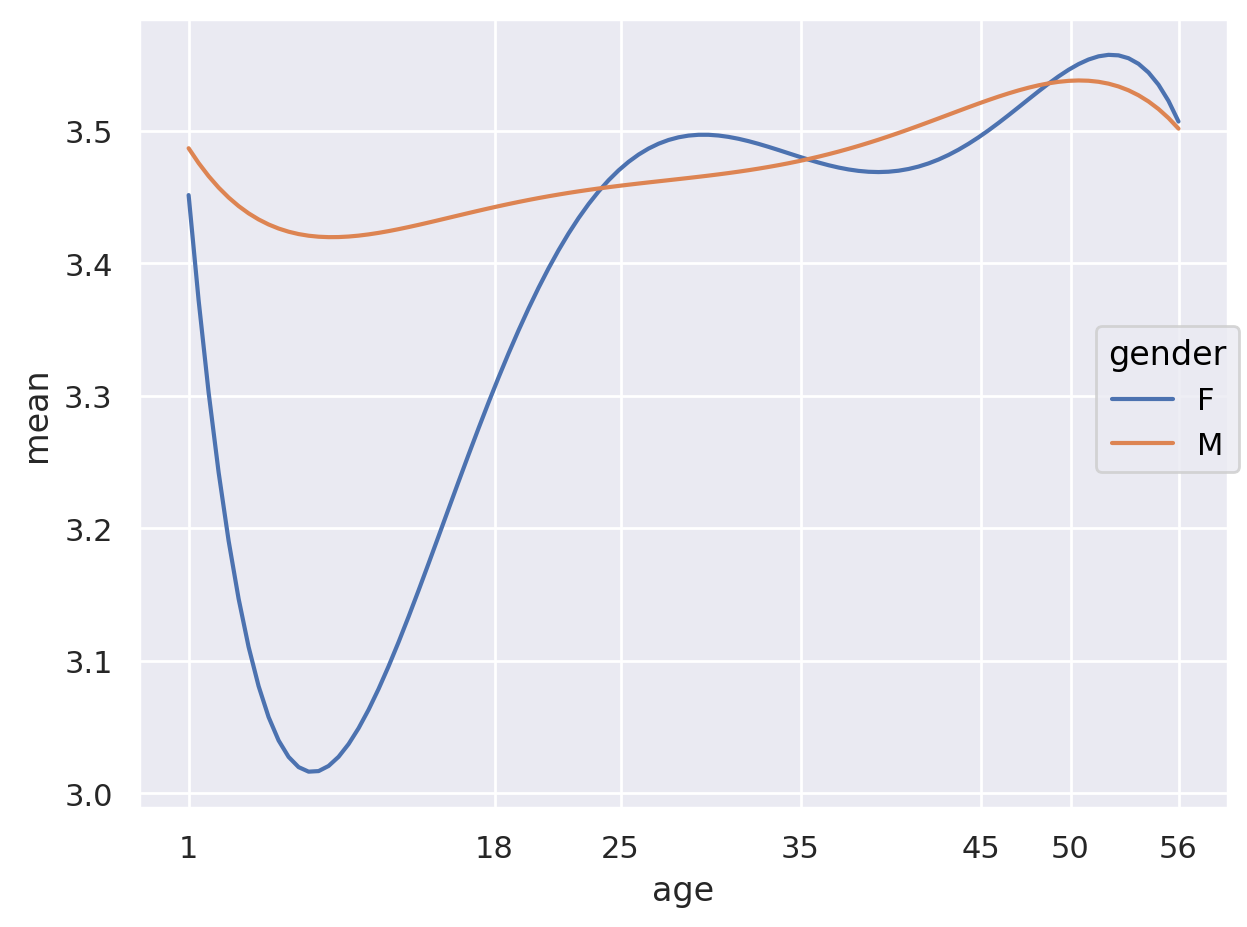

Documentary


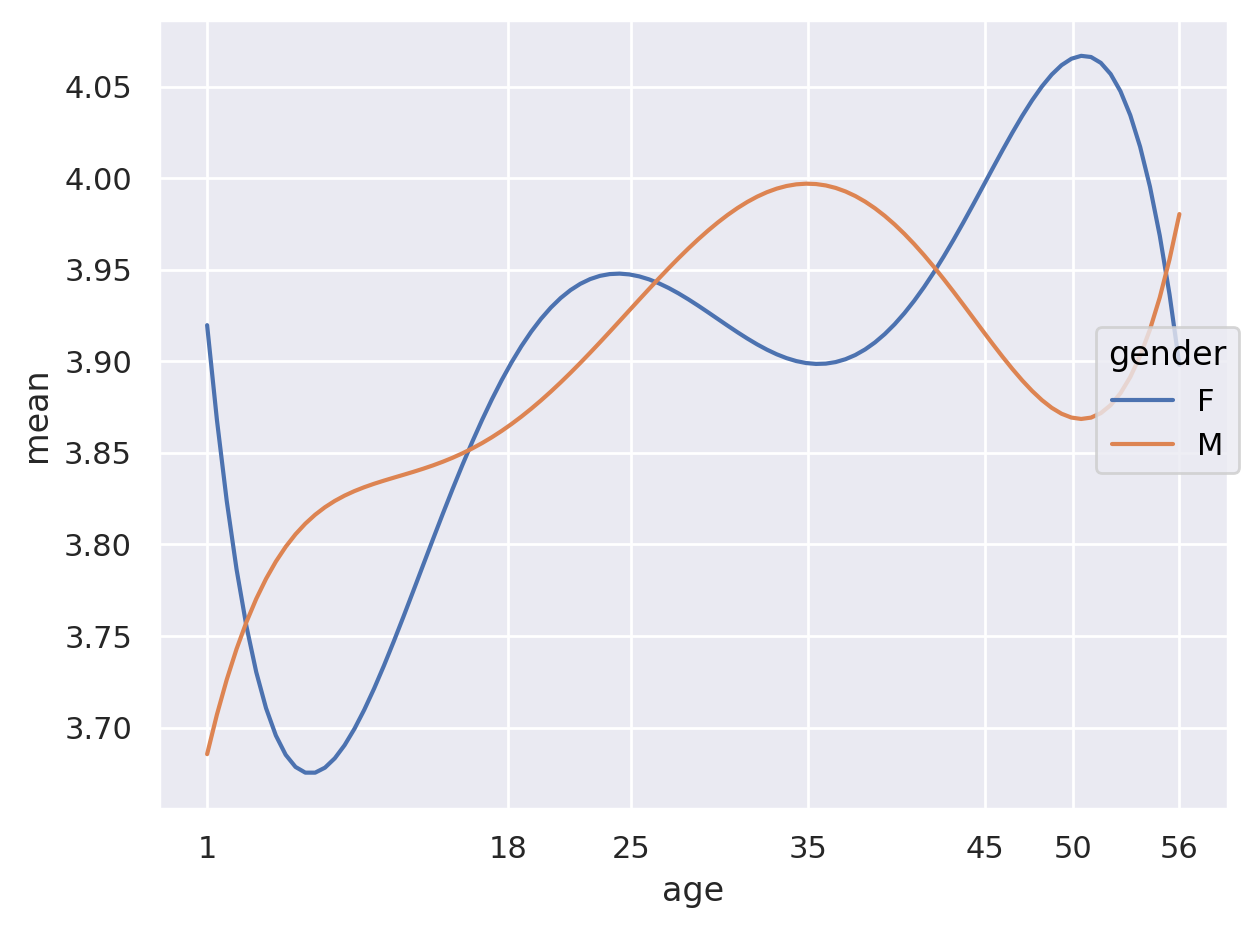

War


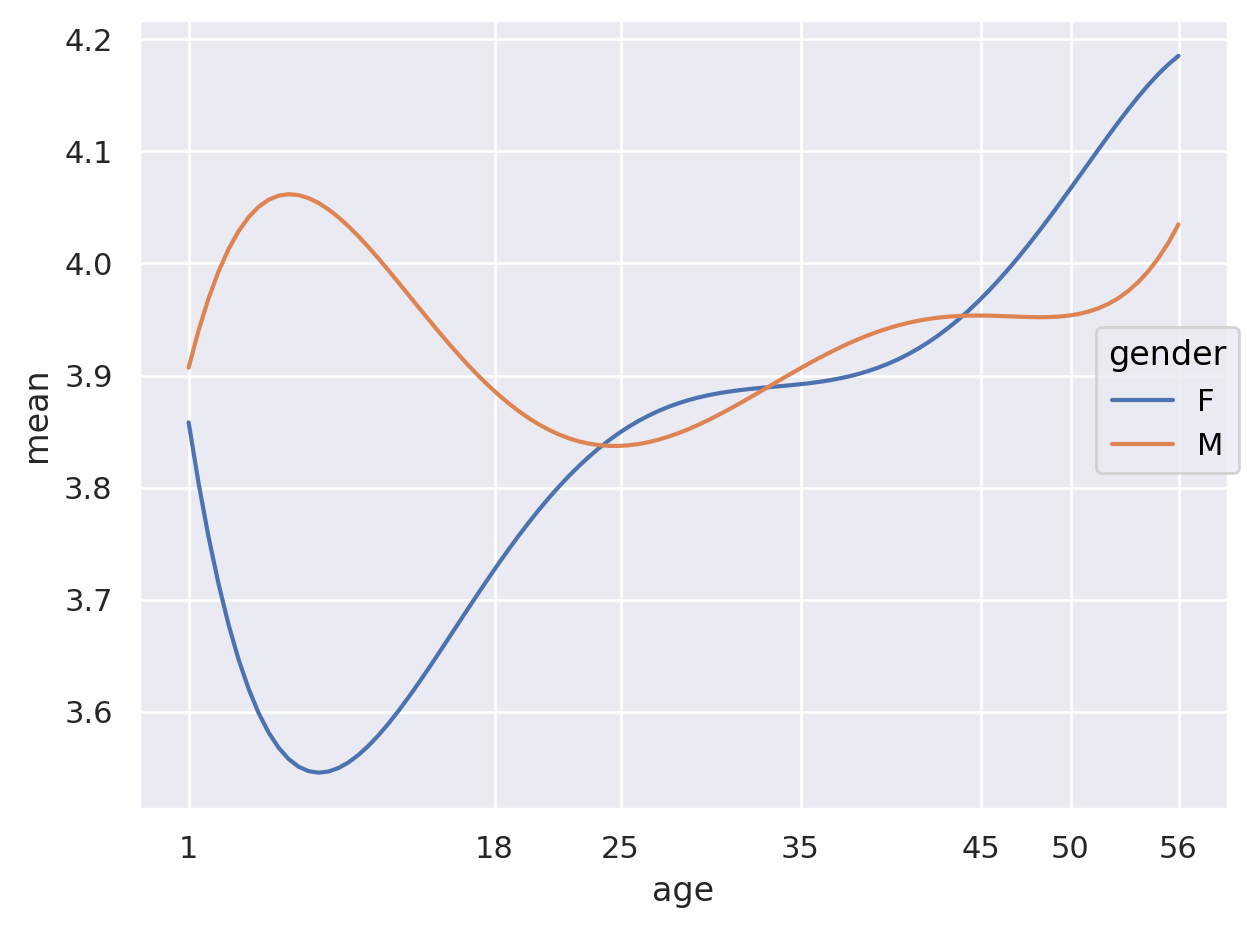

Musical


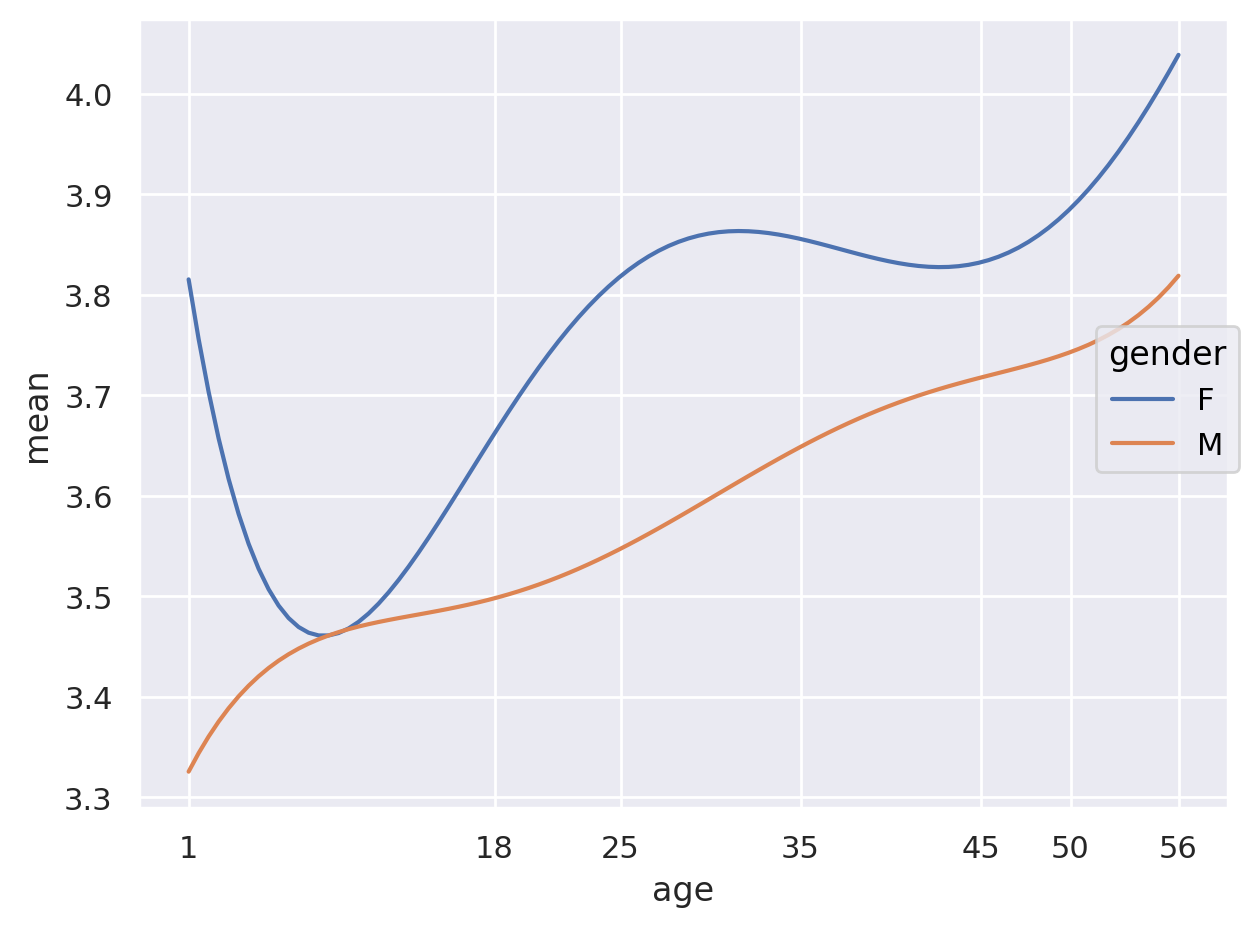

Mystery


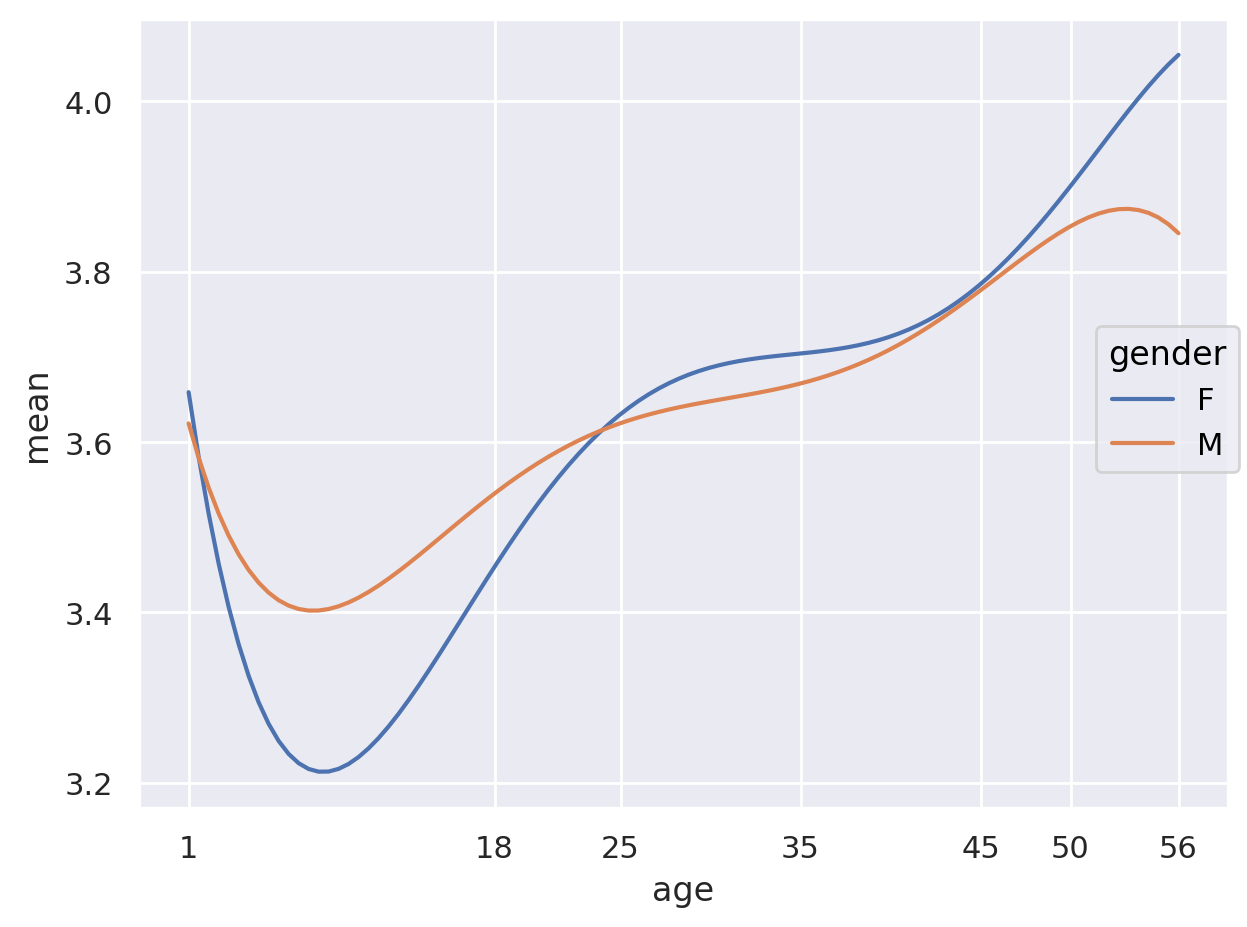

Film-Noir


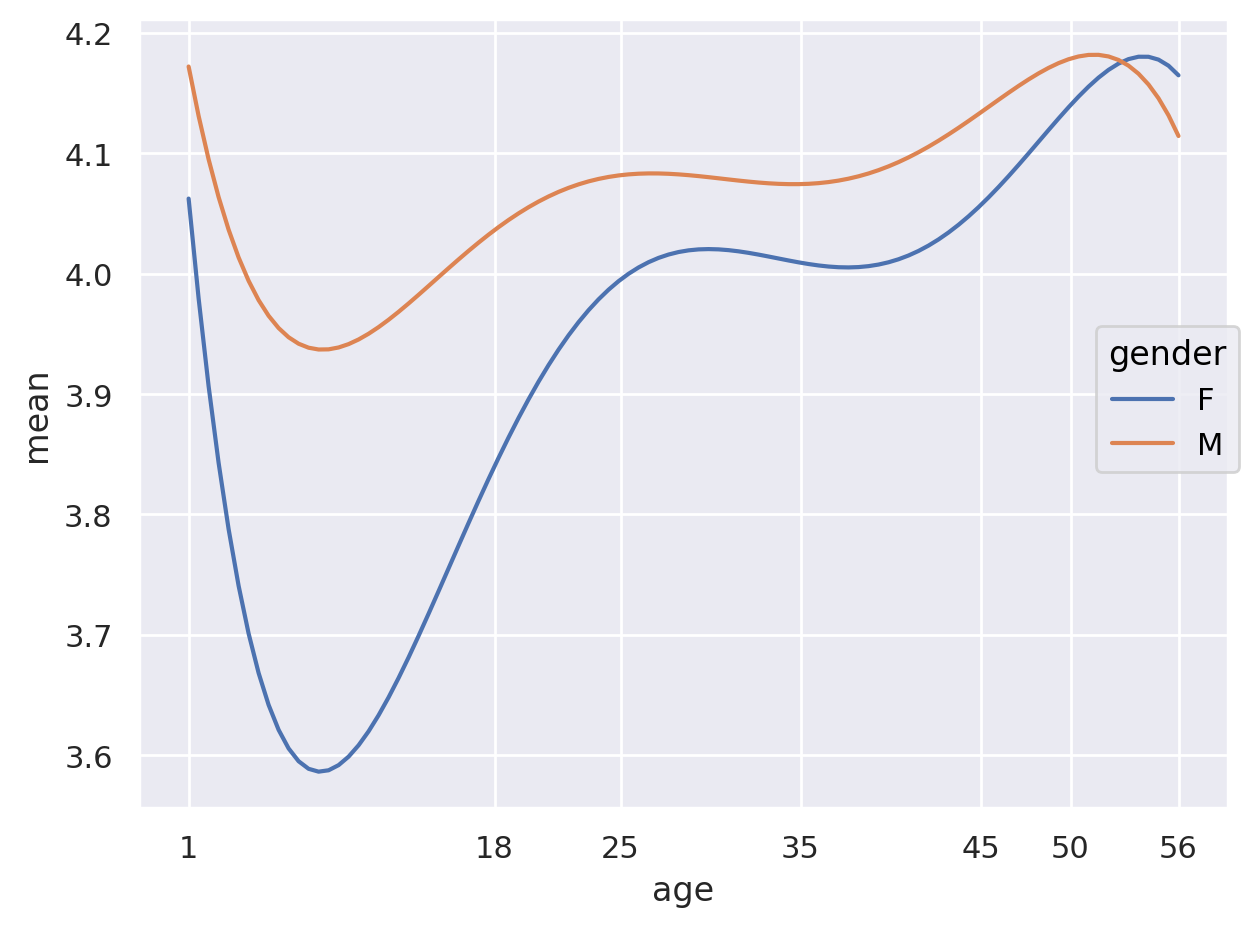

Western


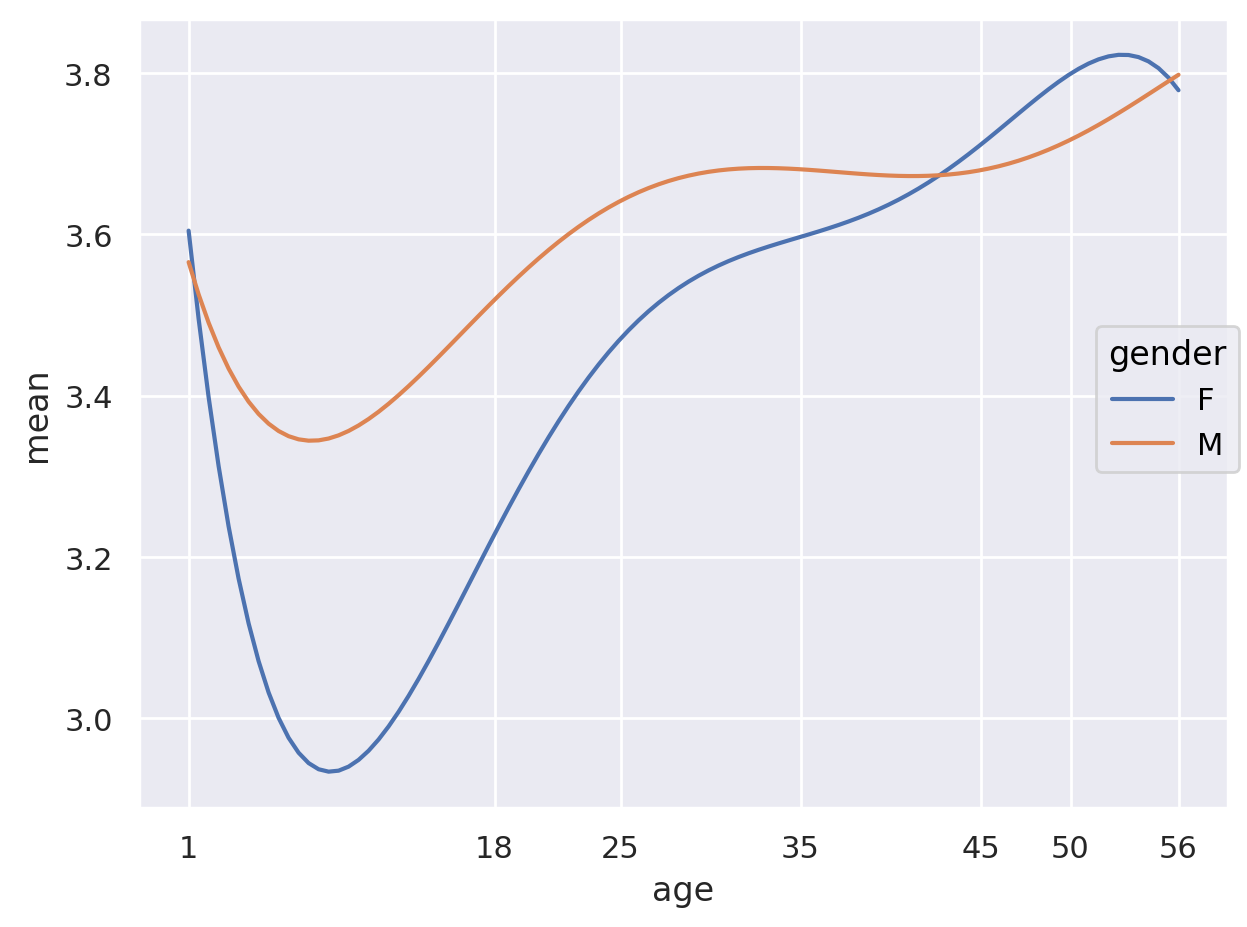

In [67]:
for genre in rating_all['genres'].unique():
    data = rating_all[rating_all['genres'] == genre]
    print(genre)
    (
         so.Plot(data, x="age", y="mean", color="gender")  # color mapping이 이후 모든 layer에 적용
        .add(so.Line(), so.PolyFit(5))
        .scale(x=so.Continuous().tick(at=[1, 18, 25, 35, 45, 50, 56]))
    ).show()

## 연습문제 11
### 영화 제목에 있는 출시년도를 추출해 이용하기 위해 다음 코드를 활용하세요.

In [39]:
movies["year"] = movies["title"].str.extract(r'\((\d{4})\)').astype("int")
movies

movie_id                    title                        genres  year
0            1         Toy Story (1995)   Animation|Children's|Comedy  1995
1            2           Jumanji (1995)  Adventure|Children's|Fantasy  1995
2            3  Grumpier Old Men (1995)                Comedy|Romance  1995
...        ...                      ...                           ...   ...
3880      3950         Tigerland (2000)                         Drama  2000
3881      3951  Two Family House (2000)                         Drama  2000
3882      3952    Contender, The (2000)                Drama|Thriller  2000

[3883 rows x 4 columns]

### 11.1
####  먼저 출시년도별로 얼마나 영화가 있는지 분포를 살펴보세요.

In [40]:
movies["year"].value_counts()

year
1996    345
1995    342
1998    337
       ... 
1922      2
1920      2
1921      1
Name: count, Length: 81, dtype: int64

### 11.2
#### 출시년도가 없는 영화가 있는가요?

In [41]:
movies['year'].isnull().sum()

0

### 11.3
#### 오래된 영화일수록 나이든 사람들의 시청 비율이 높을지에 대해 분포를 살펴보세요.
#### 나이를 다음과 같이 (pandas) category type으로 변환하여 분석합니다.
#### .assign(age = lambda x: pd.Categorical(x.age.astype("string"), categories=["1", "18", "25", "35", "45", "50", "56"], ordered=True))
#### 나이를 row에 facet하는 방식으로 분포를 살펴보세요.

In [42]:
user_rating = users.merge(ratings, on="user_id")
user_rating = user_rating.merge(movies, on="movie_id")
user_rating

user_id gender  age  occupation    zip  movie_id  rating  timestamp  \
0              1      F    1          10  48067      1193       5  978300760   
1              2      M   56          16  70072      1193       5  978298413   
2             12      M   25          12  32793      1193       4  978220179   
...          ...    ...  ...         ...    ...       ...     ...        ...   
1000206     5780      M   18          17  92886      2845       1  958153068   
1000207     5851      F   18          20  55410      3607       5  957756608   
1000208     5938      M   25           1  35401      2909       4  957273353   

                                               title                genres  \
0             One Flew Over the Cuckoo's Nest (1975)                 Drama   
1             One Flew Over the Cuckoo's Nest (1975)                 Drama   
2             One Flew Over the Cuckoo's Nest (1975)                 Drama   
...                                              ...                   ...   
1000206                            White Boys (1999)                 Drama   
1000207                     One Little Indian (1973)  Comedy|Drama|Western   
1000208  Five Wives, Three Secretaries and Me (1998)           Documentary   

         year  
0        1975  
1        1975  
2        1975  
...       ...  
1000206  1999  
1000207  1973  
1000208  1998  

[1000209 rows x 11 columns]

In [43]:
ratio_age = user_rating.assign(age = lambda x: pd.Categorical(x.age.astype("string"), categories=["1", "18", "25", "35", "45", "50", "56"], ordered=True))\
.groupby(["age", "year"]).agg(count=('rating', 'count')).reset_index()\
.assign(ratio=lambda x: x['count'] / x.groupby('year')['count'].transform('sum'))
ratio_age

age  year  count  ratio
0     1  1919      0   0.00
1     1  1920      0   0.00
2     1  1921      3   0.05
..   ..   ...    ...    ...
564  56  1998   2143   0.03
565  56  1999   2923   0.03
566  56  2000   1328   0.03

[567 rows x 4 columns]

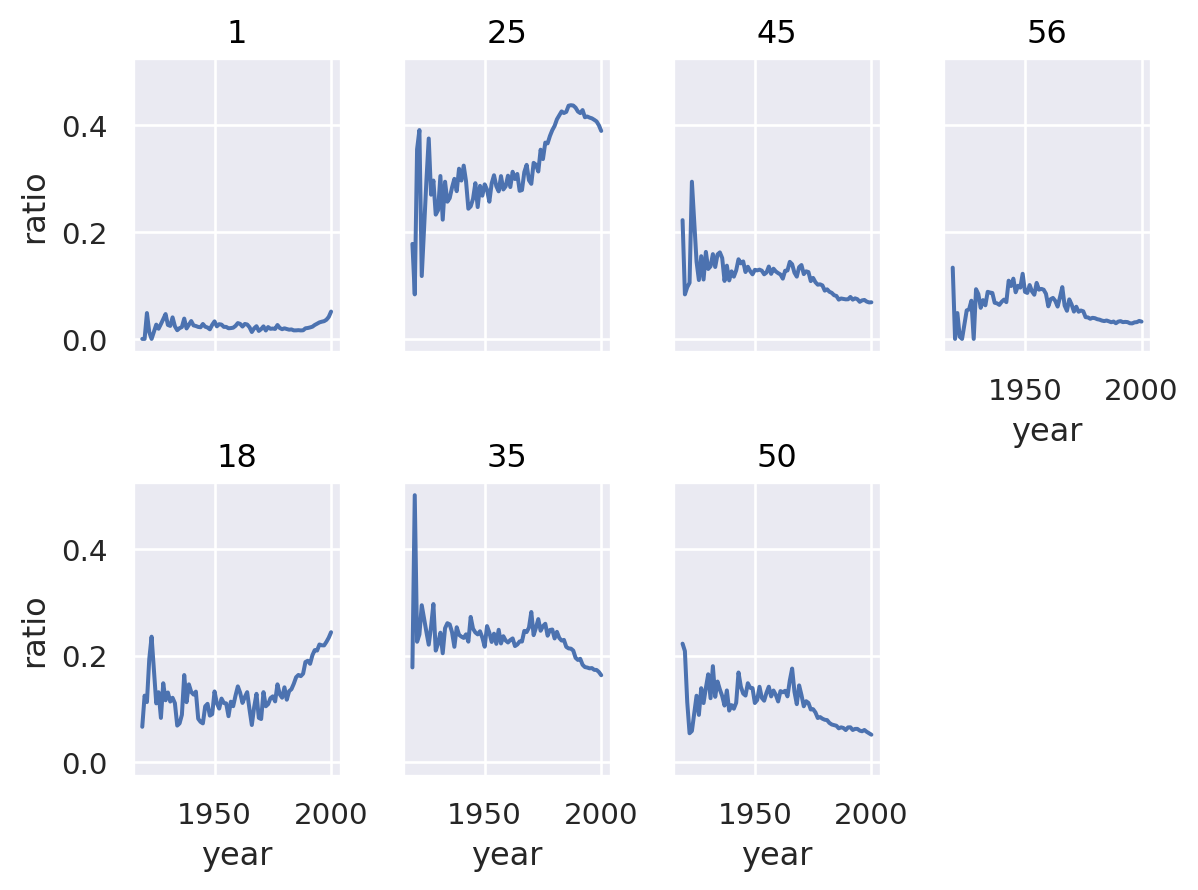

In [44]:
(
    so.Plot(ratio_age, x="year", y="ratio")
    .add(so.Line())
    .facet(row="age", wrap=2)
)


1


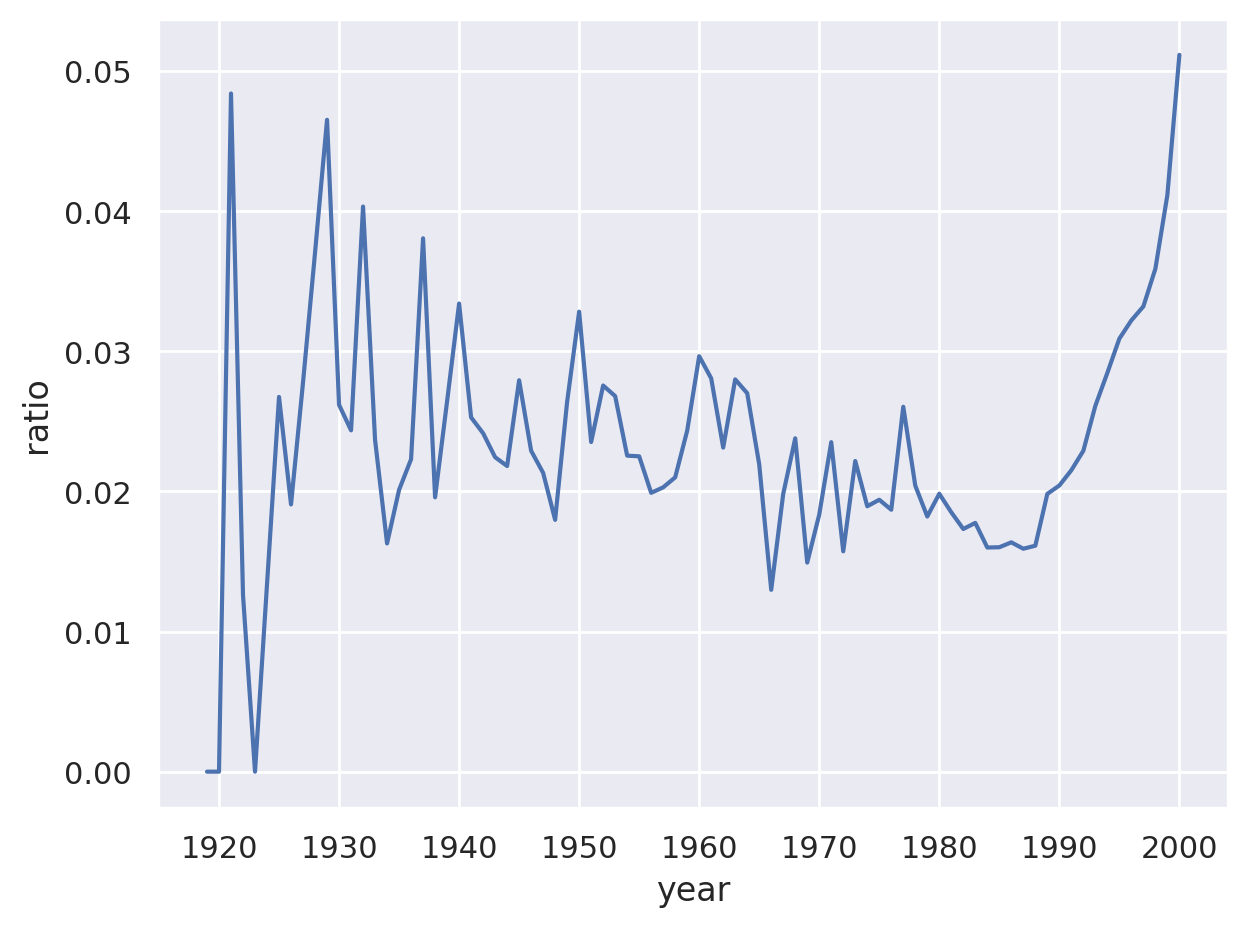

18


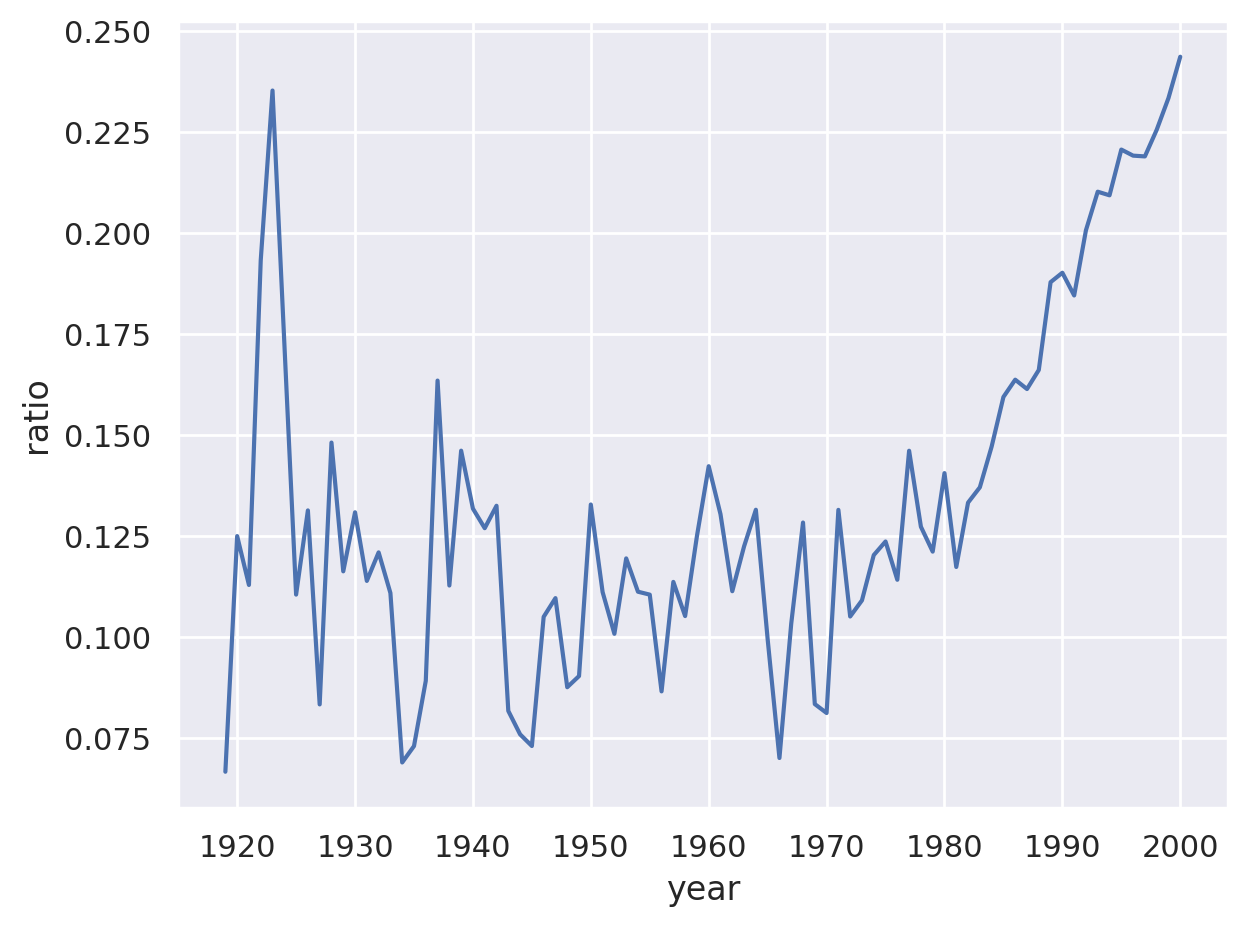

25


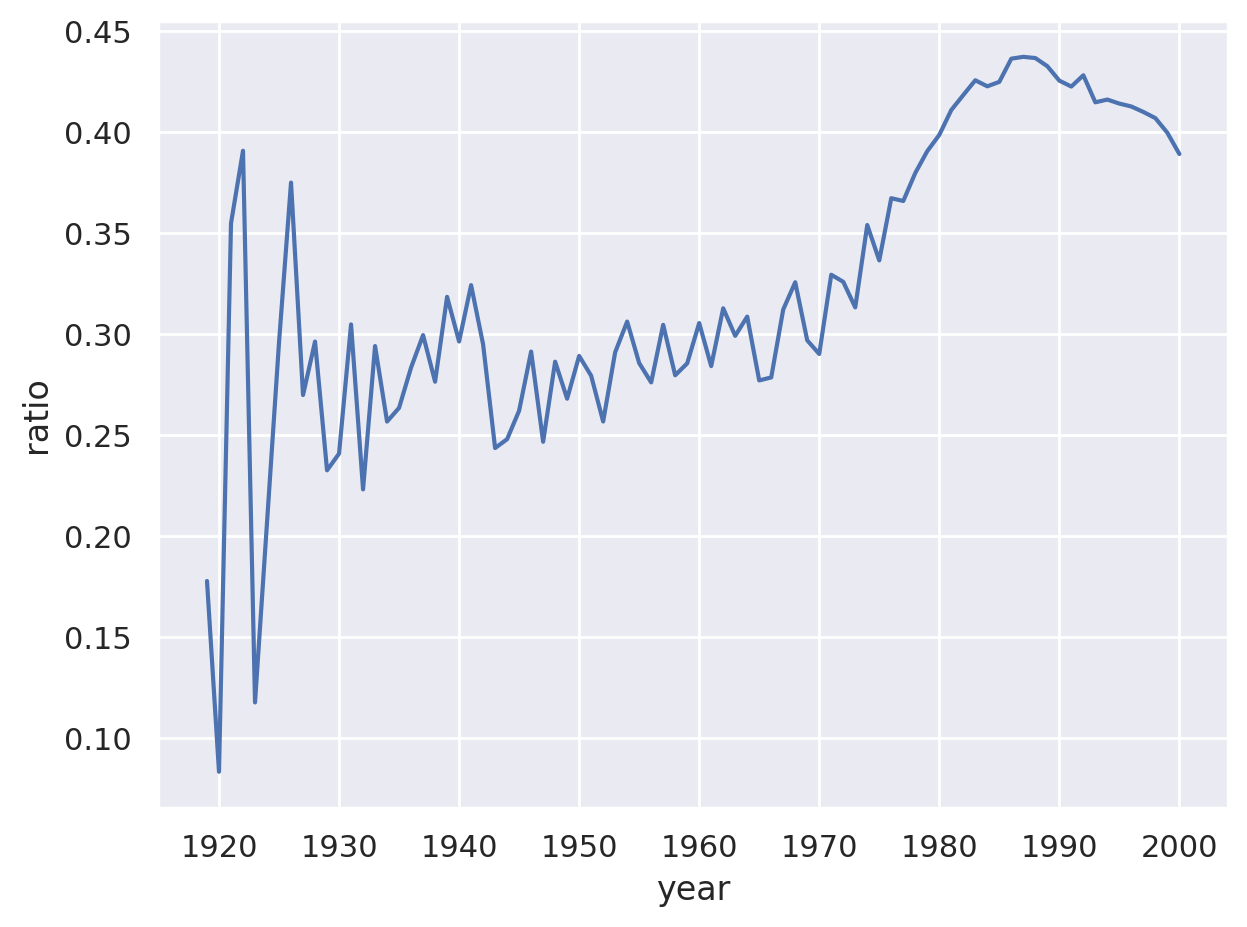

35


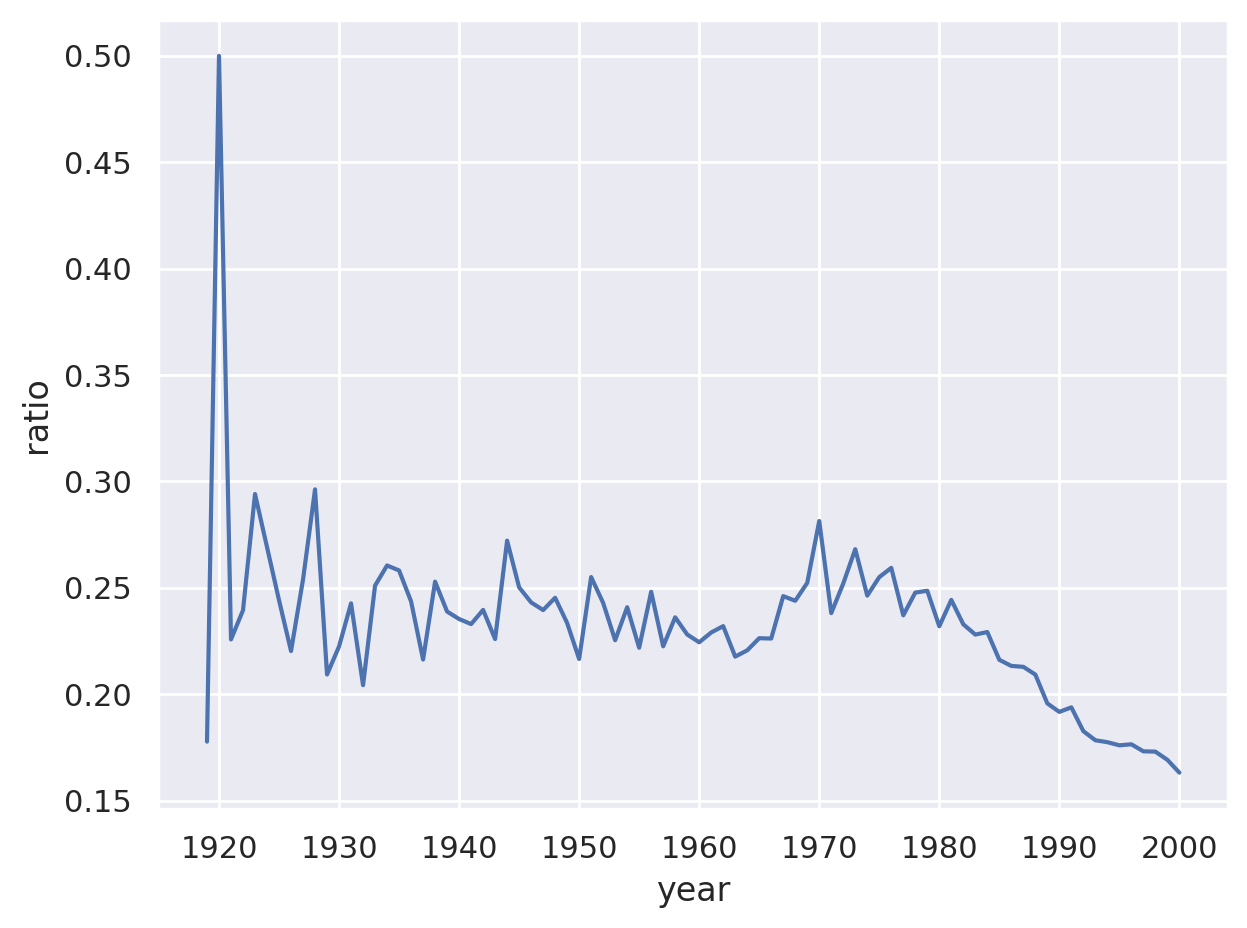

45


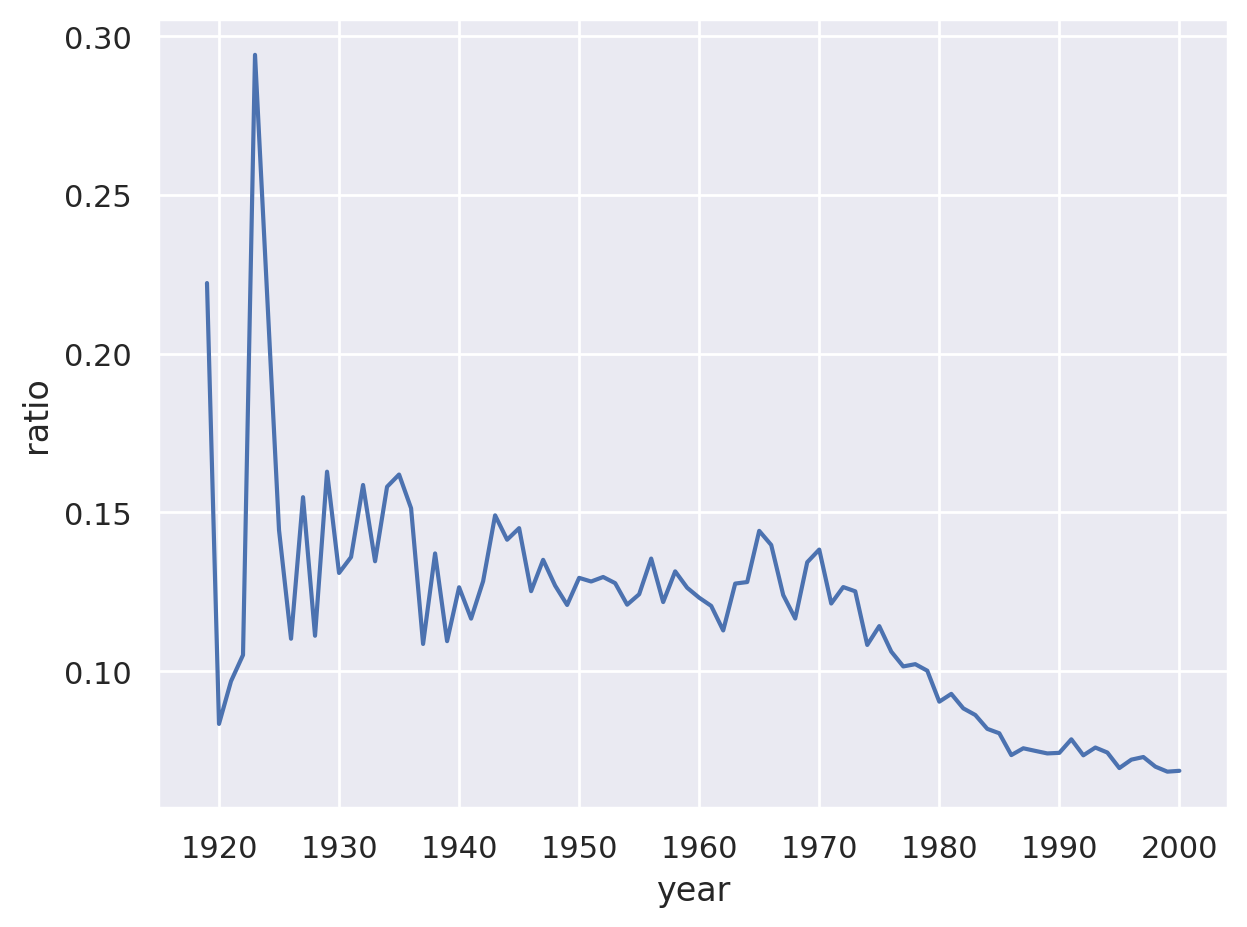

50


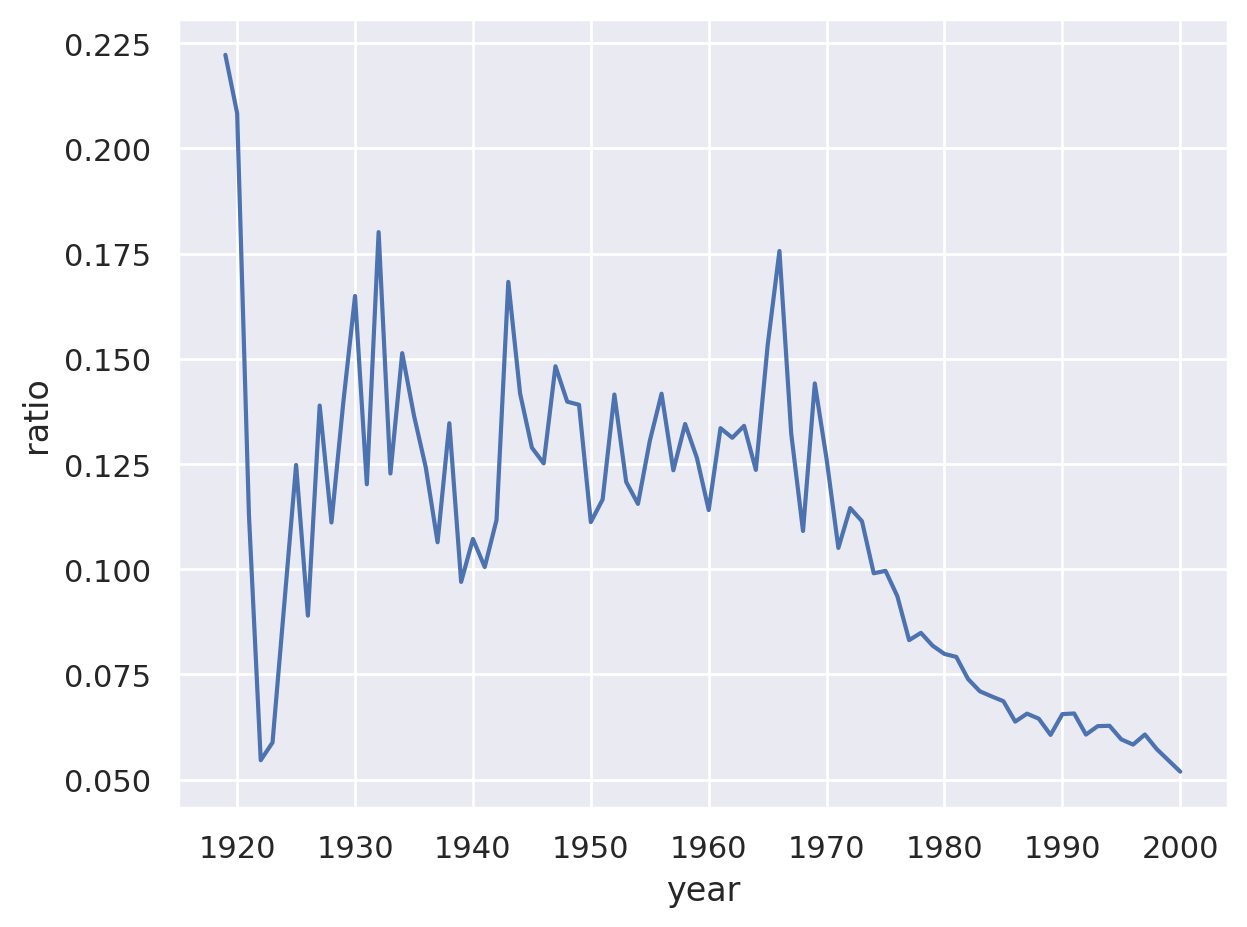

56


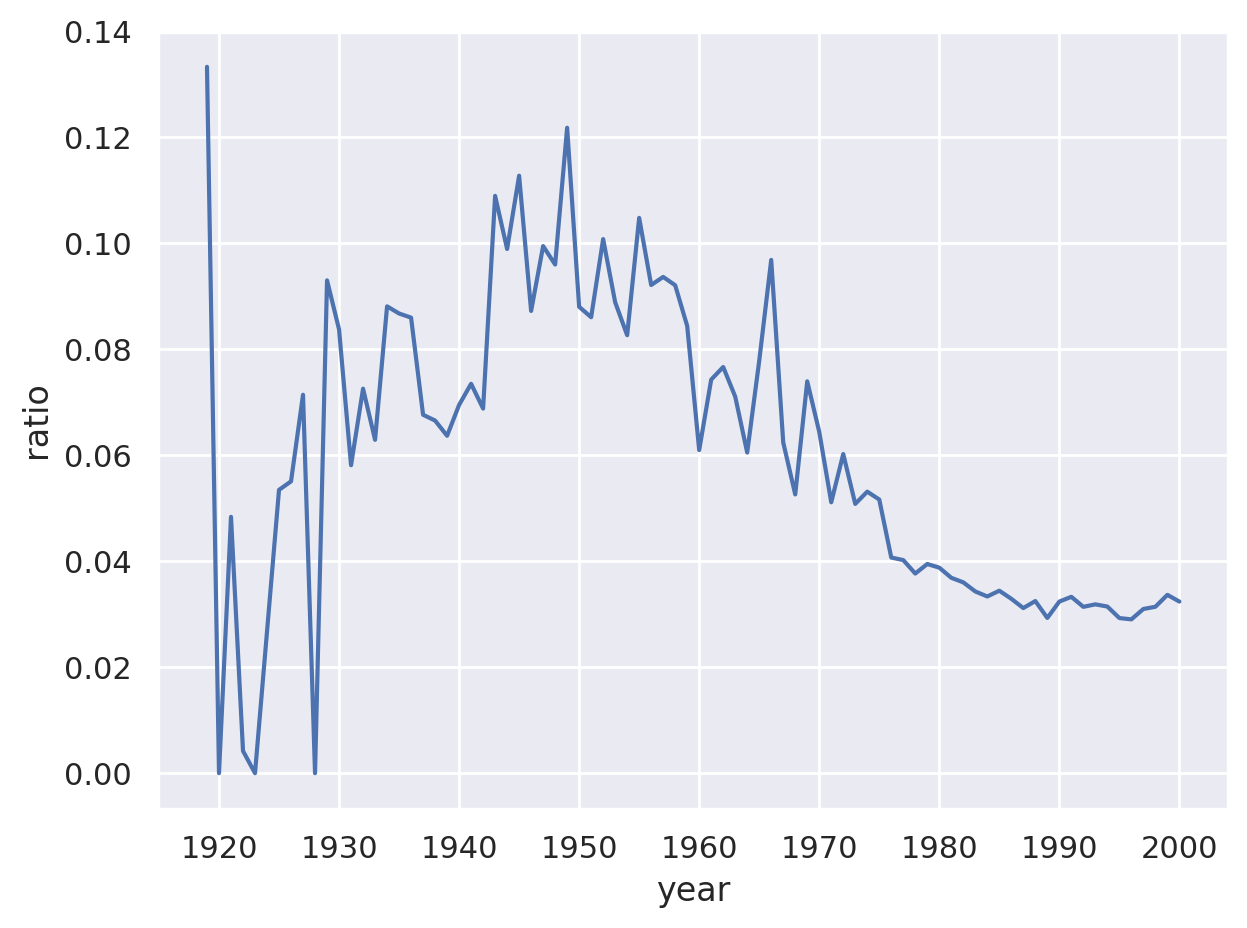

In [70]:
for age in ratio_age['age'].unique():
    data = ratio_age[ratio_age['age'] == age]
    print(age)
    (
         so.Plot(data, x="year", y="ratio")  # color mapping이 이후 모든 layer에 적용
        .add(so.Line())
    ).show()

## 연습문제 12
### 10년 기준으로 년대를 정했을 때, 년대에 따라 장르들의 비율이 어떻게 변화했는지 살펴봅니다.
### 예를 들어, 코메디 장르의 경우 아래 플랏처럼 1920년대에 다른 장르에 비해 상대적으로 높은 비율을 보이다가 1950년대까지는 쭉 낮아지다 다시 증가하는 비율을 보입니다.
### 장르별로 facet을 하여 모든 장르들의 비율 변화를 그려보세요.
### 우선 년대를 다음 방식으로 만든 후, 예를 들어, 1990-1999년은 1990이 되도록 한 후
### movies.assign(decade = lambda x: x.year // 10 * 10 )
### decade와 genres에 대해 pd.crosstab()을 적용하여 비율에 대한 테이블을 만든 후 stack()을 적용하여 long foramt으로 바꾼 후 그려보세요.
### pd.crosstab()의 파라미터를 확인해서 비율을 구하세요.


In [45]:
movies_long = movies.assign(
    decade = lambda x: x.year // 10 * 10  # // 나눗셈의 몫
)
movies_long

movie_id                    title                        genres  year  \
0            1         Toy Story (1995)   Animation|Children's|Comedy  1995   
1            2           Jumanji (1995)  Adventure|Children's|Fantasy  1995   
2            3  Grumpier Old Men (1995)                Comedy|Romance  1995   
...        ...                      ...                           ...   ...   
3880      3950         Tigerland (2000)                         Drama  2000   
3881      3951  Two Family House (2000)                         Drama  2000   
3882      3952    Contender, The (2000)                Drama|Thriller  2000   

      decade  
0       1990  
1       1990  
2       1990  
...      ...  
3880    2000  
3881    2000  
3882    2000  

[3883 rows x 5 columns]

In [46]:
movies_long["genres"] = movies_long["genres"].str.split("|")
movies_long = movies_long.explode("genres")
movies_long

movie_id                    title      genres  year  decade
0            1         Toy Story (1995)   Animation  1995    1990
0            1         Toy Story (1995)  Children's  1995    1990
0            1         Toy Story (1995)      Comedy  1995    1990
...        ...                      ...         ...   ...     ...
3881      3951  Two Family House (2000)       Drama  2000    2000
3882      3952    Contender, The (2000)       Drama  2000    2000
3882      3952    Contender, The (2000)    Thriller  2000    2000

[6408 rows x 5 columns]

In [47]:
# 장르와 연도에 대한 비율 계산
decade_genre_ratio = pd.crosstab(movies_long['decade'], movies_long['genres'], normalize='index').stack().reset_index(name='ratio')
decade_genre_ratio

decade     genres  ratio
0      1910     Action   0.20
1      1910  Adventure   0.20
2      1910  Animation   0.00
..      ...        ...    ...
177    2000   Thriller   0.10
178    2000        War   0.01
179    2000    Western   0.00

[180 rows x 3 columns]

Action


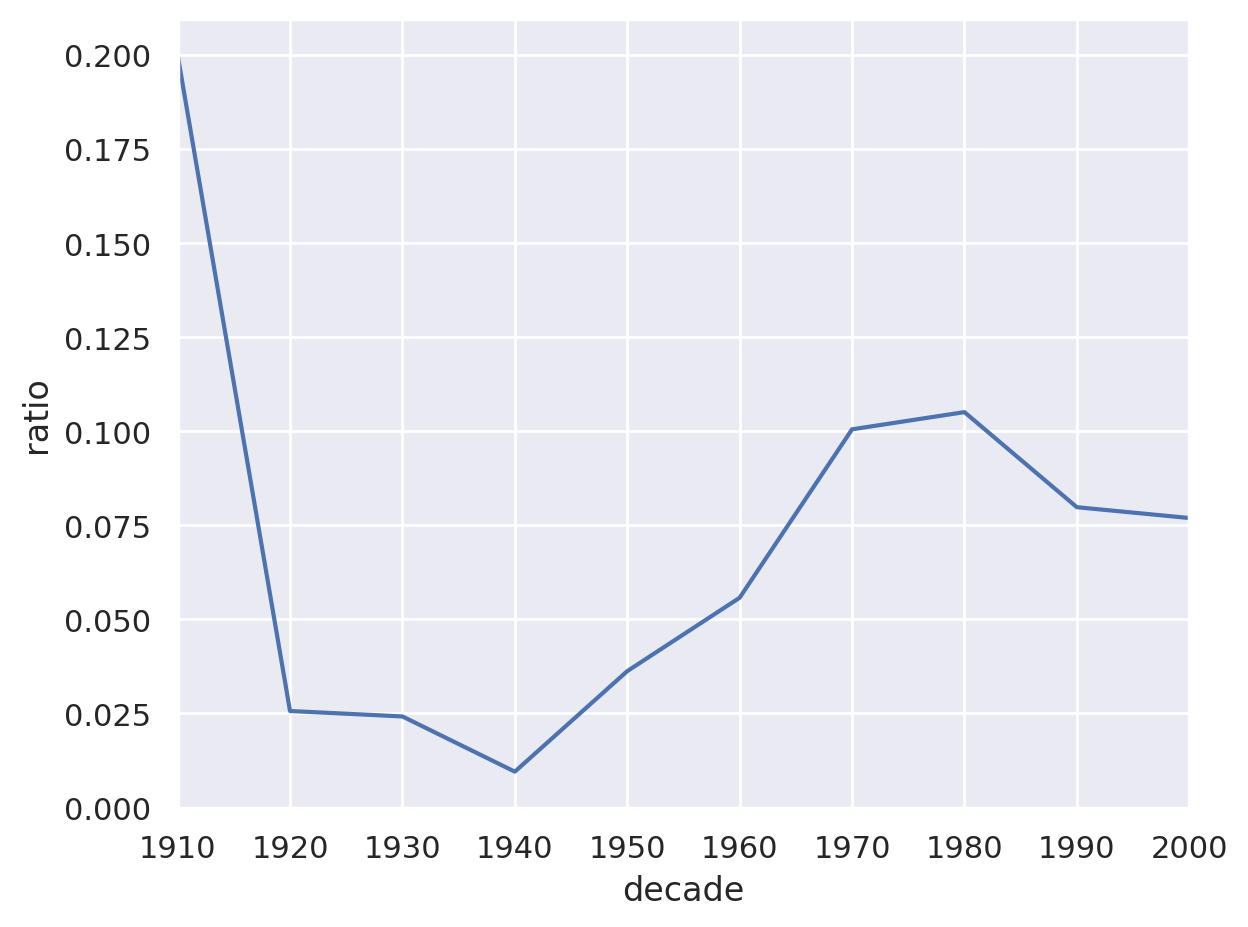

Adventure


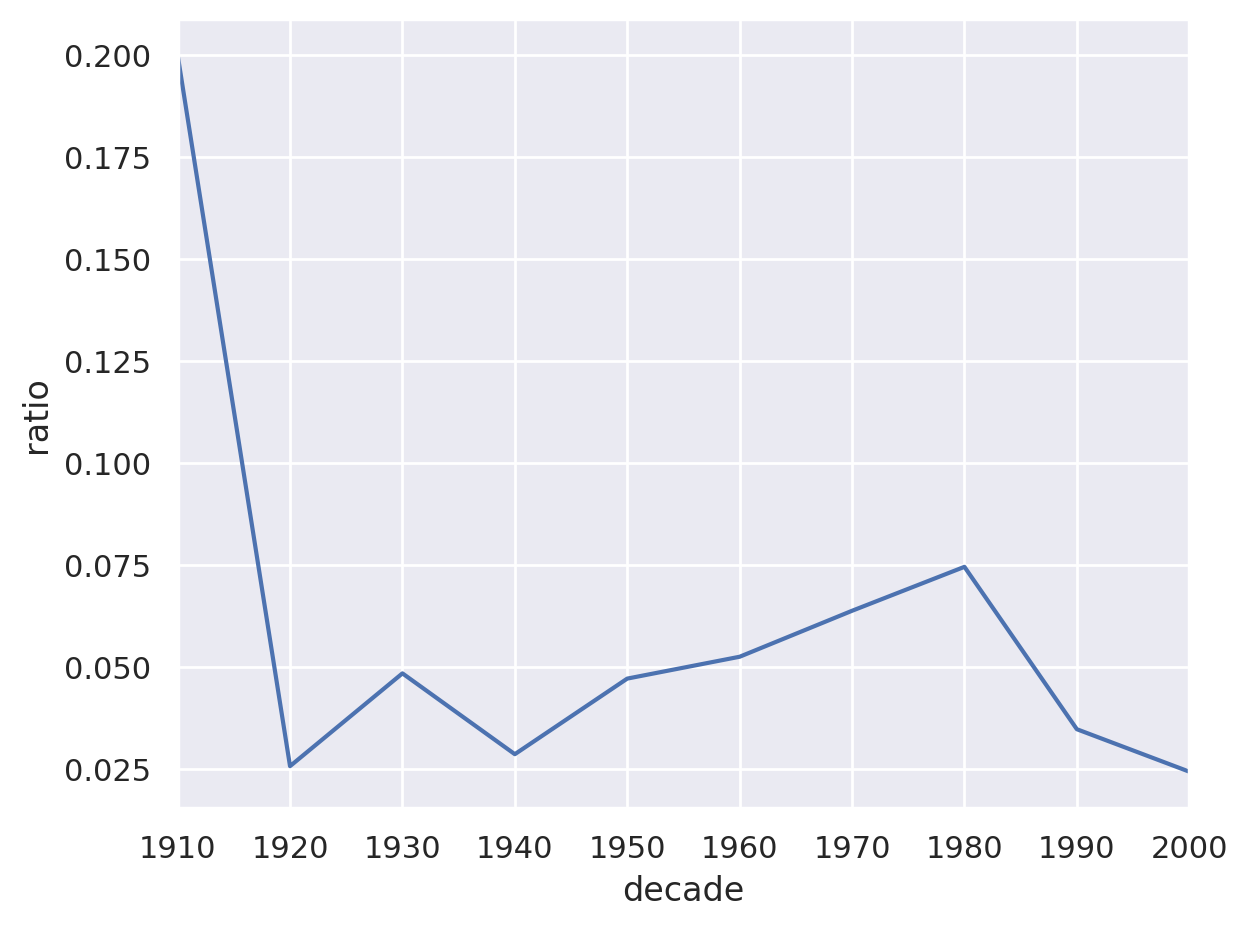

Animation


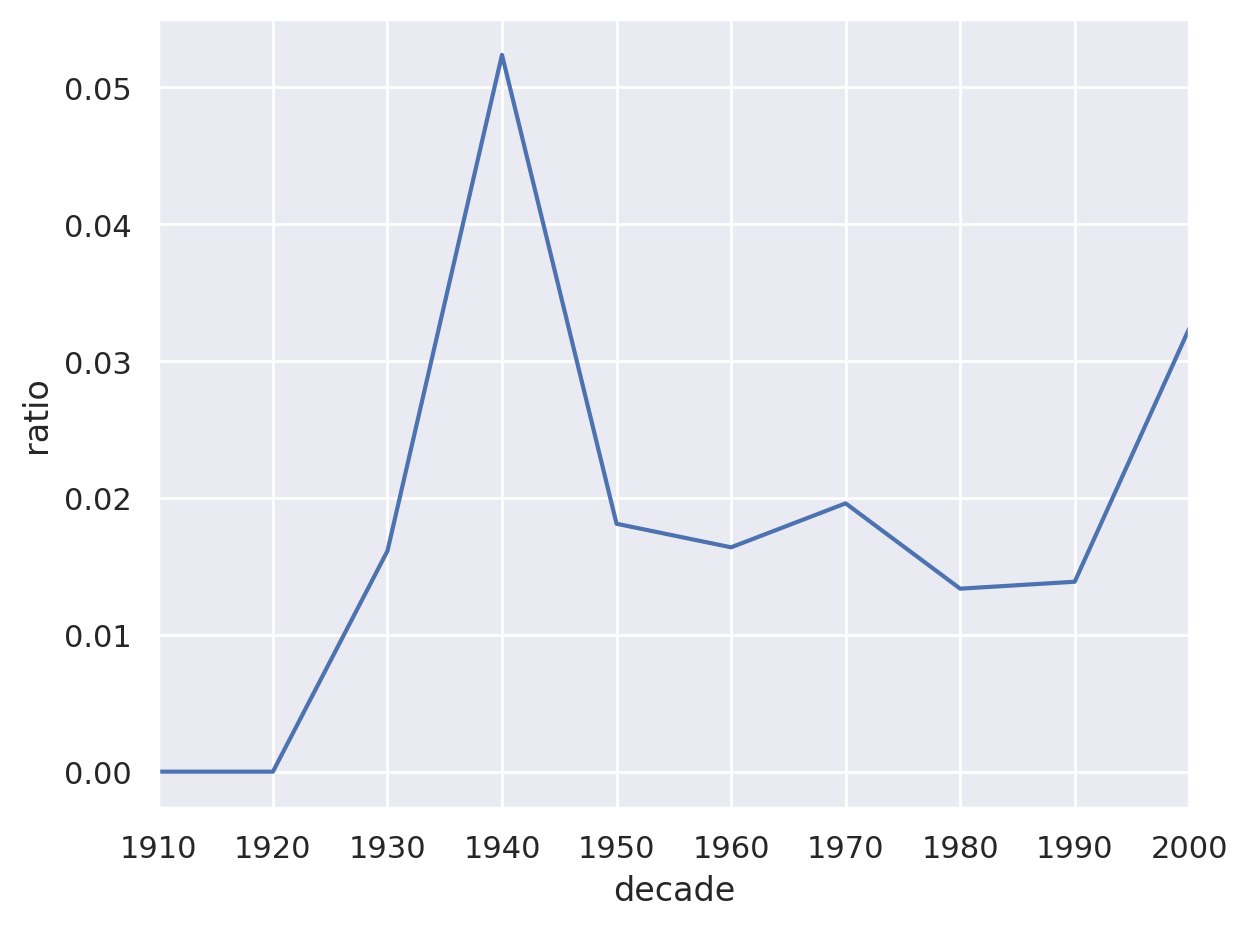

Children's


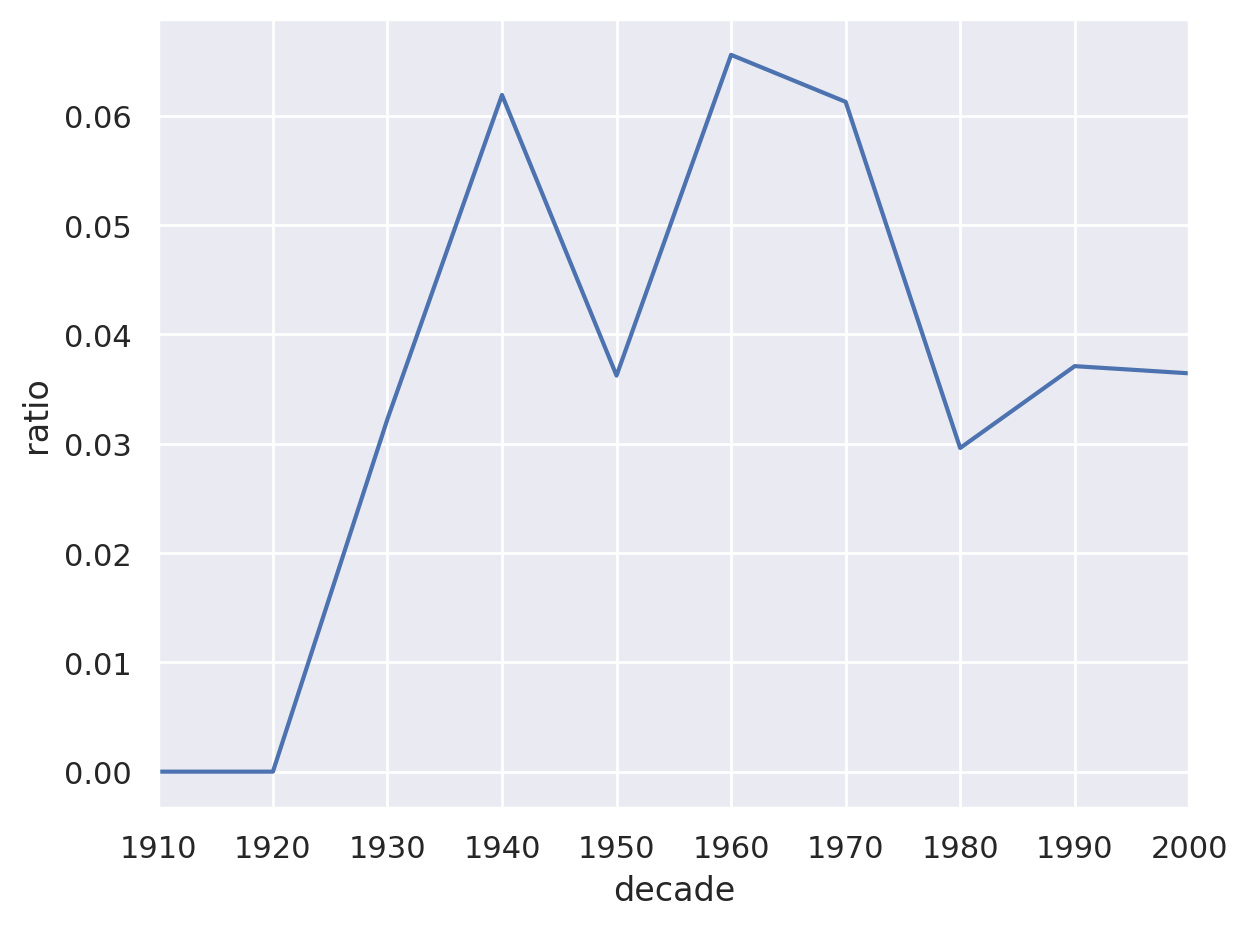

Comedy


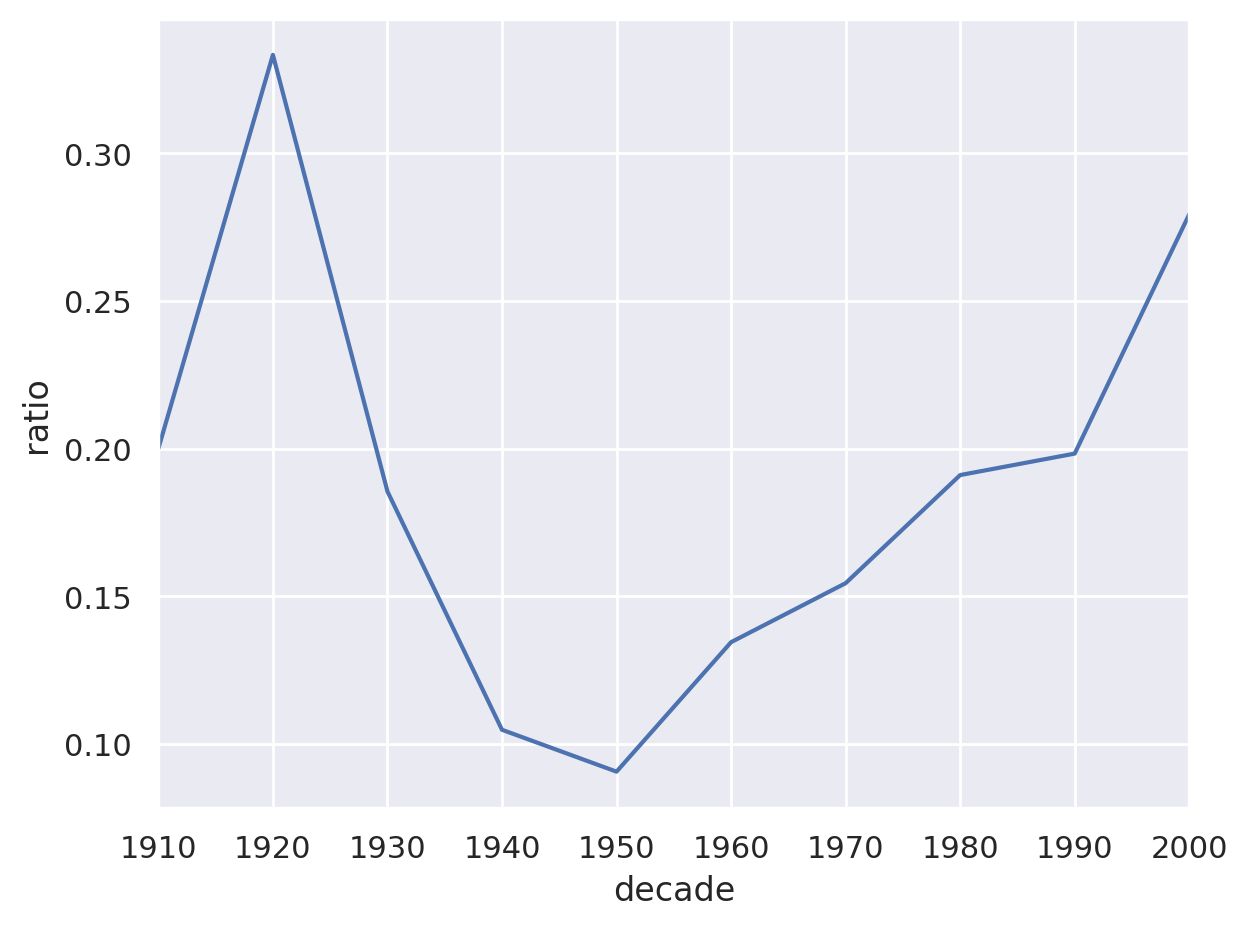

Crime


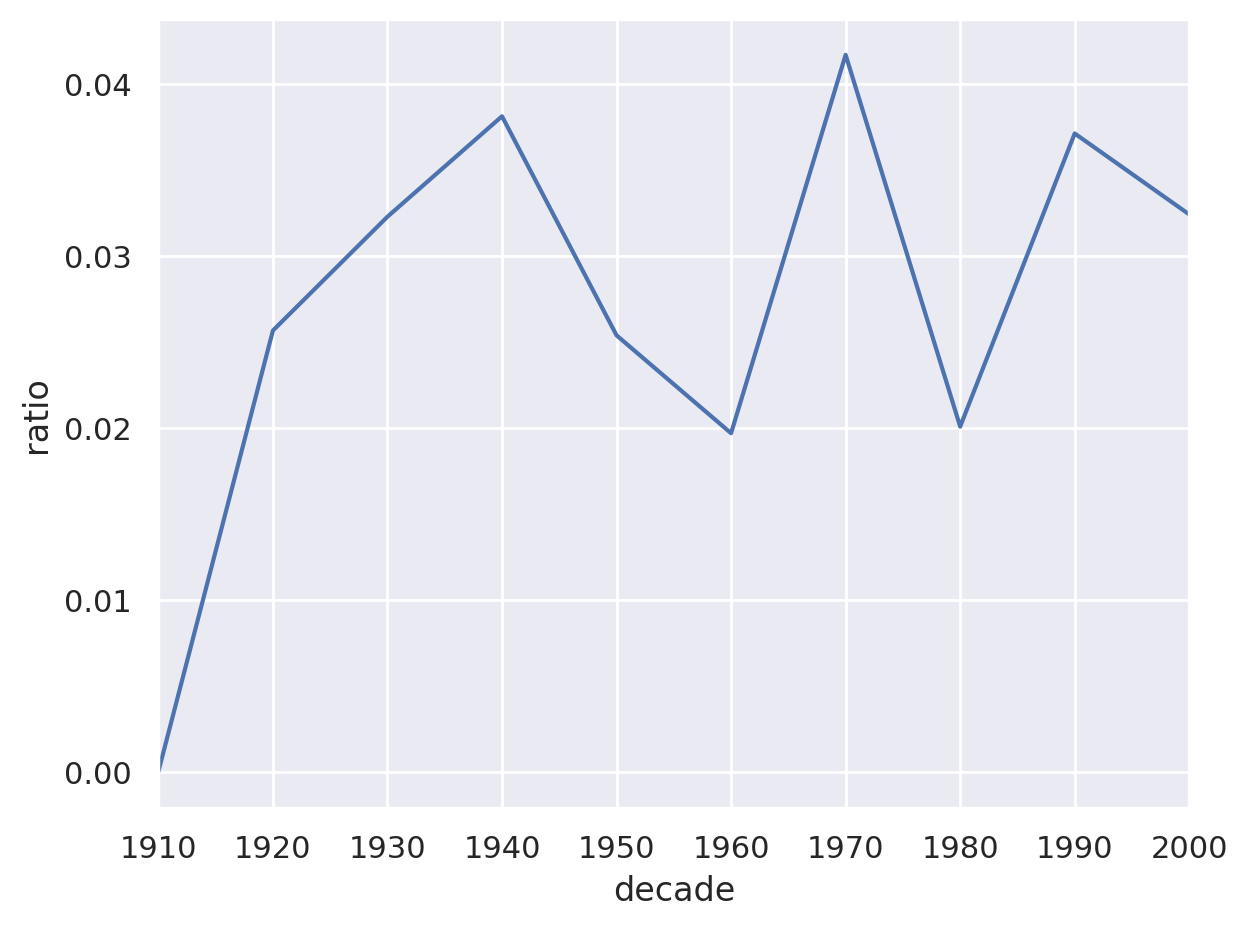

Documentary


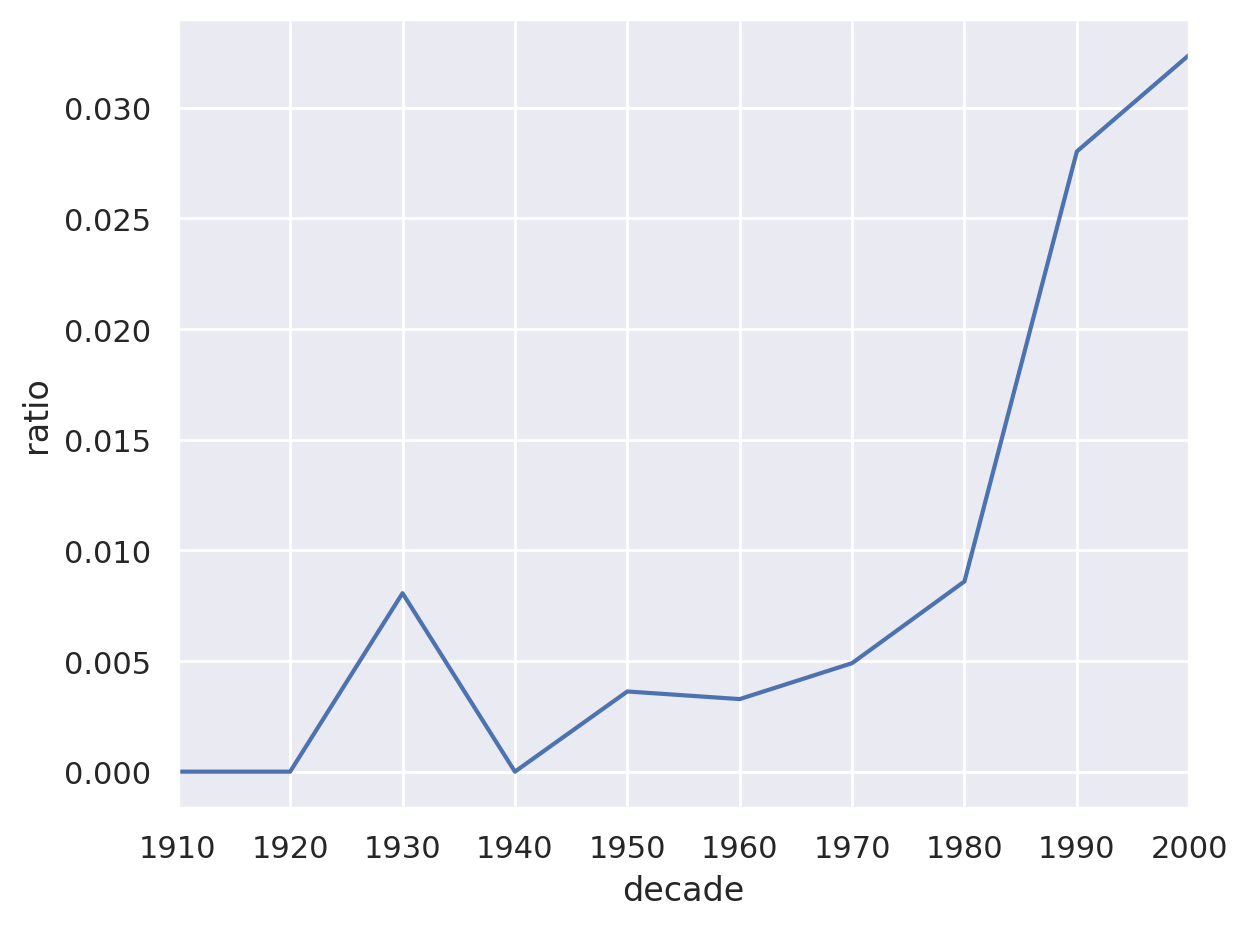

Drama


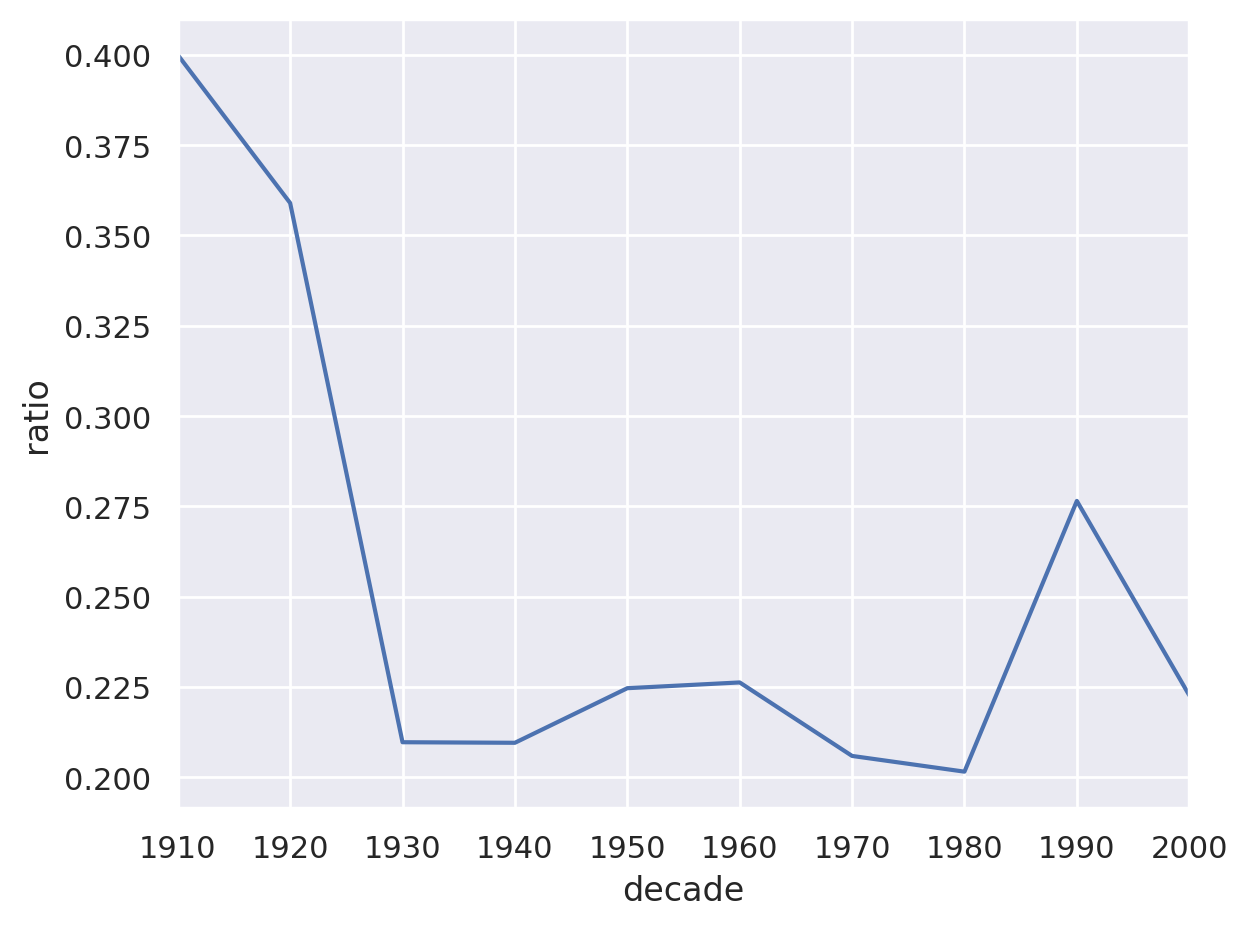

Fantasy


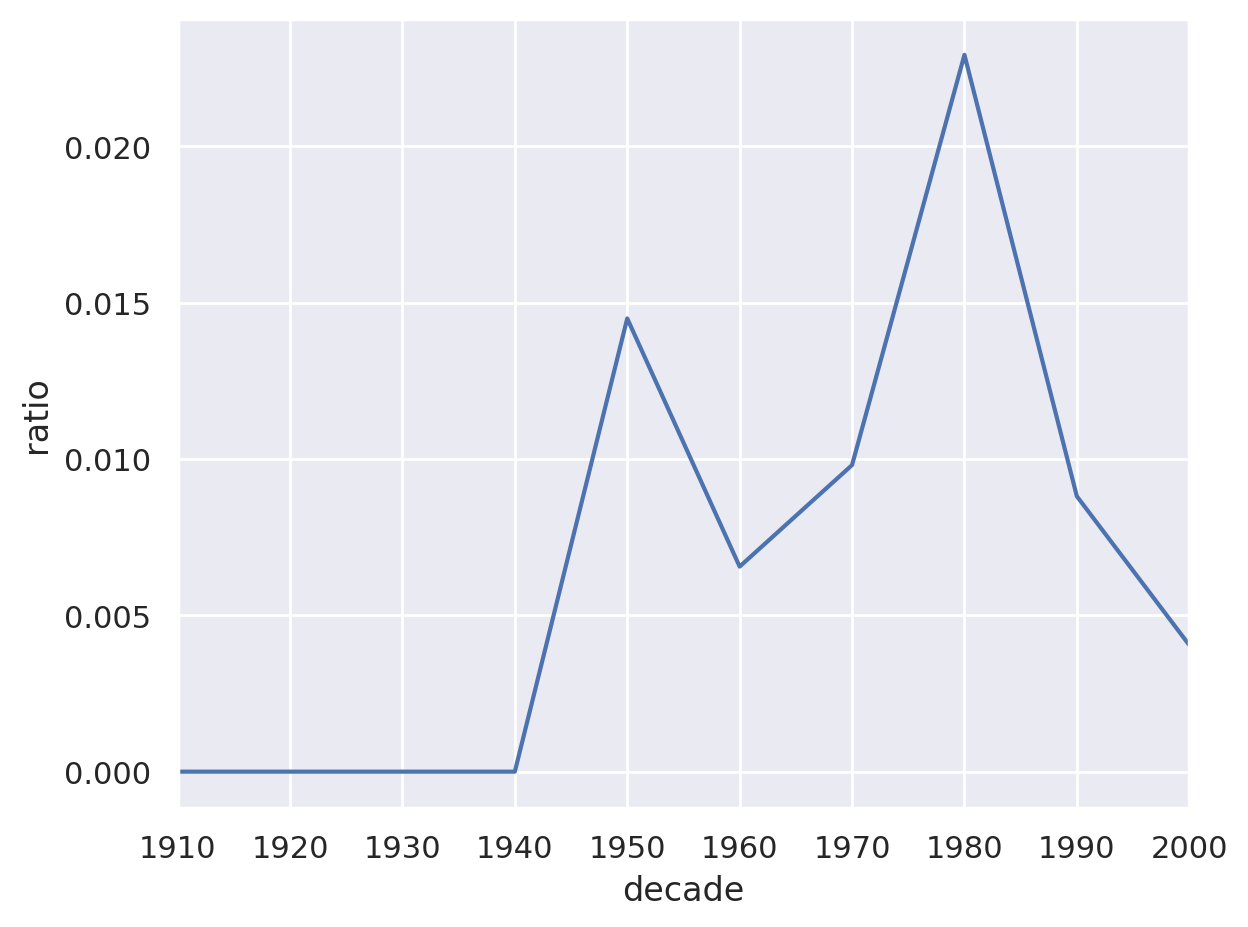

Film-Noir


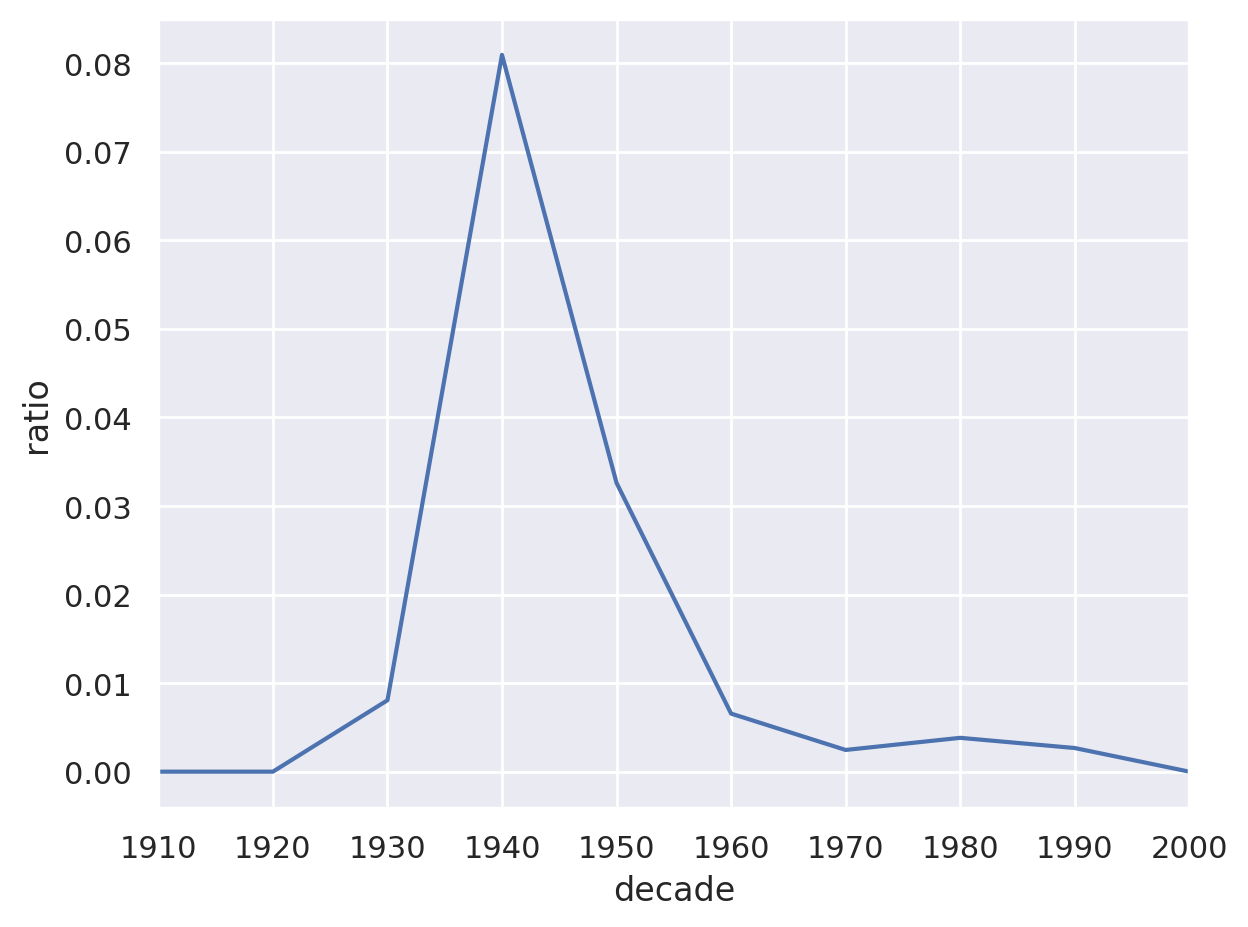

Horror


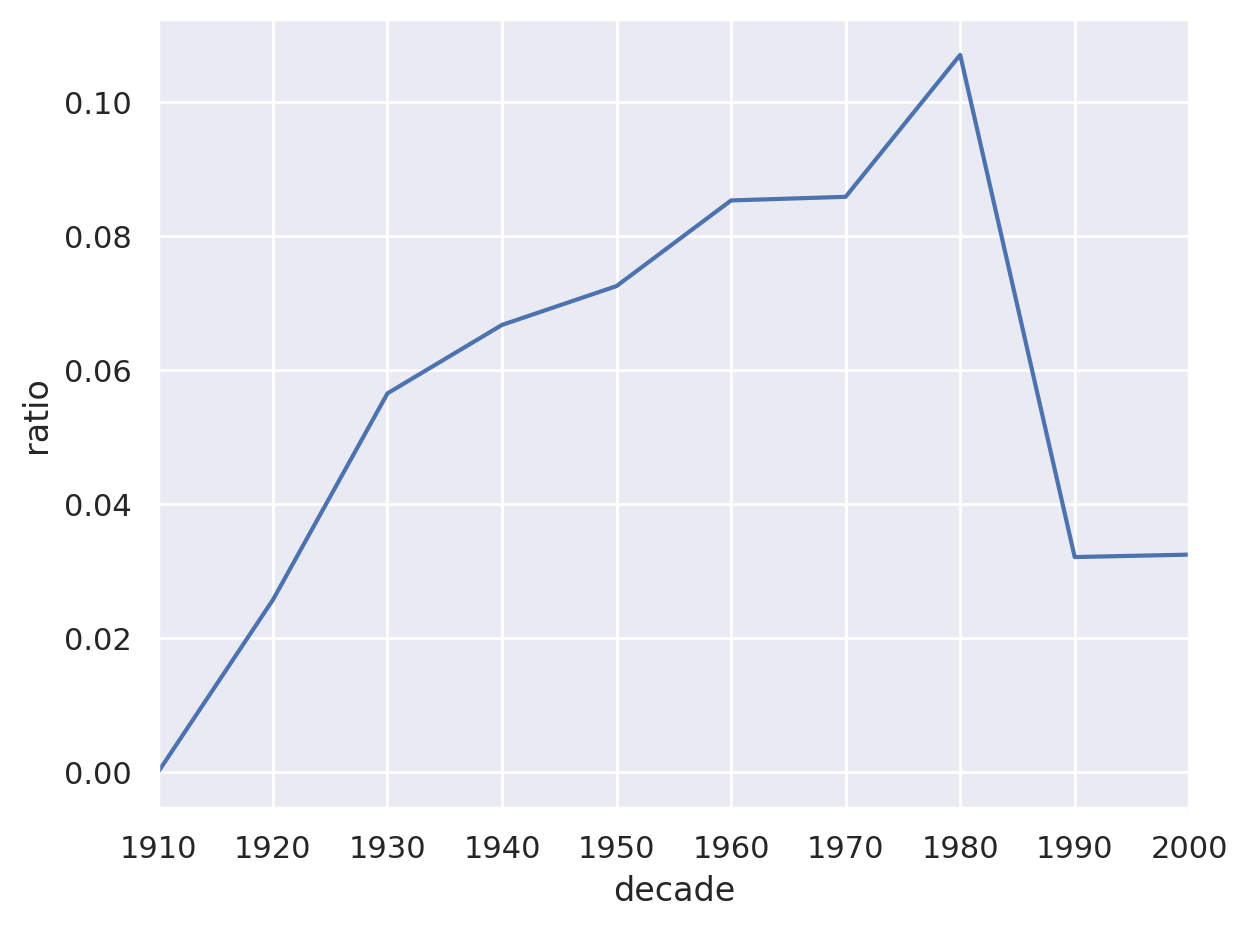

Musical


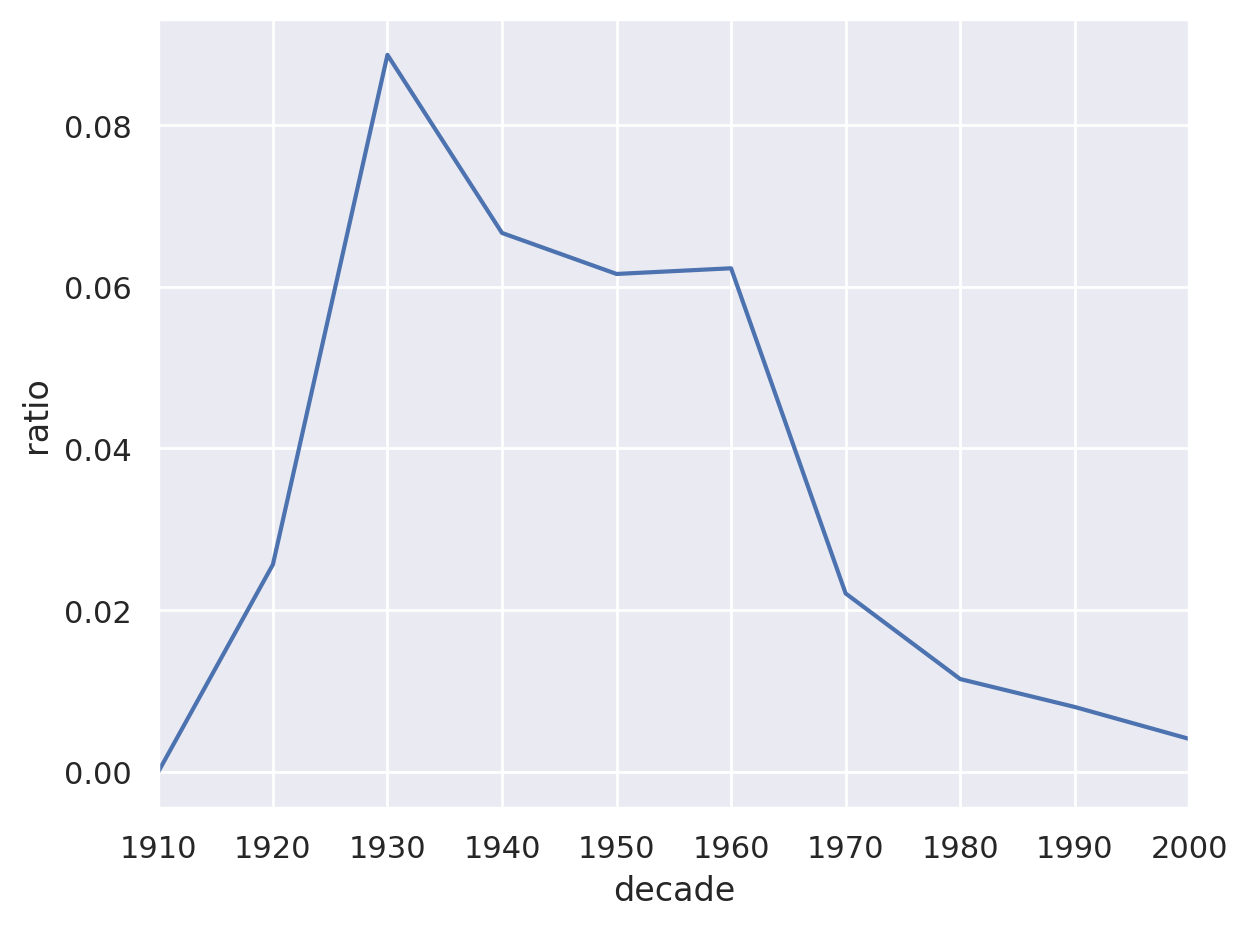

Mystery


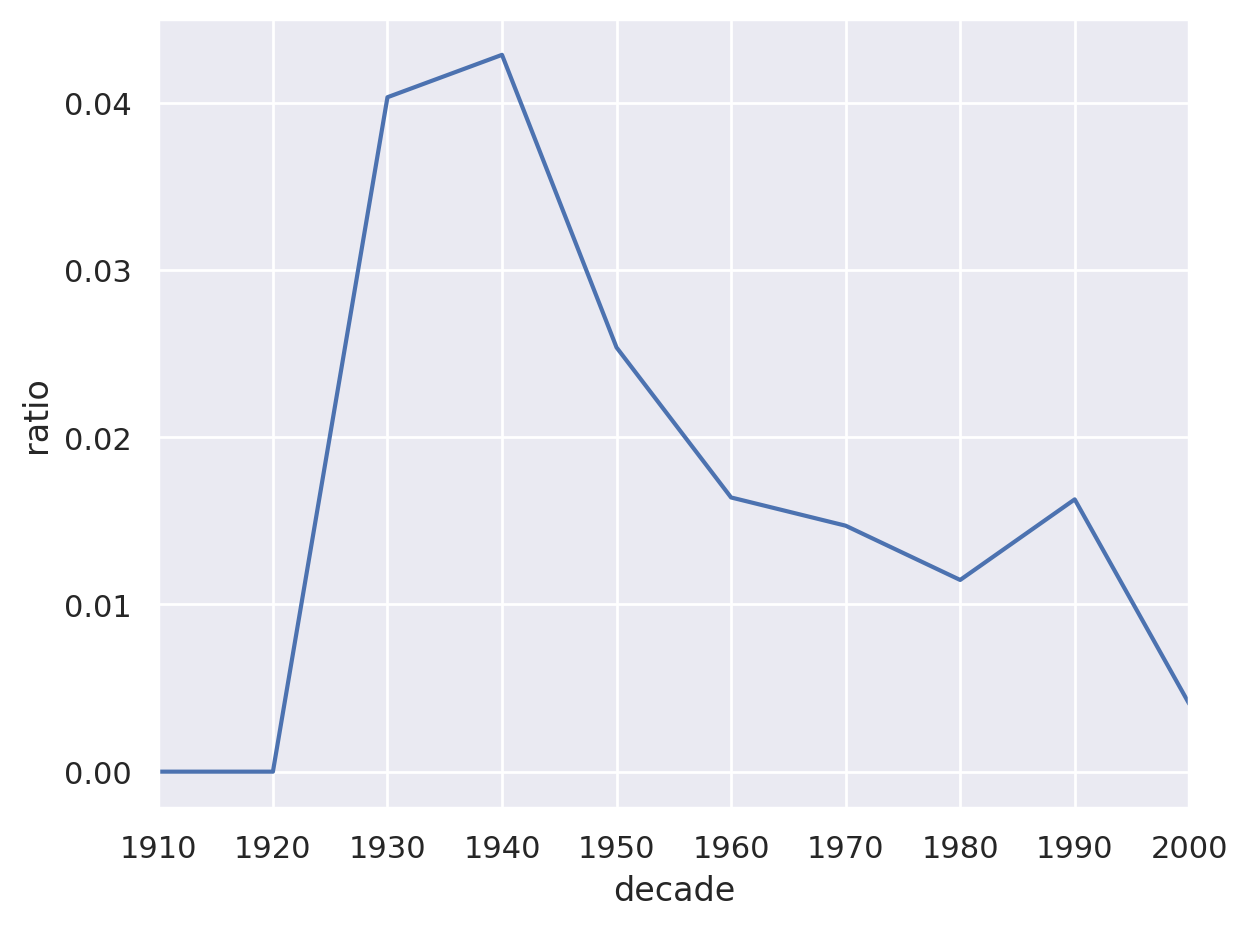

Romance


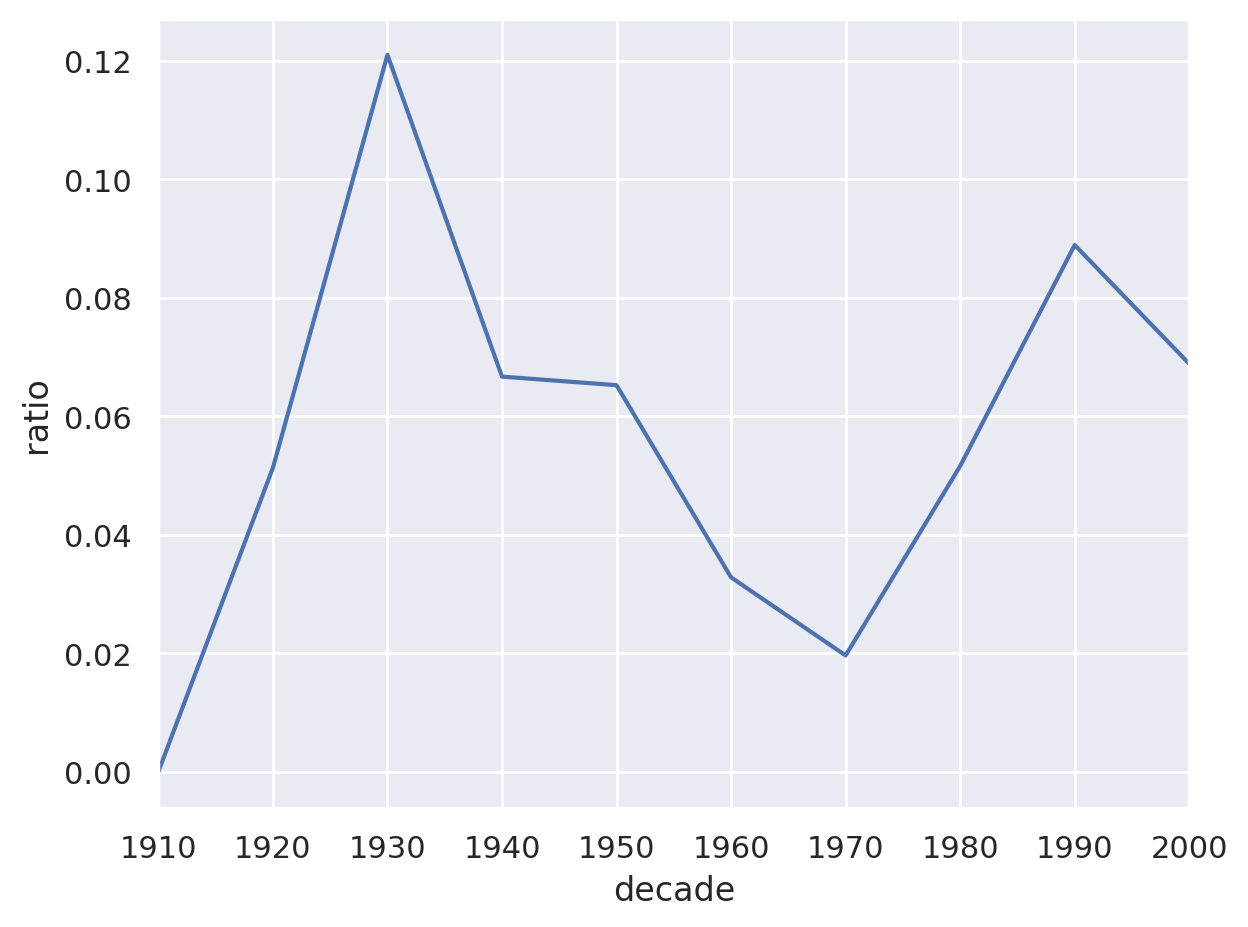

Sci-Fi


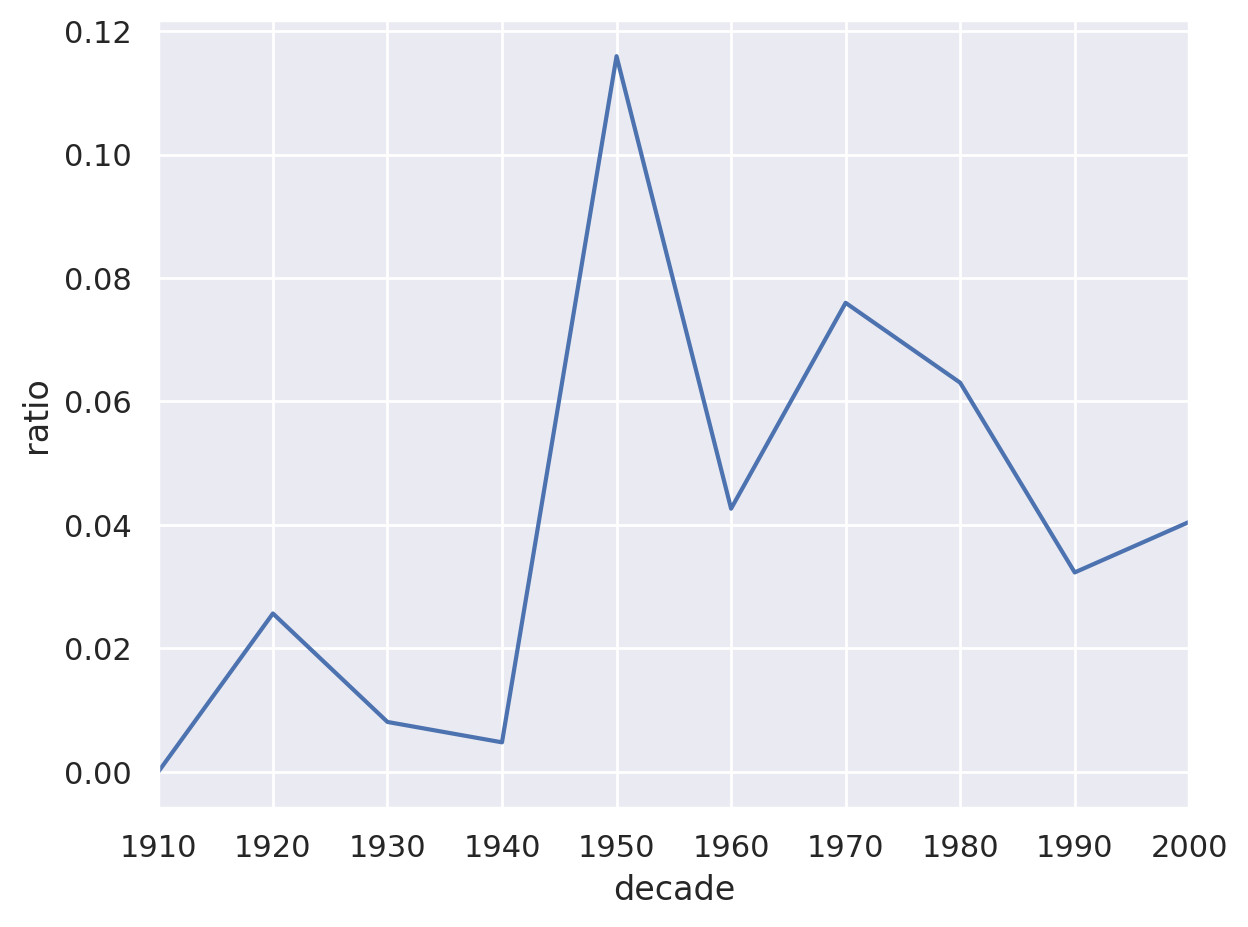

Thriller


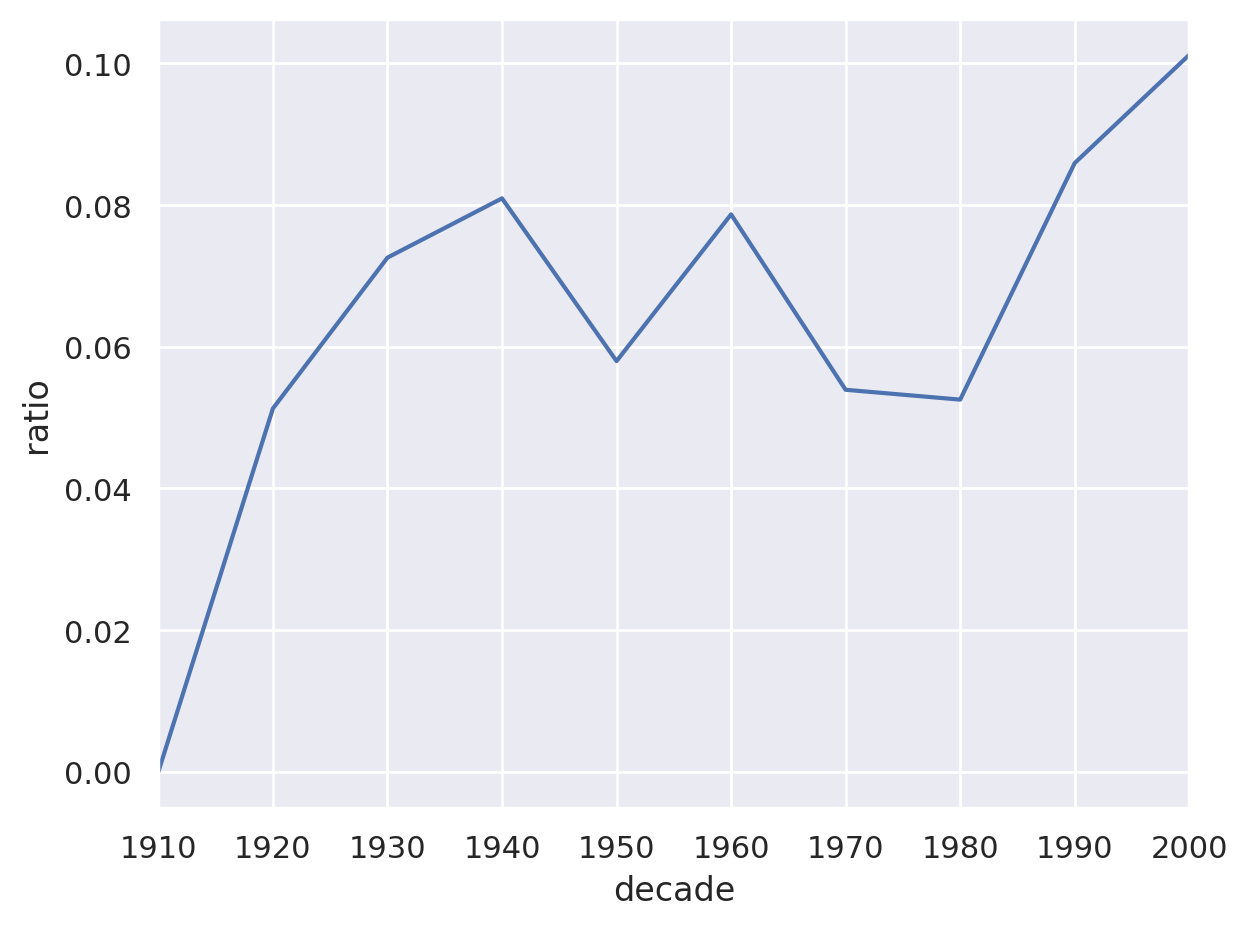

War


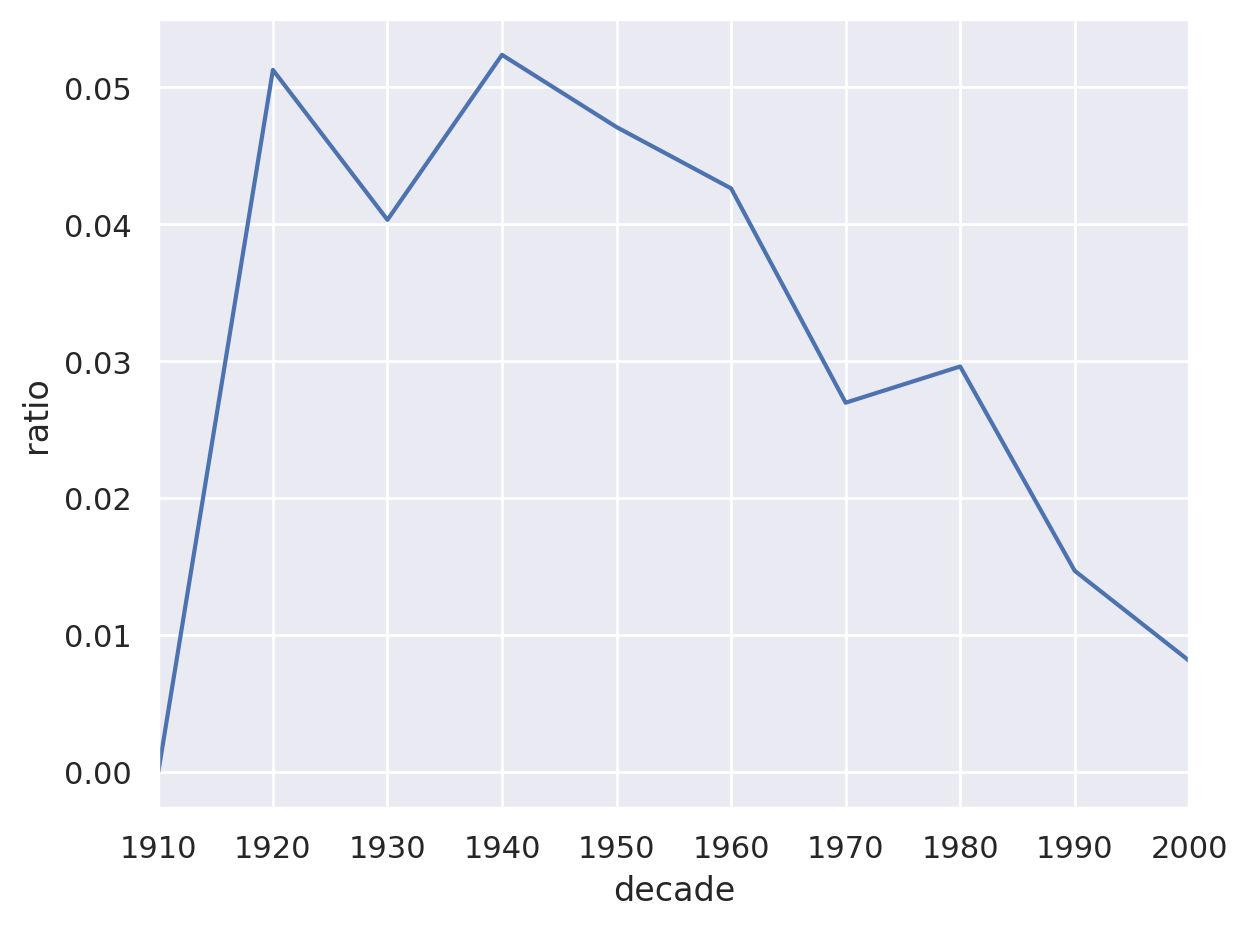

Western


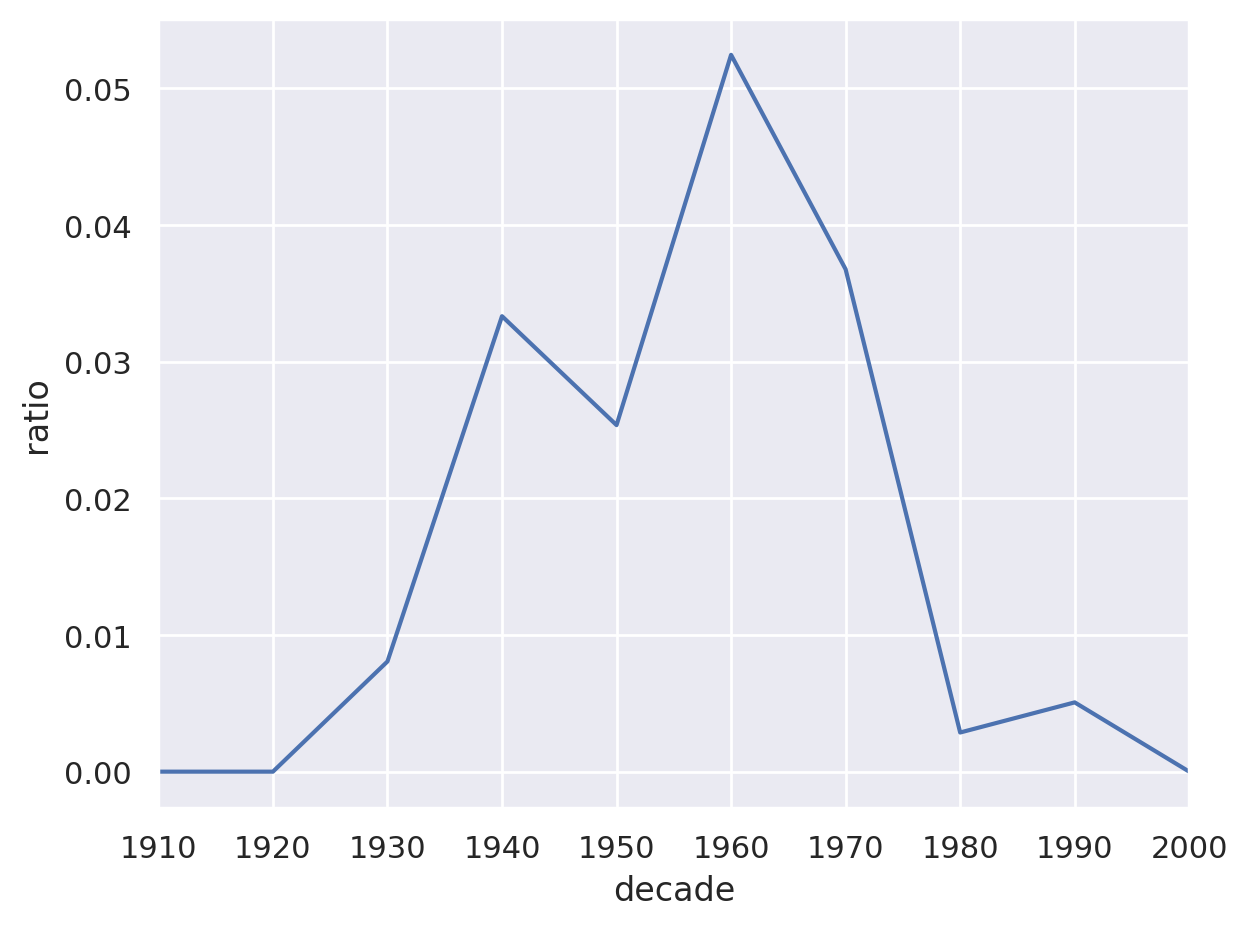

In [72]:
for genre in decade_genre_ratio['genres'].unique():
    data = decade_genre_ratio[decade_genre_ratio['genres'] == genre]
    print(genre)
    (
    so.Plot(data, x="decade", y="ratio")
    .add(so.Line())
    .limit(x=(1910, 2000))
    ).show()

## 연습문제 13

### 13.1
#### 유저들 중에는 소수의 특정 장르만을 시청할 수 있는데, 다시 말해서 유저별 장르의 편향성을 알아볼 수 있는 지표를 만들어 특정 장르만을 독식하는 유저들을 파악해보는 방식에 대해 아이디어를 기술해보고, 코드로 구현할 수 있는 스텝을 대략 제시해보세요.
#### 예를 들어, 유저별로 장르마다 몇 %씩을 평가했는지와 전체 유저의 장르별 평가 비율을 구해 상대적으로 유저들이 얼마나 치우쳐 장르를 소비하는 지를 알아보는 방식도 좋겠습니다.

#### 13.1 답변
##### 특정 장르를 독식하는 유저를 파악하기 위한 아이디어 중 하나는 유저별로 장르별 시청 비율을 계산하고, 이를 바탕으로 특정 장르에 대한 선호도 지표를 만드는 것입니다. 이 지표를 사용하여 특정 장르에 대해 높은 선호도를 가지는 유저를 식별할 수 있습니다.

##### 구체적으로, 다음과 같은 스텝으로 구현할 수 있습니다:
##### 1. 장르별 시청 비율 계산: 각 유저가 각 장르를 시청한 비율을 계산합니다. 이를 위해 유저별로 장르별 시청 수를 카운트하고, 이를 각 유저의 총 시청 수로 나누어 장르별 시청 비율을 계산합니다.
##### 2. 전체 유저의 장르별 평가 비율 계산: 전체 유저의 장르별 시청 비율을 계산합니다. 이는 모든 유저의 시청 비율을 평균하여 구합니다.
##### 3. 선호도 지표 생성: 각 유저의 장르별 시청 비율을 전체 유저의 장르별 시청 비율과 비교하여 선호도 지표를 생성합니다. 이 지표는 특정 장르에 대한 유저의 시청 비율이 전체 유저의 시청 비율보다 높을수록 더 높은 값을 갖습니다.
##### 4. 특정 장르에 대한 선호도 분석: 생성된 선호도 지표를 기반으로 특정 장르에 대한 높은 선호도를 가지는 유저를 식별합니다. 이를 통해 특정 장르를 독식하는 유저를 파악할 수 있습니다.

### 13.2
#### 구현된 코드로 실행한 결과를 표시해보세요.

In [49]:
# 1. 장르별 시청 비율 계산
user_genres = user_rating_long.groupby(['user_id', 'genres']).size().unstack()
user_genres['total'] = user_genres.sum(axis=1)
user_genres = user_genres.div(user_genres['total'], axis=0)

user_genres

genres   Animation  Children's  Comedy  Adventure  Fantasy  Romance  Drama  \
user_id                                                                      
1             0.16        0.17    0.12       0.04     0.03     0.05   0.18   
2             0.00        0.00    0.09       0.07     0.00     0.08   0.27   
3             0.02        0.02    0.24       0.20     0.02     0.04   0.07   
...            ...         ...     ...        ...      ...      ...    ...   
6038          0.07        0.02    0.29       0.02     0.00     0.15   0.22   
6039          0.05        0.06    0.23       0.04     0.02     0.11   0.10   
6040          0.01        0.01    0.17       0.04     0.01     0.07   0.31   

genres   Action  Crime  Thriller  Horror  Sci-Fi  Documentary  War  Musical  \
user_id                                                                       
1          0.04   0.02      0.03    0.00    0.03         0.00 0.02     0.12   
2          0.19   0.04      0.11    0.01    0.06         0.00 0.05     0.00   
3          0.19   0.00      0.04    0.02    0.05         0.00 0.02     0.01   
...         ...    ...       ...     ...     ...          ...  ...      ...   
6038       0.05   0.00      0.00    0.05    0.02         0.00 0.10     0.00   
6039       0.03   0.01      0.05    0.00    0.03         0.00 0.03     0.15   
6040       0.07   0.04      0.07    0.04    0.06         0.02 0.04     0.01   

genres   Mystery  Film-Noir  Western  total  
user_id                                      
1           0.00       0.00     0.00   1.00  
2           0.01       0.00     0.01   1.00  
3           0.01       0.00     0.05   1.00  
...          ...        ...      ...    ...  
6038        0.00       0.00     0.00   1.00  
6039        0.06       0.02     0.01   1.00  
6040        0.02       0.02     0.00   1.00  

[6040 rows x 19 columns]

In [50]:
# 2. 전체 유저의 장르별 평가 비율 계산
all_genres = user_genres.mean(axis=0)
all_genres

genres
Animation    0.02
Children's   0.03
Comedy       0.17
             ... 
Film-Noir    0.01
Western      0.01
total        1.00
Length: 19, dtype: float64

In [51]:
# 3. 선호도 지표 생성
for genre in user_genres.columns:
    if genre != 'total':
        user_genres[f'{genre}_preference'] = user_genres[genre] / all_genres[genre]

user_genres.reset_index(inplace=True)
user_genres

genres  user_id  Animation  Children's  Comedy  Adventure  Fantasy  Romance  \
0             1       0.16        0.17    0.12       0.04     0.03     0.05   
1             2       0.00        0.00    0.09       0.07     0.00     0.08   
2             3       0.02        0.02    0.24       0.20     0.02     0.04   
...         ...        ...         ...     ...        ...      ...      ...   
6037       6038       0.07        0.02    0.29       0.02     0.00     0.15   
6038       6039       0.05        0.06    0.23       0.04     0.02     0.11   
6039       6040       0.01        0.01    0.17       0.04     0.01     0.07   

genres  Drama  Action  Crime  ...  Crime_preference  Thriller_preference  \
0        0.18    0.04   0.02  ...              0.46                 0.28   
1        0.27    0.19   0.04  ...              1.10                 1.19   
2        0.07    0.19   0.00  ...              0.00                 0.45   
...       ...     ...    ...  ...               ...                  ...   
6037     0.22    0.05   0.00  ...              0.00                 0.00   
6038     0.10    0.03   0.01  ...              0.19                 0.56   
6039     0.31    0.07   0.04  ...              1.10                 0.75   

genres  Horror_preference  Sci-Fi_preference  Documentary_preference  \
0                    0.00               0.35                    0.00   
1                    0.20               0.80                    0.00   
2                    0.71               0.66                    0.00   
...                   ...                ...                     ...   
6037                 1.43               0.33                    0.00   
6038                 0.11               0.39                    0.00   
6039                 1.07               0.85                    4.03   

genres  War_preference  Musical_preference  Mystery_preference  \
0                 0.47                6.55                0.00   
1                 1.43                0.00                0.54   
2                 0.45                0.44                0.42   
...                ...                 ...                 ...   
6037              2.68                0.00                0.00   
6038              0.89                8.23                3.16   
6039              1.05                0.81                0.94   

genres  Film-Noir_preference  Western_preference  
0                       0.00                0.00  
1                       0.33                1.14  
2                       0.00                5.34  
...                      ...                 ...  
6037                    0.00                0.00  
6038                    2.03                0.79  
6039                    1.55                0.36  

[6040 rows x 38 columns]

In [52]:
# 4. 선호도 분석
genres = ['Animation', "Children's", "Comedy", 'Adventure', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror', 'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir', 'Western']

# 특정 장르에 대한 높은 선호도를 가지는 유저 식별
for genre in genres:
    high_preference_users = user_genres[user_genres[f'{genre}_preference'] > 1.5]
    print(f'{genre}에 대한 높은 선호도를 가지는 유저 상위 5명:')
    print(high_preference_users['user_id'].head())

Animation에 대한 높은 선호도를 가지는 유저 상위 5명:
0      1
5      6
8      9
9     10
15    16
Name: user_id, dtype: int64
Children's에 대한 높은 선호도를 가지는 유저 상위 5명:
0      1
5      6
9     10
15    16
17    18
Name: user_id, dtype: int64
Comedy에 대한 높은 선호도를 가지는 유저 상위 5명:
10    11
15    16
25    26
30    31
33    34
Name: user_id, dtype: int64
Adventure에 대한 높은 선호도를 가지는 유저 상위 5명:
2      3
3      4
6      7
12    13
17    18
Name: user_id, dtype: int64
Fantasy에 대한 높은 선호도를 가지는 유저 상위 5명:
0      1
3      4
9     10
12    13
17    18
Name: user_id, dtype: int64
Romance에 대한 높은 선호도를 가지는 유저 상위 5명:
5      6
7      8
13    14
15    16
23    24
Name: user_id, dtype: int64
Drama에 대한 높은 선호도를 가지는 유저 상위 5명:
1      2
4      5
7      8
13    14
29    30
Name: user_id, dtype: int64
Action에 대한 높은 선호도를 가지는 유저 상위 5명:
1      2
2      3
3      4
6      7
12    13
Name: user_id, dtype: int64
Crime에 대한 높은 선호도를 가지는 유저 상위 5명:
4      5
8      9
11    12
13    14
14    15
Name: user_id, dtype: int64
Thriller에 대한 높은 선호도를 가지는 유저 상위 5명:
6